In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [148]:
%store -r promo_df

In [149]:
%store -r store_data

In [150]:
mlr=pd.read_csv('MLR results.csv')

**Overview**

**Multiple Linear Regression Model to predict Monthly Sales and Customer walk-ins**

Variables used to predict Monthly Sales:

1. No. of operational Days in a month

2. No. of Days in a month when Promo 1 is run

3. No. of Days in a month when Promo 2 is run

4. No. of days in a month that are State holidays- A and C ( B did not return a low p-Value)

The model created using 12 months data from 2013 and 2014 and 7 months data from 2015 could help us predict the sales and customer walkins for 19 and 39 stores respectively.

But we got better results when we attempted to predict the figures using 11, 10,9,8 and 7 Months data

Following is a summary of our Results:


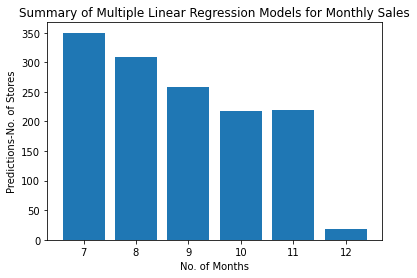

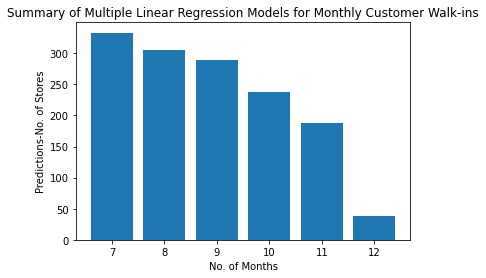

In [151]:
plt.bar(mlr['No. of Months data used'],mlr['Sales'])
plt.xlabel('No. of Months')
plt.ylabel('Predictions-No. of Stores')
plt.title('Summary of Multiple Linear Regression Models for Monthly Sales')
plt.show()

plt.bar(mlr['No. of Months data used'],mlr['Customer walk-ins'])
plt.xlabel('No. of Months')
plt.ylabel('Predictions-No. of Stores')
plt.title('Summary of Multiple Linear Regression Models for Monthly Customer Walk-ins')
plt.show()

**Linear Regression model: Prediction of Sales and Customer walk-ins on Promo Days**

We found a very strong positive correlation between the No. of Promo days in a month to the monthly sales/Customer walkins on promo Days in each of the years.-This can be found in the Jupyter Notebook,RossMann Stores-EDA (Part 1).ipynb

We created a linear regression models based on this relationship to predict monthly sales and Customer walkins on Promo Days

Scope of Sales Model: 673 Stores

Scope of Customer Model:828 Stores


**Contents of this notebook**

**1.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-12 Months](#MLR_12)**

**2.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-11 Months](#MLR_11)**

**3.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-10 Months](#MLR_10)**

**4.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-9 Months](#MLR_9)**

**5.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-8 Months](#MLR_8)**

**6.[Multiple Linear Regression Model-Prediction of Monthly Sales and Customer-walkins-7 Months](#MLR_7)**

**7.[Linear Regression Model-Prediction of Monthly Sales on Promo days](#Linreg_promo)**

**8.[Linear Regression Model-Prediction of Monthly Customer walkins on Promo days](#Linreg_promo_cust)**


In [152]:
%store -r final_promo2

In [153]:
%store -r main_data

In [154]:
year1_data=main_data[main_data['Year of Sale']==2013]
year2_data=main_data[main_data['Year of Sale']==2014]
year3_data=main_data[main_data['Year of Sale']==2015]

In [155]:
closed_days=main_data[main_data['Open']==0]
st_df_a=main_data[main_data['StateHoliday']=='a']
st_df_b=main_data[main_data['StateHoliday']=='b']
st_df_c=main_data[main_data['StateHoliday']=='c']
sch_hol=main_data[main_data['SchoolHoliday']==1]
promo_df=main_data[main_data['Promo']==1]

In [156]:
closed_days_y1=closed_days[closed_days['Year of Sale']==2013]
closed_days_y2=closed_days[closed_days['Year of Sale']==2014]
closed_days_y3=closed_days[closed_days['Year of Sale']==2015]
promo_days_y1=promo_df[promo_df['Year of Sale']==2013]
promo_days_y2=promo_df[promo_df['Year of Sale']==2014]
promo_days_y3=promo_df[promo_df['Year of Sale']==2015]
st_hol_a_y1=st_df_a[st_df_a['Year of Sale']==2013]
st_hol_a_y2=st_df_a[st_df_a['Year of Sale']==2014]
st_hol_a_y3=st_df_a[st_df_a['Year of Sale']==2015]
st_hol_b_y1=st_df_b[st_df_b['Year of Sale']==2013]
st_hol_b_y2=st_df_b[st_df_b['Year of Sale']==2014]
st_hol_b_y3=st_df_b[st_df_b['Year of Sale']==2015]
st_hol_c_y1=st_df_c[st_df_c['Year of Sale']==2013]
st_hol_c_y2=st_df_c[st_df_c['Year of Sale']==2014]
st_hol_c_y3=st_df_c[st_df_c['Year of Sale']==2015]
sch_hol_y1=sch_hol[sch_hol['Year of Sale']==2013]
sch_hol_y2=sch_hol[sch_hol['Year of Sale']==2014]
sch_hol_y3=sch_hol[sch_hol['Year of Sale']==2015]
promo2days_y1=final_promo2[final_promo2['Year of Sale']==2013]
promo2days_y2=final_promo2[final_promo2['Year of Sale']==2014]
promo2days_y3=final_promo2[final_promo2['Year of Sale']==2015]





**Predictive Model: 12 Months data from 2013 and 2014, 7 months data from 2015**
<a id='MLR_12'></a>


**Model for Monthly Sales**

In [157]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_all=[]
predict_2014_all=[]
predict_2015_all=[]

for s in store_list:
    store_sales_2013=year1_data[year1_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2013.columns=['Month of Sale','Sales']
    closed_days_2013=closed_days_y1[closed_days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_2013=promo_days_y1[promo_days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2013=st_hol_a_y1[st_hol_a_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2013=st_hol_b_y1[st_hol_b_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2013=st_hol_c_y1[st_hol_c_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2013=sch_hol_y1[sch_hol_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2013=promo2days_y1[promo2days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2013['Total No. of Closed Days']=closed_days_2013['No. of Closed Days']    
    store_sales_2013['Total No. of Promo1 Days']=promo_days_2013['No. of Promo1 Days']
    store_sales_2013['Total No. of State Holidays-A']=state_hol_a_2013['No. of State Holidays-A']
    store_sales_2013['Total No. of State Holidays-B']=state_hol_b_2013['No. of State Holidays-B']
    store_sales_2013['Total No. of State Holidays-C']=state_hol_c_2013['No. of State Holidays-C']
    store_sales_2013['Total No. of School Holidays']=sch_hol_2013['No. of School Holidays']
    store_sales_2013['Total No. of Promo2 Days']=promo2_days_2013['No. of Promo2 Days']                                
    store_sales_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_2013['Total No. of Closed Days']=store_sales_2013['Total No. of Closed Days'].fillna(0)
    store_sales_2013['Total No. of Promo1 Days']=store_sales_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_2013['Total No. of State Holidays-A']=store_sales_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_2013['Total No. of State Holidays-B']=store_sales_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_2013['Total No. of State Holidays-C']=store_sales_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_2013['Total No. of School Holidays']=store_sales_2013['Total No. of School Holidays'].fillna(0)
    store_sales_2013['Total No. of Promo2 Days']=store_sales_2013['Total No. of Promo2 Days'].fillna(0)     
    store_sales_2014=year2_data[year2_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2014.columns=['Month of Sale','Sales']
    closed_days_2014=closed_days_y2[closed_days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_2014=promo_days_y2[promo_days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2014=st_hol_a_y2[st_hol_a_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2014=st_hol_b_y2[st_hol_b_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2014=st_hol_c_y2[st_hol_c_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2014=sch_hol_y2[sch_hol_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2014=promo2days_y2[promo2days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2014['Total No. of Closed Days']=closed_days_2014['No. of Closed Days']
    store_sales_2014['Total No. of Promo1 Days']=promo_days_2014['No. of Promo1 Days']
    store_sales_2014['Total No. of State Holidays-A']=state_hol_a_2014['No. of State Holidays-A']
    store_sales_2014['Total No. of State Holidays-B']=state_hol_b_2014['No. of State Holidays-B']
    store_sales_2014['Total No. of State Holidays-C']=state_hol_c_2014['No. of State Holidays-C']
    store_sales_2014['Total No. of School Holidays']=sch_hol_2014['No. of School Holidays']
    store_sales_2014['Total No. of Promo2 Days']=promo2_days_2014['No. of Promo2 Days']                                
    store_sales_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_2014['Total No. of Closed Days']=store_sales_2014['Total No. of Closed Days'].fillna(0)
    store_sales_2014['Total No. of Promo1 Days']=store_sales_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_2014['Total No. of State Holidays-A']=store_sales_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_2014['Total No. of State Holidays-B']=store_sales_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_2014['Total No. of State Holidays-C']=store_sales_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_2014['Total No. of School Holidays']=store_sales_2014['Total No. of School Holidays'].fillna(0)
    store_sales_2014['Total No. of Promo2 Days']=store_sales_2014['Total No. of Promo2 Days'].fillna(0)                               
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col=store_sales_2013.columns[2:]
    dep_var_2013=store_sales_2013['Sales']
    ind_var1_2013=store_sales_2013[var_col]
    ind_var2_2013=sm.add_constant(ind_var1_2013)
    var_col=store_sales_2014.columns[2:]
    dep_var_2014=store_sales_2014['Sales']
    ind_var1_2014=store_sales_2014[var_col]
    ind_var2_2014=sm.add_constant(ind_var1_2014)
    var_col=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_2013.append([store_sales_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_all=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_all.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_all.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_26=pd.DataFrame(model_all.predict(ind_var2_2013))
    pred_26.columns=['Pred']
    pred_27=pd.DataFrame(model_all.predict(ind_var2_2014))
    pred_27.columns=['Pred']
    pred_28=pd.DataFrame(model_all.predict(ind_var2_2015))
    pred_28.columns=['Pred']
    predict_2013_all.append(pred_26['Pred'].tolist())
    predict_2014_all.append(pred_27['Pred'].tolist())
    predict_2015_all.append(pred_28['Pred'].tolist())

pred_matrix_all=pd.DataFrame(store_list)
pred_matrix_all.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_all['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_all['Constant']=Const['Constant']
pred_matrix_all['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_all['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_all['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_all['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_all['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_all['School Holidays']=Sch['School Holidays']
pred_matrix_all['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_all[pred_matrix_all['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_all[pred_matrix_all['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

231
19


**Model for Monthly Customer walk-ins**

In [158]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()

Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_cust=[]
predict_2014_cust=[]
predict_2015_cust=[]

for s in store_list:
    store_cust_2013=year1_data[year1_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2013.columns=['Month of Sale','Customers']
    closed_days_2013=closed_days_y1[closed_days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_2013=promo_days_y1[promo_days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2013=st_hol_a_y1[st_hol_a_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2013=st_hol_b_y1[st_hol_b_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2013=st_hol_c_y1[st_hol_c_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2013=sch_hol_y1[sch_hol_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2013=promo2days_y1[promo2days_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2013['Total No. of Closed Days']=closed_days_2013['No. of Closed Days']    
    store_cust_2013['Total No. of Promo1 Days']=promo_days_2013['No. of Promo1 Days']
    store_cust_2013['Total No. of State Holidays-A']=state_hol_a_2013['No. of State Holidays-A']
    store_cust_2013['Total No. of State Holidays-B']=state_hol_b_2013['No. of State Holidays-B']
    store_cust_2013['Total No. of State Holidays-C']=state_hol_c_2013['No. of State Holidays-C']
    store_cust_2013['Total No. of School Holidays']=sch_hol_2013['No. of School Holidays']
    store_cust_2013['Total No. of Promo2 Days']=promo2_days_2013['No. of Promo2 Days']                                
    store_cust_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_2013['Total No. of Closed Days']=store_cust_2013['Total No. of Closed Days'].fillna(0)
    store_cust_2013['Total No. of Promo1 Days']=store_cust_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_2013['Total No. of State Holidays-A']=store_cust_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_2013['Total No. of State Holidays-B']=store_cust_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_2013['Total No. of State Holidays-C']=store_cust_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_2013['Total No. of School Holidays']=store_cust_2013['Total No. of School Holidays'].fillna(0)
    store_cust_2013['Total No. of Promo2 Days']=store_cust_2013['Total No. of Promo2 Days'].fillna(0)     
    store_cust_2014=year2_data[year2_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2014.columns=['Month of Sale','Customers']
    closed_days_2014=closed_days_y2[closed_days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_2014=promo_days_y2[promo_days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2014=st_hol_a_y2[st_hol_a_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2014=st_hol_b_y2[st_hol_b_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2014=st_hol_c_y2[st_hol_c_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2014=sch_hol_y2[sch_hol_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2014=promo2days_y2[promo2days_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2014['Total No. of Closed Days']=closed_days_2014['No. of Closed Days']
    store_cust_2014['Total No. of Promo1 Days']=promo_days_2014['No. of Promo1 Days']
    store_cust_2014['Total No. of State Holidays-A']=state_hol_a_2014['No. of State Holidays-A']
    store_cust_2014['Total No. of State Holidays-B']=state_hol_b_2014['No. of State Holidays-B']
    store_cust_2014['Total No. of State Holidays-C']=state_hol_c_2014['No. of State Holidays-C']
    store_cust_2014['Total No. of School Holidays']=sch_hol_2014['No. of School Holidays']
    store_cust_2014['Total No. of Promo2 Days']=promo2_days_2014['No. of Promo2 Days']                                
    store_cust_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_2014['Total No. of Closed Days']=store_cust_2014['Total No. of Closed Days'].fillna(0)
    store_cust_2014['Total No. of Promo1 Days']=store_cust_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_2014['Total No. of State Holidays-A']=store_cust_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_2014['Total No. of State Holidays-B']=store_cust_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_2014['Total No. of State Holidays-C']=store_cust_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_2014['Total No. of School Holidays']=store_cust_2014['Total No. of School Holidays'].fillna(0)
    store_cust_2014['Total No. of Promo2 Days']=store_cust_2014['Total No. of Promo2 Days'].fillna(0)                               
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col=store_cust_2013.columns[2:]
    dep_var_2013=store_cust_2013['Customers']
    ind_var1_2013=store_cust_2013[var_col]
    ind_var2_2013=sm.add_constant(ind_var1_2013)
    var_col=store_cust_2014.columns[2:]
    dep_var_2014=store_cust_2014['Customers']
    ind_var1_2014=store_cust_2014[var_col]
    ind_var2_2014=sm.add_constant(ind_var1_2014)
    var_col=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_2013.append([store_cust_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_all=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_all.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_all.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_1=pd.DataFrame(model_all.predict(ind_var2_2013))
    pred_cust_1.columns=['Pred']
    pred_cust_2=pd.DataFrame(model_all.predict(ind_var2_2014))
    pred_cust_2.columns=['Pred']
    pred_cust_3=pd.DataFrame(model_all.predict(ind_var2_2015))
    pred_cust_3.columns=['Pred']
    predict_2013_cust.append(pred_cust_1['Pred'].tolist())
    predict_2014_cust.append(pred_cust_2['Pred'].tolist())
    predict_2015_cust.append(pred_cust_3['Pred'].tolist())

pred_matrix_cust=pd.DataFrame(store_list)
pred_matrix_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust['Constant']=Const['Constant']
pred_matrix_cust['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_cust['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust['School Holidays']=Sch['School Holidays']
pred_matrix_cust['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']>=0.50]['Store'].tolist()))

252
39


**Predictive Model: 11 months Data from 2013 and 2014, 7 Months data from 2015**
<a id='MLR_11'></a>

In [159]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
eleven=[1,2,3,4,5,6,7,8,9,10,11]
eleven_y1=year1_data[year1_data['Month of Sale'].isin(eleven)]
eleven_y2=year2_data[year2_data['Month of Sale'].isin(eleven)]
eleven_y3=year3_data[year3_data['Month of Sale'].isin(eleven)]
promo2days_11_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(eleven)]
promo2days_11_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(eleven)]
promo2days_11_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(eleven)]
closed_days_11_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(eleven)]
closed_days_11_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(eleven)]
promo_days_11_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(eleven)]
promo_days_11_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(eleven)]
st_hol_a_11_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(eleven)]
st_hol_a_11_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(eleven)]
st_hol_b_11_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(eleven)]
st_hol_b_11_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(eleven)]
st_hol_c_11_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(eleven)]
st_hol_c_11_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(eleven)]
sch_hol_11_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(eleven)]
sch_hol_11_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(eleven)]
modeldata_11_y1=eleven_y1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_11_y1.columns=['Store','Month of Sale','Sales']
modeldata_11_y2=eleven_y2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_11_y2.columns=['Store','Month of Sale','Sales']
modeldata_11_y3=eleven_y3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_11_y3.columns=['Store','Month of Sale','Sales']


**Model for Sales**

In [160]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_11=[]
predict_2014_11=[]
predict_2015_11=[]

for s in store_list:
    store_sales_11_2013=eleven_y1[eleven_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_11_2013.columns=['Month of Sale','Sales']
    closed_days_11_2013=closed_days_11_y1[closed_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2013=promo_days_11_y1[promo_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2013=st_hol_a_11_y1[st_hol_a_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_11_2013=st_hol_b_11_y1[st_hol_b_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_11_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_11_2013=st_hol_c_11_y1[st_hol_c_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_11_2013=sch_hol_11_y1[sch_hol_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_11_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_11_2013=promo2days_11_y1[promo2days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_11_2013['Total No. of Closed Days']=closed_days_11_2013['No. of Closed Days']
    store_sales_11_2013['Total No. of Promo1 Days']=promo_days_11_2013['No. of Promo1 Days']
    store_sales_11_2013['Total No. of State Holidays-A']=state_hol_a_11_2013['No. of State Holidays-A']
    store_sales_11_2013['Total No. of State Holidays-B']=state_hol_b_11_2013['No. of State Holidays-B']
    store_sales_11_2013['Total No. of State Holidays-C']=state_hol_c_11_2013['No. of State Holidays-C']
    store_sales_11_2013['Total No. of School Holidays']=sch_hol_11_2013['No. of School Holidays']
    store_sales_11_2013['Total No. of Promo2 Days']=promo2_days_11_2013['No. of Promo2 Days']
    store_sales_11_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_11_2013['Total No. of Closed Days']=store_sales_11_2013['Total No. of Closed Days'].fillna(0)
    store_sales_11_2013['Total No. of Promo1 Days']=store_sales_11_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_11_2013['Total No. of State Holidays-A']=store_sales_11_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_11_2013['Total No. of State Holidays-B']=store_sales_11_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_11_2013['Total No. of State Holidays-C']=store_sales_11_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_11_2013['Total No. of School Holidays']=store_sales_11_2013['Total No. of School Holidays'].fillna(0)
    store_sales_11_2013['Total No. of Promo2 Days']=store_sales_11_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_11_2014=eleven_y2[eleven_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_11_2014.columns=['Month of Sale','Sales']
    closed_days_11_2014=closed_days_11_y2[closed_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2014=promo_days_11_y2[promo_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2014=st_hol_a_11_y2[st_hol_a_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_11_2014=st_hol_b_11_y2[st_hol_b_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_11_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_11_2014=st_hol_c_11_y2[st_hol_c_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_11_2014=sch_hol_11_y2[sch_hol_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_11_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_11_2014=promo2days_11_y2[promo2days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_11_2014['Total No. of Closed Days']=closed_days_11_2014['No. of Closed Days']
    store_sales_11_2014['Total No. of Promo1 Days']=promo_days_11_2014['No. of Promo1 Days']
    store_sales_11_2014['Total No. of State Holidays-A']=state_hol_a_11_2014['No. of State Holidays-A']
    store_sales_11_2014['Total No. of State Holidays-B']=state_hol_b_11_2014['No. of State Holidays-B']
    store_sales_11_2014['Total No. of State Holidays-C']=state_hol_c_11_2014['No. of State Holidays-C']
    store_sales_11_2014['Total No. of School Holidays']=sch_hol_11_2014['No. of School Holidays']
    store_sales_11_2014['Total No. of Promo2 Days']=promo2_days_11_2014['No. of Promo2 Days']
    store_sales_11_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_11_2014['Total No. of Closed Days']=store_sales_11_2014['Total No. of Closed Days'].fillna(0)
    store_sales_11_2014['Total No. of Promo1 Days']=store_sales_11_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_11_2014['Total No. of State Holidays-A']=store_sales_11_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_11_2014['Total No. of State Holidays-B']=store_sales_11_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_11_2014['Total No. of State Holidays-C']=store_sales_11_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_11_2014['Total No. of School Holidays']=store_sales_11_2014['Total No. of School Holidays'].fillna(0)
    store_sales_11_2014['Total No. of Promo2 Days']=store_sales_11_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_11_2013.columns[2:]
    dep_var_11_2013=store_sales_11_2013['Sales']
    ind_var1_11_2013=store_sales_11_2013[var_col_2013]
    ind_var2_11_2013=sm.add_constant(ind_var1_11_2013)
    var_col_2014=store_sales_11_2014.columns[2:]
    dep_var_11_2014=store_sales_11_2014['Sales']
    ind_var1_11_2014=store_sales_11_2014[var_col_2014]
    ind_var2_11_2014=sm.add_constant(ind_var1_11_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_11_2013.append([store_sales_11_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final11=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final11.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final11.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_35=pd.DataFrame(model_final11.predict(ind_var2_11_2013))
    pred_35.columns=['Pred']
    pred_36=pd.DataFrame(model_final11.predict(ind_var2_11_2014))
    pred_36.columns=['Pred']
    pred_37=pd.DataFrame(model_final11.predict(ind_var2_2015))
    pred_37.columns=['Pred']
    predict_2013_11.append(pred_35['Pred'].tolist())
    predict_2014_11.append(pred_36['Pred'].tolist())
    predict_2015_11.append(pred_37['Pred'].tolist())

pred_matrix_11=pd.DataFrame(store_list)
pred_matrix_11.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_11['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_11['Constant']=Const['Constant']
pred_matrix_11['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_11['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_11['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_11['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_11['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_11['School Holidays']=Sch['School Holidays']
pred_matrix_11['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_11[pred_matrix_11['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_11[pred_matrix_11['Adjusted R squared']>=0.50]['Store'].tolist()))

51
186


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

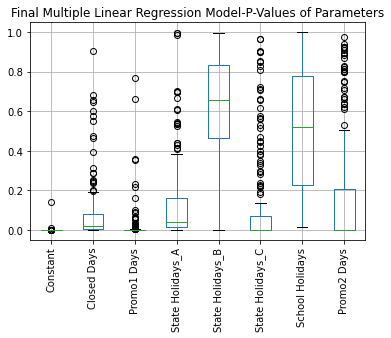

In [161]:
model_final11_list=pred_matrix_11[pred_matrix_11['Adjusted R squared']>=0.50]['Store'].tolist()
model_final11_df=pred_matrix_11[pred_matrix_11['Store'].isin(model_final11_list)]
model_final11_df.boxplot(column=model_final11_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [162]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_11=[]
predict_2014_11=[]
predict_2015_11=[]

for s in store_list:
    store_sales_11_2013=eleven_y1[eleven_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_11_2013.columns=['Month of Sale','Sales']
    closed_days_11_2013=closed_days_11_y1[closed_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2013=promo_days_11_y1[promo_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2013=st_hol_a_11_y1[st_hol_a_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_11_2013=st_hol_c_11_y1[st_hol_c_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_11_2013=promo2days_11_y1[promo2days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_11_2013['Total No. of Closed Days']=closed_days_11_2013['No. of Closed Days']
    store_sales_11_2013['Total No. of Promo1 Days']=promo_days_11_2013['No. of Promo1 Days']
    store_sales_11_2013['Total No. of State Holidays-A']=state_hol_a_11_2013['No. of State Holidays-A']
    store_sales_11_2013['Total No. of State Holidays-C']=state_hol_c_11_2013['No. of State Holidays-C']
    store_sales_11_2013['Total No. of Promo2 Days']=promo2_days_11_2013['No. of Promo2 Days']
    store_sales_11_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_11_2013['Total No. of Closed Days']=store_sales_11_2013['Total No. of Closed Days'].fillna(0)
    store_sales_11_2013['Total No. of Promo1 Days']=store_sales_11_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_11_2013['Total No. of State Holidays-A']=store_sales_11_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_11_2013['Total No. of State Holidays-C']=store_sales_11_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_11_2013['Total No. of Promo2 Days']=store_sales_11_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_11_2014=eleven_y2[eleven_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_11_2014.columns=['Month of Sale','Sales']
    closed_days_11_2014=closed_days_11_y2[closed_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2014=promo_days_11_y2[promo_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2014=st_hol_a_11_y2[st_hol_a_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_11_2014=st_hol_c_11_y2[st_hol_c_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_11_2014=promo2days_11_y2[promo2days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_11_2014['Total No. of Closed Days']=closed_days_11_2014['No. of Closed Days']
    store_sales_11_2014['Total No. of Promo1 Days']=promo_days_11_2014['No. of Promo1 Days']
    store_sales_11_2014['Total No. of State Holidays-A']=state_hol_a_11_2014['No. of State Holidays-A']
    store_sales_11_2014['Total No. of State Holidays-C']=state_hol_c_11_2014['No. of State Holidays-C']
    store_sales_11_2014['Total No. of Promo2 Days']=promo2_days_11_2014['No. of Promo2 Days']
    store_sales_11_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_11_2014['Total No. of Closed Days']=store_sales_11_2014['Total No. of Closed Days'].fillna(0)
    store_sales_11_2014['Total No. of Promo1 Days']=store_sales_11_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_11_2014['Total No. of State Holidays-A']=store_sales_11_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_11_2014['Total No. of State Holidays-C']=store_sales_11_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_11_2014['Total No. of Promo2 Days']=store_sales_11_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_11_2013.columns[2:]
    dep_var_11_2013=store_sales_11_2013['Sales']
    ind_var1_11_2013=store_sales_11_2013[var_col_2013]
    ind_var2_11_2013=sm.add_constant(ind_var1_11_2013)
    var_col_2014=store_sales_11_2014.columns[2:]
    dep_var_11_2014=store_sales_11_2014['Sales']
    ind_var1_11_2014=store_sales_11_2014[var_col_2014]
    ind_var2_11_2014=sm.add_constant(ind_var1_11_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_11_2013.append([store_sales_11_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final11=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final11.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final11.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_35=pd.DataFrame(model_final11.predict(ind_var2_11_2013))
    pred_35.columns=['Pred']
    pred_36=pd.DataFrame(model_final11.predict(ind_var2_11_2014))
    pred_36.columns=['Pred']
    pred_37=pd.DataFrame(model_final11.predict(ind_var2_2015))
    pred_37.columns=['Pred']
    predict_2013_11.append(pred_35['Pred'].tolist())
    predict_2014_11.append(pred_36['Pred'].tolist())
    predict_2015_11.append(pred_37['Pred'].tolist())

pred_matrix_11=pd.DataFrame(store_list)
pred_matrix_11.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_11['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_11['Constant']=Const['Constant']
pred_matrix_11['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_11['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_11['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_11['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_11['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_11[pred_matrix_11['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_11[pred_matrix_11['Adjusted R squared']>=0.50]['Store'].tolist()))

32
220


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

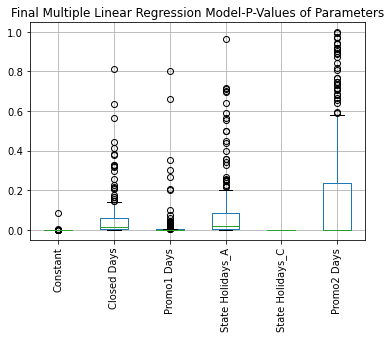

In [163]:
model_final11_list=pred_matrix_11[pred_matrix_11['Adjusted R squared']>=0.50]['Store'].tolist()
model_final11_df=pred_matrix_11[pred_matrix_11['Store'].isin(model_final11_list)]
model_final11_df.boxplot(column=model_final11_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


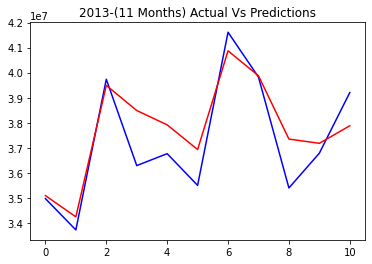

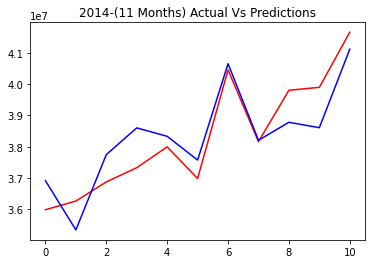

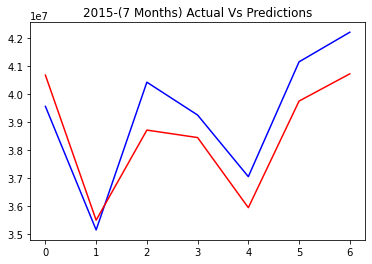

In [164]:
predict_2013_11_df=[item for sublist in predict_2013_11 for item in sublist]  
predict_2014_11_df=[item for sublist in predict_2014_11 for item in sublist]  
predict_2015_11_df=[item for sublist in predict_2015_11 for item in sublist]  
modeldata_11_y1['Predictions-Final11 Model']=predict_2013_11_df
modeldata_11_y2['Predictions-Final11 Model']=predict_2014_11_df
modeldata_11_y3['Predictions-Final11 Model']=predict_2015_11_df
modeldata_11_y1['Predictions-Final11 Model']=modeldata_11_y1['Predictions-Final11 Model'].astype(int)
modeldata_11_y2['Predictions-Final11 Model']=modeldata_11_y2['Predictions-Final11 Model'].astype(int)
modeldata_11_y3['Predictions-Final11 Model']=modeldata_11_y3['Predictions-Final11 Model'].astype(int)
modeldata_11_y1_mat_1=modeldata_11_y1[modeldata_11_y1['Store'].isin(model_final11_list)]
modeldata_11_y2_mat_1=modeldata_11_y2[modeldata_11_y2['Store'].isin(model_final11_list)]
modeldata_11_y3_mat_1=modeldata_11_y3[modeldata_11_y3['Store'].isin(model_final11_list)]

sale_11_y1_mat_1=pd.DataFrame(modeldata_11_y1_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_11_y1_mat_1=pd.DataFrame(modeldata_11_y1_mat_1.groupby('Month of Sale')['Predictions-Final11 Model'].sum()).reset_index()
sale_11_y2_mat_1=pd.DataFrame(modeldata_11_y2_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_11_y2_mat_1=pd.DataFrame(modeldata_11_y2_mat_1.groupby('Month of Sale')['Predictions-Final11 Model'].sum()).reset_index()
sale_11_y3_mat_1=pd.DataFrame(modeldata_11_y3_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_11_y3_mat_1=pd.DataFrame(modeldata_11_y3_mat_1.groupby('Month of Sale')['Predictions-Final11 Model'].sum()).reset_index()

plt.plot(sale_11_y1_mat_1['Sales'],color='Blue')
plt.plot(pred_11_y1_mat_1['Predictions-Final11 Model'],color='Red')
plt.title('2013-(11 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final11 Model(For 220 Stores)')


plt.plot(pred_11_y2_mat_1['Predictions-Final11 Model'],color='Red')
plt.plot(sale_11_y2_mat_1['Sales'],color='Blue')
plt.title('2014-(11 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final11 Model(For 220 Stores)')


plt.plot(sale_11_y3_mat_1['Sales'],color='Blue')
plt.plot(pred_11_y3_mat_1['Predictions-Final11 Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final9 Model(For 220 Stores)')


**Model for Customer walkins**

In [165]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_cust_11=[]
predict_2014_cust_11=[]
predict_2015_cust_11=[]

for s in store_list:
    store_cust_11_2013=eleven_y1[eleven_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_11_2013.columns=['Month of Sale','Customers']
    closed_days_11_2013=closed_days_11_y1[closed_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2013=promo_days_11_y1[promo_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2013=st_hol_a_11_y1[st_hol_a_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_11_2013=st_hol_b_11_y1[st_hol_b_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_11_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_11_2013=st_hol_c_11_y1[st_hol_c_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_11_2013=sch_hol_11_y1[sch_hol_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_11_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_11_2013=promo2days_11_y1[promo2days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_11_2013['Total No. of Closed Days']=closed_days_11_2013['No. of Closed Days']
    store_cust_11_2013['Total No. of Promo1 Days']=promo_days_11_2013['No. of Promo1 Days']
    store_cust_11_2013['Total No. of State Holidays-A']=state_hol_a_11_2013['No. of State Holidays-A']
    store_cust_11_2013['Total No. of State Holidays-B']=state_hol_b_11_2013['No. of State Holidays-B']
    store_cust_11_2013['Total No. of State Holidays-C']=state_hol_c_11_2013['No. of State Holidays-C']
    store_cust_11_2013['Total No. of School Holidays']=sch_hol_11_2013['No. of School Holidays']
    store_cust_11_2013['Total No. of Promo2 Days']=promo2_days_11_2013['No. of Promo2 Days']
    store_cust_11_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_11_2013['Total No. of Closed Days']=store_cust_11_2013['Total No. of Closed Days'].fillna(0)
    store_cust_11_2013['Total No. of Promo1 Days']=store_cust_11_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_11_2013['Total No. of State Holidays-A']=store_cust_11_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_11_2013['Total No. of State Holidays-B']=store_cust_11_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_11_2013['Total No. of State Holidays-C']=store_cust_11_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_11_2013['Total No. of School Holidays']=store_cust_11_2013['Total No. of School Holidays'].fillna(0)
    store_cust_11_2013['Total No. of Promo2 Days']=store_cust_11_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_11_2014=eleven_y2[eleven_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_11_2014.columns=['Month of Sale','Customers']
    closed_days_11_2014=closed_days_11_y2[closed_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2014=promo_days_11_y2[promo_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2014=st_hol_a_11_y2[st_hol_a_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_11_2014=st_hol_b_11_y2[st_hol_b_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_11_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_11_2014=st_hol_c_11_y2[st_hol_c_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_11_2014=sch_hol_11_y2[sch_hol_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_11_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_11_2014=promo2days_11_y2[promo2days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_11_2014['Total No. of Closed Days']=closed_days_11_2014['No. of Closed Days']
    store_cust_11_2014['Total No. of Promo1 Days']=promo_days_11_2014['No. of Promo1 Days']
    store_cust_11_2014['Total No. of State Holidays-A']=state_hol_a_11_2014['No. of State Holidays-A']
    store_cust_11_2014['Total No. of State Holidays-B']=state_hol_b_11_2014['No. of State Holidays-B']
    store_cust_11_2014['Total No. of State Holidays-C']=state_hol_c_11_2014['No. of State Holidays-C']
    store_cust_11_2014['Total No. of School Holidays']=sch_hol_11_2014['No. of School Holidays']
    store_cust_11_2014['Total No. of Promo2 Days']=promo2_days_11_2014['No. of Promo2 Days']
    store_cust_11_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_11_2014['Total No. of Closed Days']=store_cust_11_2014['Total No. of Closed Days'].fillna(0)
    store_cust_11_2014['Total No. of Promo1 Days']=store_cust_11_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_11_2014['Total No. of State Holidays-A']=store_cust_11_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_11_2014['Total No. of State Holidays-B']=store_cust_11_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_11_2014['Total No. of State Holidays-C']=store_cust_11_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_11_2014['Total No. of School Holidays']=store_cust_11_2014['Total No. of School Holidays'].fillna(0)
    store_cust_11_2014['Total No. of Promo2 Days']=store_cust_11_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_11_2013.columns[2:]
    dep_var_11_2013=store_cust_11_2013['Customers']
    ind_var1_11_2013=store_cust_11_2013[var_col_2013]
    ind_var2_11_2013=sm.add_constant(ind_var1_11_2013)
    var_col_2014=store_cust_11_2014.columns[2:]
    dep_var_11_2014=store_cust_11_2014['Customers']
    ind_var1_11_2014=store_cust_11_2014[var_col_2014]
    ind_var2_11_2014=sm.add_constant(ind_var1_11_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_11_2013.append([store_cust_11_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final11=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final11.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final11.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_4=pd.DataFrame(model_final11.predict(ind_var2_11_2013))
    pred_cust_4.columns=['Pred']
    pred_cust_5=pd.DataFrame(model_final11.predict(ind_var2_11_2014))
    pred_cust_5.columns=['Pred']
    pred_cust_6=pd.DataFrame(model_final11.predict(ind_var2_2015))
    pred_cust_6.columns=['Pred']
    predict_2013_cust_11.append(pred_cust_4['Pred'].tolist())
    predict_2014_cust_11.append(pred_cust_5['Pred'].tolist())
    predict_2015_cust_11.append(pred_cust_6['Pred'].tolist())

pred_matrix_cust_11=pd.DataFrame(store_list)
pred_matrix_cust_11.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_11['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_11['Constant']=Const['Constant']
pred_matrix_cust_11['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_11['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_11['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_11['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_cust_11['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_11['School Holidays']=Sch['School Holidays']
pred_matrix_cust_11['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']>=0.50]['Store'].tolist()))

80
165


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

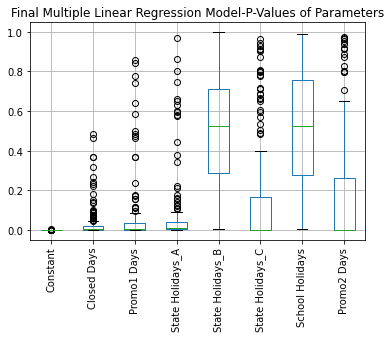

In [166]:
model_final11_cust_list=pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']>=0.50]['Store'].tolist()
model_final11_cust_df=pred_matrix_cust_11[pred_matrix_cust_11['Store'].isin(model_final11_cust_list)]
model_final11_cust_df.boxplot(column=model_final11_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [167]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_C=[]
Promo2=[]
adj_r=[]
predict_2013_cust_11=[]
predict_2014_cust_11=[]
predict_2015_cust_11=[]

for s in store_list:
    store_cust_11_2013=eleven_y1[eleven_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_11_2013.columns=['Month of Sale','Customers']
    closed_days_11_2013=closed_days_11_y1[closed_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2013=promo_days_11_y1[promo_days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2013=st_hol_a_11_y1[st_hol_a_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_11_2013=st_hol_c_11_y1[st_hol_c_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_11_2013=promo2days_11_y1[promo2days_11_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_11_2013['Total No. of Closed Days']=closed_days_11_2013['No. of Closed Days']
    store_cust_11_2013['Total No. of Promo1 Days']=promo_days_11_2013['No. of Promo1 Days']
    store_cust_11_2013['Total No. of State Holidays-A']=state_hol_a_11_2013['No. of State Holidays-A']
    store_cust_11_2013['Total No. of State Holidays-C']=state_hol_c_11_2013['No. of State Holidays-C']
    store_cust_11_2013['Total No. of Promo2 Days']=promo2_days_11_2013['No. of Promo2 Days']
    store_cust_11_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_11_2013['Total No. of Closed Days']=store_cust_11_2013['Total No. of Closed Days'].fillna(0)
    store_cust_11_2013['Total No. of Promo1 Days']=store_cust_11_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_11_2013['Total No. of State Holidays-A']=store_cust_11_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_11_2013['Total No. of State Holidays-C']=store_cust_11_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_11_2013['Total No. of Promo2 Days']=store_cust_11_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_11_2014=eleven_y2[eleven_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_11_2014.columns=['Month of Sale','Customers']
    closed_days_11_2014=closed_days_11_y2[closed_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_11_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_11_2014=promo_days_11_y2[promo_days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_11_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_11_2014=st_hol_a_11_y2[st_hol_a_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_11_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_11_2014=st_hol_c_11_y2[st_hol_c_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_11_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_11_2014=promo2days_11_y2[promo2days_11_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_11_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_11_2014['Total No. of Closed Days']=closed_days_11_2014['No. of Closed Days']
    store_cust_11_2014['Total No. of Promo1 Days']=promo_days_11_2014['No. of Promo1 Days']
    store_cust_11_2014['Total No. of State Holidays-A']=state_hol_a_11_2014['No. of State Holidays-A']
    store_cust_11_2014['Total No. of State Holidays-C']=state_hol_c_11_2014['No. of State Holidays-C']
    store_cust_11_2014['Total No. of Promo2 Days']=promo2_days_11_2014['No. of Promo2 Days']
    store_cust_11_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_11_2014['Total No. of Closed Days']=store_cust_11_2014['Total No. of Closed Days'].fillna(0)
    store_cust_11_2014['Total No. of Promo1 Days']=store_cust_11_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_11_2014['Total No. of State Holidays-A']=store_cust_11_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_11_2014['Total No. of State Holidays-C']=store_cust_11_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_11_2014['Total No. of Promo2 Days']=store_cust_11_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_11_2013.columns[2:]
    dep_var_11_2013=store_cust_11_2013['Customers']
    ind_var1_11_2013=store_cust_11_2013[var_col_2013]
    ind_var2_11_2013=sm.add_constant(ind_var1_11_2013)
    var_col_2014=store_cust_11_2014.columns[2:]
    dep_var_11_2014=store_cust_11_2014['Customers']
    ind_var1_11_2014=store_cust_11_2014[var_col_2014]
    ind_var2_11_2014=sm.add_constant(ind_var1_11_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_11_2013.append([store_cust_11_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final11=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final11.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final11.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_4=pd.DataFrame(model_final11.predict(ind_var2_11_2013))
    pred_cust_4.columns=['Pred']
    pred_cust_5=pd.DataFrame(model_final11.predict(ind_var2_11_2014))
    pred_cust_5.columns=['Pred']
    pred_cust_6=pd.DataFrame(model_final11.predict(ind_var2_2015))
    pred_cust_6.columns=['Pred']
    predict_2013_cust_11.append(pred_cust_4['Pred'].tolist())
    predict_2014_cust_11.append(pred_cust_5['Pred'].tolist())
    predict_2015_cust_11.append(pred_cust_6['Pred'].tolist())

pred_matrix_cust_11=pd.DataFrame(store_list)
pred_matrix_cust_11.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_11['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_11['Constant']=Const['Constant']
pred_matrix_cust_11['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_11['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_11['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_11['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_11['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']>=0.50]['Store'].tolist()))

49
188


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

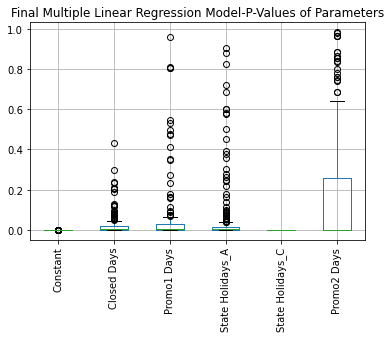

In [168]:
model_final11_cust_list=pred_matrix_cust_11[pred_matrix_cust_11['Adjusted R squared']>=0.50]['Store'].tolist()
model_final11_cust_df=pred_matrix_cust_11[pred_matrix_cust_11['Store'].isin(model_final11_cust_list)]
model_final11_cust_df.boxplot(column=model_final11_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')

In [169]:
modeldata_11_cust_y1=eleven_y1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_11_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_11_cust_y2=eleven_y2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_11_cust_y2.columns=['Store','Month of Sale','Customers']
modeldata_11_cust_y3=eleven_y3.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_11_cust_y3.columns=['Store','Month of Sale','Customers']


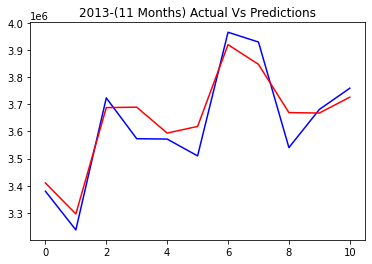

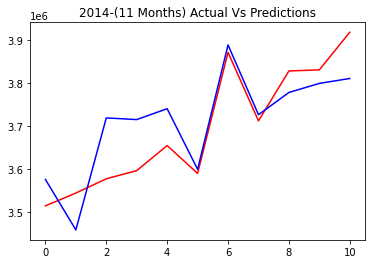

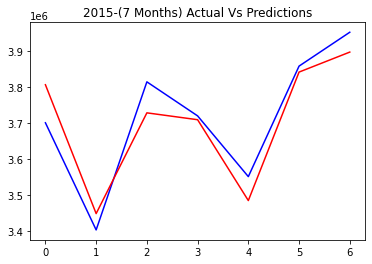

In [170]:
predict_2013_cust_11_df=[item for sublist in predict_2013_cust_11 for item in sublist]  
predict_2014_cust_11_df=[item for sublist in predict_2014_cust_11 for item in sublist]  
predict_2015_cust_11_df=[item for sublist in predict_2015_cust_11 for item in sublist]  
modeldata_11_cust_y1['Predictions-Final11 Cust Model']=predict_2013_cust_11_df
modeldata_11_cust_y2['Predictions-Final11 Cust Model']=predict_2014_cust_11_df
modeldata_11_cust_y3['Predictions-Final11 Cust Model']=predict_2015_cust_11_df
modeldata_11_cust_y1['Predictions-Final11 Cust Model']=modeldata_11_cust_y1['Predictions-Final11 Cust Model'].astype(int)
modeldata_11_cust_y2['Predictions-Final11 Cust Model']=modeldata_11_cust_y2['Predictions-Final11 Cust Model'].astype(int)
modeldata_11_cust_y3['Predictions-Final11 Cust Model']=modeldata_11_cust_y3['Predictions-Final11 Cust Model'].astype(int)
modeldata_11_cust_y1_mat_1=modeldata_11_cust_y1[modeldata_11_cust_y1['Store'].isin(model_final11_cust_list)]
modeldata_11_cust_y2_mat_1=modeldata_11_cust_y2[modeldata_11_cust_y2['Store'].isin(model_final11_cust_list)]
modeldata_11_cust_y3_mat_1=modeldata_11_cust_y3[modeldata_11_cust_y3['Store'].isin(model_final11_cust_list)]

sale_11_cust_y1_mat_1=pd.DataFrame(modeldata_11_cust_y1_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_11_cust_y1_mat_1=pd.DataFrame(modeldata_11_cust_y1_mat_1.groupby('Month of Sale')['Predictions-Final11 Cust Model'].sum()).reset_index()
sale_11_cust_y2_mat_1=pd.DataFrame(modeldata_11_cust_y2_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_11_cust_y2_mat_1=pd.DataFrame(modeldata_11_cust_y2_mat_1.groupby('Month of Sale')['Predictions-Final11 Cust Model'].sum()).reset_index()
sale_11_cust_y3_mat_1=pd.DataFrame(modeldata_11_cust_y3_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_11_cust_y3_mat_1=pd.DataFrame(modeldata_11_cust_y3_mat_1.groupby('Month of Sale')['Predictions-Final11 Cust Model'].sum()).reset_index()

plt.plot(sale_11_cust_y1_mat_1['Customers'],color='Blue')
plt.plot(pred_11_cust_y1_mat_1['Predictions-Final11 Cust Model'],color='Red')
plt.title('2013-(11 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final11 Cust Model(For 188 Stores)')


plt.plot(pred_11_cust_y2_mat_1['Predictions-Final11 Cust Model'],color='Red')
plt.plot(sale_11_cust_y2_mat_1['Customers'],color='Blue')
plt.title('2014-(11 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final11 Cust Model(For 188 Stores)')


plt.plot(sale_11_cust_y3_mat_1['Customers'],color='Blue')
plt.plot(pred_11_cust_y3_mat_1['Predictions-Final11 Cust Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final9 Model(For 188 Stores)')


**Predictive Model: 10 months Data from 2013 and 2014, 7 Months data from 2015**
<a id='MLR_10'></a>

In [171]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
ten=[1,2,3,4,5,6,7,8,9,10]
ten_y1=year1_data[year1_data['Month of Sale'].isin(ten)]
ten_y2=year2_data[year2_data['Month of Sale'].isin(ten)]
ten_y3=year3_data[year3_data['Month of Sale'].isin(ten)]
promo2days_10_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(ten)]
promo2days_10_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(ten)]
promo2days_10_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(ten)]
closed_days_10_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(ten)]
closed_days_10_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(ten)]
promo_days_10_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(ten)]
promo_days_10_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(ten)]
st_hol_a_10_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(ten)]
st_hol_a_10_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(ten)]
st_hol_b_10_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(ten)]
st_hol_b_10_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(ten)]
st_hol_c_10_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(ten)]
st_hol_c_10_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(ten)]
sch_hol_10_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(ten)]
sch_hol_10_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(ten)]
modeldata_10_y1=ten_y1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y1.columns=['Store','Month of Sale','Sales']
modeldata_10_y2=ten_y2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y2.columns=['Store','Month of Sale','Sales']
modeldata_10_y3=ten_y3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y3.columns=['Store','Month of Sale','Sales']


**Model for Sales**

In [172]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_10=[]
predict_2014_10=[]
predict_2015_10=[]

for s in store_list:
    store_sales_10_2013=ten_y1[ten_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_10_2013.columns=['Month of Sale','Sales']
    closed_days_10_2013=closed_days_10_y1[closed_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2013=promo_days_10_y1[promo_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2013=st_hol_a_10_y1[st_hol_a_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_10_2013=st_hol_b_10_y1[st_hol_b_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_10_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_10_2013=st_hol_c_10_y1[st_hol_c_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_10_2013=sch_hol_10_y1[sch_hol_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_10_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_10_2013=promo2days_10_y1[promo2days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_10_2013['Total No. of Closed Days']=closed_days_10_2013['No. of Closed Days']
    store_sales_10_2013['Total No. of Promo1 Days']=promo_days_10_2013['No. of Promo1 Days']
    store_sales_10_2013['Total No. of State Holidays-A']=state_hol_a_10_2013['No. of State Holidays-A']
    store_sales_10_2013['Total No. of State Holidays-B']=state_hol_b_10_2013['No. of State Holidays-B']
    store_sales_10_2013['Total No. of State Holidays-C']=state_hol_c_10_2013['No. of State Holidays-C']
    store_sales_10_2013['Total No. of School Holidays']=sch_hol_10_2013['No. of School Holidays']
    store_sales_10_2013['Total No. of Promo2 Days']=promo2_days_10_2013['No. of Promo2 Days']
    store_sales_10_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_10_2013['Total No. of Closed Days']=store_sales_10_2013['Total No. of Closed Days'].fillna(0)
    store_sales_10_2013['Total No. of Promo1 Days']=store_sales_10_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_10_2013['Total No. of State Holidays-A']=store_sales_10_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_10_2013['Total No. of State Holidays-B']=store_sales_10_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_10_2013['Total No. of State Holidays-C']=store_sales_10_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_10_2013['Total No. of School Holidays']=store_sales_10_2013['Total No. of School Holidays'].fillna(0)
    store_sales_10_2013['Total No. of Promo2 Days']=store_sales_10_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_10_2014=ten_y2[ten_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_10_2014.columns=['Month of Sale','Sales']
    closed_days_10_2014=closed_days_10_y2[closed_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2014=promo_days_10_y2[promo_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2014=st_hol_a_10_y2[st_hol_a_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_10_2014=st_hol_b_10_y2[st_hol_b_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_10_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_10_2014=st_hol_c_10_y2[st_hol_c_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_10_2014=sch_hol_10_y2[sch_hol_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_10_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_10_2014=promo2days_10_y2[promo2days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_10_2014['Total No. of Closed Days']=closed_days_10_2014['No. of Closed Days']
    store_sales_10_2014['Total No. of Promo1 Days']=promo_days_10_2014['No. of Promo1 Days']
    store_sales_10_2014['Total No. of State Holidays-A']=state_hol_a_10_2014['No. of State Holidays-A']
    store_sales_10_2014['Total No. of State Holidays-B']=state_hol_b_10_2014['No. of State Holidays-B']
    store_sales_10_2014['Total No. of State Holidays-C']=state_hol_c_10_2014['No. of State Holidays-C']
    store_sales_10_2014['Total No. of School Holidays']=sch_hol_10_2014['No. of School Holidays']
    store_sales_10_2014['Total No. of Promo2 Days']=promo2_days_10_2014['No. of Promo2 Days']
    store_sales_10_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_10_2014['Total No. of Closed Days']=store_sales_10_2014['Total No. of Closed Days'].fillna(0)
    store_sales_10_2014['Total No. of Promo1 Days']=store_sales_10_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_10_2014['Total No. of State Holidays-A']=store_sales_10_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_10_2014['Total No. of State Holidays-B']=store_sales_10_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_10_2014['Total No. of State Holidays-C']=store_sales_10_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_10_2014['Total No. of School Holidays']=store_sales_10_2014['Total No. of School Holidays'].fillna(0)
    store_sales_10_2014['Total No. of Promo2 Days']=store_sales_10_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_10_2013.columns[2:]
    dep_var_10_2013=store_sales_10_2013['Sales']
    ind_var1_10_2013=store_sales_10_2013[var_col_2013]
    ind_var2_10_2013=sm.add_constant(ind_var1_10_2013)
    var_col_2014=store_sales_10_2014.columns[2:]
    dep_var_10_2014=store_sales_10_2014['Sales']
    ind_var1_10_2014=store_sales_10_2014[var_col_2014]
    ind_var2_10_2014=sm.add_constant(ind_var1_10_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_10_2013.append([store_sales_10_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final10=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final10.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final10.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_38=pd.DataFrame(model_final10.predict(ind_var2_10_2013))
    pred_38.columns=['Pred']
    pred_39=pd.DataFrame(model_final10.predict(ind_var2_10_2014))
    pred_39.columns=['Pred']
    pred_40=pd.DataFrame(model_final10.predict(ind_var2_2015))
    pred_40.columns=['Pred']
    predict_2013_10.append(pred_38['Pred'].tolist())
    predict_2014_10.append(pred_39['Pred'].tolist())
    predict_2015_10.append(pred_40['Pred'].tolist())

pred_matrix_10=pd.DataFrame(store_list)
pred_matrix_10.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_10['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_10['Constant']=Const['Constant']
pred_matrix_10['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_10['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_10['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_10['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_10['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_10['School Holidays']=Sch['School Holidays']
pred_matrix_10['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_10[pred_matrix_10['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_10[pred_matrix_10['Adjusted R squared']>=0.50]['Store'].tolist()))

66
189


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

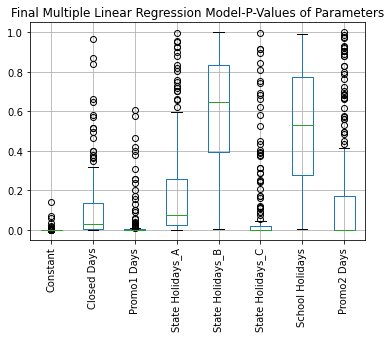

In [173]:
model_final10_list=pred_matrix_10[pred_matrix_10['Adjusted R squared']>=0.50]['Store'].tolist()
model_final10_df=pred_matrix_10[pred_matrix_10['Store'].isin(model_final10_list)]
model_final10_df.boxplot(column=model_final10_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [174]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_10=[]
predict_2014_10=[]
predict_2015_10=[]

for s in store_list:
    store_sales_10_2013=ten_y1[ten_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_10_2013.columns=['Month of Sale','Sales']
    closed_days_10_2013=closed_days_10_y1[closed_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2013=promo_days_10_y1[promo_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2013=st_hol_a_10_y1[st_hol_a_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_10_2013=st_hol_c_10_y1[st_hol_c_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_10_2013=promo2days_10_y1[promo2days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_10_2013['Total No. of Closed Days']=closed_days_10_2013['No. of Closed Days']
    store_sales_10_2013['Total No. of Promo1 Days']=promo_days_10_2013['No. of Promo1 Days']
    store_sales_10_2013['Total No. of State Holidays-A']=state_hol_a_10_2013['No. of State Holidays-A']
    store_sales_10_2013['Total No. of State Holidays-C']=state_hol_c_10_2013['No. of State Holidays-C']
    store_sales_10_2013['Total No. of Promo2 Days']=promo2_days_10_2013['No. of Promo2 Days']
    store_sales_10_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_10_2013['Total No. of Closed Days']=store_sales_10_2013['Total No. of Closed Days'].fillna(0)
    store_sales_10_2013['Total No. of Promo1 Days']=store_sales_10_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_10_2013['Total No. of State Holidays-A']=store_sales_10_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_10_2013['Total No. of State Holidays-C']=store_sales_10_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_10_2013['Total No. of Promo2 Days']=store_sales_10_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_10_2014=ten_y2[ten_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_10_2014.columns=['Month of Sale','Sales']
    closed_days_10_2014=closed_days_10_y2[closed_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2014=promo_days_10_y2[promo_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2014=st_hol_a_10_y2[st_hol_a_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_10_2014=st_hol_c_10_y2[st_hol_c_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_10_2014=promo2days_10_y2[promo2days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_10_2014['Total No. of Closed Days']=closed_days_10_2014['No. of Closed Days']
    store_sales_10_2014['Total No. of Promo1 Days']=promo_days_10_2014['No. of Promo1 Days']
    store_sales_10_2014['Total No. of State Holidays-A']=state_hol_a_10_2014['No. of State Holidays-A']
    store_sales_10_2014['Total No. of State Holidays-C']=state_hol_c_10_2014['No. of State Holidays-C']
    store_sales_10_2014['Total No. of Promo2 Days']=promo2_days_10_2014['No. of Promo2 Days']
    store_sales_10_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_10_2014['Total No. of Closed Days']=store_sales_10_2014['Total No. of Closed Days'].fillna(0)
    store_sales_10_2014['Total No. of Promo1 Days']=store_sales_10_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_10_2014['Total No. of State Holidays-A']=store_sales_10_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_10_2014['Total No. of State Holidays-C']=store_sales_10_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_10_2014['Total No. of Promo2 Days']=store_sales_10_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_10_2013.columns[2:]
    dep_var_10_2013=store_sales_10_2013['Sales']
    ind_var1_10_2013=store_sales_10_2013[var_col_2013]
    ind_var2_10_2013=sm.add_constant(ind_var1_10_2013)
    var_col_2014=store_sales_10_2014.columns[2:]
    dep_var_10_2014=store_sales_10_2014['Sales']
    ind_var1_10_2014=store_sales_10_2014[var_col_2014]
    ind_var2_10_2014=sm.add_constant(ind_var1_10_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_10_2013.append([store_sales_10_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final10=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final10.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final10.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_38=pd.DataFrame(model_final10.predict(ind_var2_10_2013))
    pred_38.columns=['Pred']
    pred_39=pd.DataFrame(model_final10.predict(ind_var2_10_2014))
    pred_39.columns=['Pred']
    pred_40=pd.DataFrame(model_final10.predict(ind_var2_2015))
    pred_40.columns=['Pred']
    predict_2013_10.append(pred_38['Pred'].tolist())
    predict_2014_10.append(pred_39['Pred'].tolist())
    predict_2015_10.append(pred_40['Pred'].tolist())

pred_matrix_10=pd.DataFrame(store_list)
pred_matrix_10.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_10['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_10['Constant']=Const['Constant']
pred_matrix_10['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_10['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_10['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_10['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_10['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_10[pred_matrix_10['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_10[pred_matrix_10['Adjusted R squared']>=0.50]['Store'].tolist()))

32
217


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

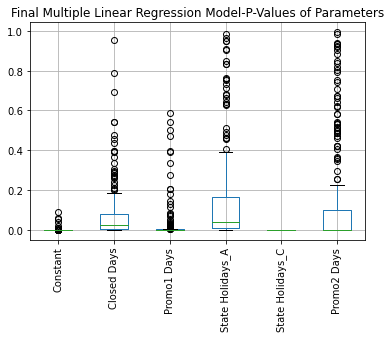

In [175]:
model_final10_list=pred_matrix_10[pred_matrix_10['Adjusted R squared']>=0.50]['Store'].tolist()
model_final10_df=pred_matrix_10[pred_matrix_10['Store'].isin(model_final10_list)]
model_final10_df.boxplot(column=model_final10_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


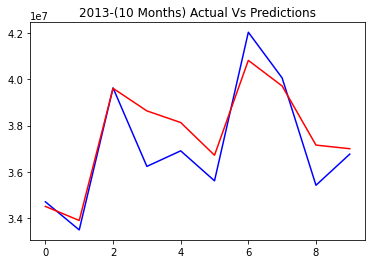

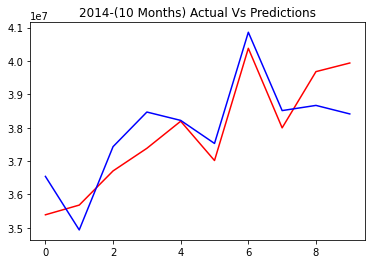

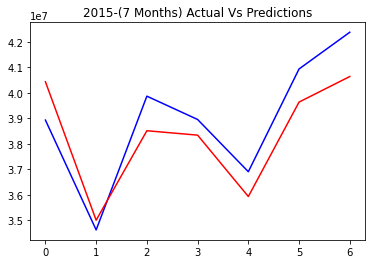

In [176]:
predict_2013_10_df=[item for sublist in predict_2013_10 for item in sublist]  
predict_2014_10_df=[item for sublist in predict_2014_10 for item in sublist]  
predict_2015_10_df=[item for sublist in predict_2015_10 for item in sublist]  
modeldata_10_y1['Predictions-Final10 Model']=predict_2013_10_df
modeldata_10_y2['Predictions-Final10 Model']=predict_2014_10_df
modeldata_10_y3['Predictions-Final10 Model']=predict_2015_10_df
modeldata_10_y1['Predictions-Final10 Model']=modeldata_10_y1['Predictions-Final10 Model'].astype(int)
modeldata_10_y2['Predictions-Final10 Model']=modeldata_10_y2['Predictions-Final10 Model'].astype(int)
modeldata_10_y3['Predictions-Final10 Model']=modeldata_10_y3['Predictions-Final10 Model'].astype(int)
modeldata_10_y1_mat_1=modeldata_10_y1[modeldata_10_y1['Store'].isin(model_final10_list)]
modeldata_10_y2_mat_1=modeldata_10_y2[modeldata_10_y2['Store'].isin(model_final10_list)]
modeldata_10_y3_mat_1=modeldata_10_y3[modeldata_10_y3['Store'].isin(model_final10_list)]

sale_10_y1_mat_1=pd.DataFrame(modeldata_10_y1_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_10_y1_mat_1=pd.DataFrame(modeldata_10_y1_mat_1.groupby('Month of Sale')['Predictions-Final10 Model'].sum()).reset_index()
sale_10_y2_mat_1=pd.DataFrame(modeldata_10_y2_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_10_y2_mat_1=pd.DataFrame(modeldata_10_y2_mat_1.groupby('Month of Sale')['Predictions-Final10 Model'].sum()).reset_index()
sale_10_y3_mat_1=pd.DataFrame(modeldata_10_y3_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_10_y3_mat_1=pd.DataFrame(modeldata_10_y3_mat_1.groupby('Month of Sale')['Predictions-Final10 Model'].sum()).reset_index()

plt.plot(sale_10_y1_mat_1['Sales'],color='Blue')
plt.plot(pred_10_y1_mat_1['Predictions-Final10 Model'],color='Red')
plt.title('2013-(10 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final10 Model(For 217 Stores)')


plt.plot(pred_10_y2_mat_1['Predictions-Final10 Model'],color='Red')
plt.plot(sale_10_y2_mat_1['Sales'],color='Blue')
plt.title('2014-(10 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final10 Model(For 217 Stores)')


plt.plot(sale_10_y3_mat_1['Sales'],color='Blue')
plt.plot(pred_10_y3_mat_1['Predictions-Final10 Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final10 Model(For 217 Stores)')


**Model for Customer walkins**

In [177]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
ten=[1,2,3,4,5,6,7,8,9,10]
ten_y1=year1_data[year1_data['Month of Sale'].isin(ten)]
ten_y2=year2_data[year2_data['Month of Sale'].isin(ten)]
ten_y3=year3_data[year3_data['Month of Sale'].isin(ten)]
promo2days_10_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(ten)]
promo2days_10_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(ten)]
promo2days_10_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(ten)]
closed_days_10_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(ten)]
closed_days_10_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(ten)]
promo_days_10_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(ten)]
promo_days_10_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(ten)]
st_hol_a_10_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(ten)]
st_hol_a_10_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(ten)]
st_hol_b_10_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(ten)]
st_hol_b_10_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(ten)]
st_hol_c_10_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(ten)]
st_hol_c_10_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(ten)]
sch_hol_10_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(ten)]
sch_hol_10_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(ten)]
modeldata_10_y1=ten_y1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y1.columns=['Store','Month of Sale','Sales']
modeldata_10_y2=ten_y2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y2.columns=['Store','Month of Sale','Sales']
modeldata_10_y3=ten_y3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_10_y3.columns=['Store','Month of Sale','Sales']


In [178]:
modeldata_10_cust_y1=ten_y1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_10_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_10_cust_y2=ten_y2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_10_cust_y2.columns=['Store','Month of Sale','Customers']

In [179]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_cust_10=[]
predict_2014_cust_10=[]
predict_2015_cust_10=[]

for s in store_list:
    store_cust_10_2013=ten_y1[ten_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_10_2013.columns=['Month of Sale','Customers']
    closed_days_10_2013=closed_days_10_y1[closed_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2013=promo_days_10_y1[promo_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2013=st_hol_a_10_y1[st_hol_a_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_10_2013=st_hol_b_10_y1[st_hol_b_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_10_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_10_2013=st_hol_c_10_y1[st_hol_c_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_10_2013=sch_hol_10_y1[sch_hol_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_10_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_10_2013=promo2days_10_y1[promo2days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_10_2013['Total No. of Closed Days']=closed_days_10_2013['No. of Closed Days']
    store_cust_10_2013['Total No. of Promo1 Days']=promo_days_10_2013['No. of Promo1 Days']
    store_cust_10_2013['Total No. of State Holidays-A']=state_hol_a_10_2013['No. of State Holidays-A']
    store_cust_10_2013['Total No. of State Holidays-B']=state_hol_b_10_2013['No. of State Holidays-B']
    store_cust_10_2013['Total No. of State Holidays-C']=state_hol_c_10_2013['No. of State Holidays-C']
    store_cust_10_2013['Total No. of School Holidays']=sch_hol_10_2013['No. of School Holidays']
    store_cust_10_2013['Total No. of Promo2 Days']=promo2_days_10_2013['No. of Promo2 Days']
    store_cust_10_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_10_2013['Total No. of Closed Days']=store_cust_10_2013['Total No. of Closed Days'].fillna(0)
    store_cust_10_2013['Total No. of Promo1 Days']=store_cust_10_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_10_2013['Total No. of State Holidays-A']=store_cust_10_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_10_2013['Total No. of State Holidays-B']=store_cust_10_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_10_2013['Total No. of State Holidays-C']=store_cust_10_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_10_2013['Total No. of School Holidays']=store_cust_10_2013['Total No. of School Holidays'].fillna(0)
    store_cust_10_2013['Total No. of Promo2 Days']=store_cust_10_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_10_2014=ten_y2[ten_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_10_2014.columns=['Month of Sale','Customers']
    closed_days_10_2014=closed_days_10_y2[closed_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2014=promo_days_10_y2[promo_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2014=st_hol_a_10_y2[st_hol_a_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_10_2014=st_hol_b_10_y2[st_hol_b_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_10_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_10_2014=st_hol_c_10_y2[st_hol_c_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_10_2014=sch_hol_10_y2[sch_hol_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_10_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_10_2014=promo2days_10_y2[promo2days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_10_2014['Total No. of Closed Days']=closed_days_10_2014['No. of Closed Days']
    store_cust_10_2014['Total No. of Promo1 Days']=promo_days_10_2014['No. of Promo1 Days']
    store_cust_10_2014['Total No. of State Holidays-A']=state_hol_a_10_2014['No. of State Holidays-A']
    store_cust_10_2014['Total No. of State Holidays-B']=state_hol_b_10_2014['No. of State Holidays-B']
    store_cust_10_2014['Total No. of State Holidays-C']=state_hol_c_10_2014['No. of State Holidays-C']
    store_cust_10_2014['Total No. of School Holidays']=sch_hol_10_2014['No. of School Holidays']
    store_cust_10_2014['Total No. of Promo2 Days']=promo2_days_10_2014['No. of Promo2 Days']
    store_cust_10_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_10_2014['Total No. of Closed Days']=store_cust_10_2014['Total No. of Closed Days'].fillna(0)
    store_cust_10_2014['Total No. of Promo1 Days']=store_cust_10_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_10_2014['Total No. of State Holidays-A']=store_cust_10_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_10_2014['Total No. of State Holidays-B']=store_cust_10_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_10_2014['Total No. of State Holidays-C']=store_cust_10_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_10_2014['Total No. of School Holidays']=store_cust_10_2014['Total No. of School Holidays'].fillna(0)
    store_cust_10_2014['Total No. of Promo2 Days']=store_cust_10_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_10_2013.columns[2:]
    dep_var_10_2013=store_cust_10_2013['Customers']
    ind_var1_10_2013=store_cust_10_2013[var_col_2013]
    ind_var2_10_2013=sm.add_constant(ind_var1_10_2013)
    var_col_2014=store_cust_10_2014.columns[2:]
    dep_var_10_2014=store_cust_10_2014['Customers']
    ind_var1_10_2014=store_cust_10_2014[var_col_2014]
    ind_var2_10_2014=sm.add_constant(ind_var1_10_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_10_2013.append([store_cust_10_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final10_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final10_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final10_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_7=pd.DataFrame(model_final10_cust.predict(ind_var2_10_2013))
    pred_cust_7.columns=['Pred']
    pred_cust_8=pd.DataFrame(model_final10_cust.predict(ind_var2_10_2014))
    pred_cust_8.columns=['Pred']
    pred_cust_9=pd.DataFrame(model_final10_cust.predict(ind_var2_2015))
    pred_cust_9.columns=['Pred']
    predict_2013_cust_10.append(pred_cust_7['Pred'].tolist())
    predict_2014_cust_10.append(pred_cust_8['Pred'].tolist())
    predict_2015_cust_10.append(pred_cust_9['Pred'].tolist())

pred_matrix_cust_10=pd.DataFrame(store_list)
pred_matrix_cust_10.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_10['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_10['Constant']=Const['Constant']
pred_matrix_cust_10['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_10['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_10['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_10['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_cust_10['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_10['School Holidays']=Sch['School Holidays']
pred_matrix_cust_10['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']>=0.50]['Store'].tolist()))

89
224


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

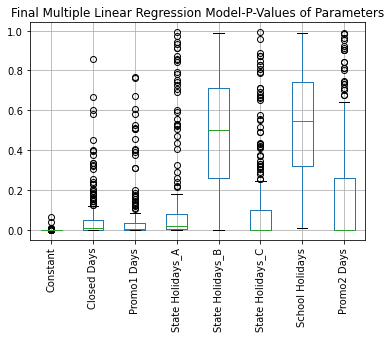

In [180]:
model_final10_cust_list=pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']>=0.50]['Store'].tolist()
model_final10_cust_df=pred_matrix_cust_10[pred_matrix_cust_10['Store'].isin(model_final10_cust_list)]
model_final10_cust_df.boxplot(column=model_final10_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [181]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_C=[]
Promo2=[]
adj_r=[]
predict_2013_cust_10=[]
predict_2014_cust_10=[]
predict_2015_cust_10=[]

for s in store_list:
    store_cust_10_2013=ten_y1[ten_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_10_2013.columns=['Month of Sale','Customers']
    closed_days_10_2013=closed_days_10_y1[closed_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2013=promo_days_10_y1[promo_days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2013=st_hol_a_10_y1[st_hol_a_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_10_2013=st_hol_c_10_y1[st_hol_c_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_10_2013=promo2days_10_y1[promo2days_10_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_10_2013['Total No. of Closed Days']=closed_days_10_2013['No. of Closed Days']
    store_cust_10_2013['Total No. of Promo1 Days']=promo_days_10_2013['No. of Promo1 Days']
    store_cust_10_2013['Total No. of State Holidays-A']=state_hol_a_10_2013['No. of State Holidays-A']
    store_cust_10_2013['Total No. of State Holidays-C']=state_hol_c_10_2013['No. of State Holidays-C']
    store_cust_10_2013['Total No. of Promo2 Days']=promo2_days_10_2013['No. of Promo2 Days']
    store_cust_10_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_10_2013['Total No. of Closed Days']=store_cust_10_2013['Total No. of Closed Days'].fillna(0)
    store_cust_10_2013['Total No. of Promo1 Days']=store_cust_10_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_10_2013['Total No. of State Holidays-A']=store_cust_10_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_10_2013['Total No. of State Holidays-C']=store_cust_10_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_10_2013['Total No. of Promo2 Days']=store_cust_10_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_10_2014=ten_y2[ten_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_10_2014.columns=['Month of Sale','Customers']
    closed_days_10_2014=closed_days_10_y2[closed_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_10_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_10_2014=promo_days_10_y2[promo_days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_10_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_10_2014=st_hol_a_10_y2[st_hol_a_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_10_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_10_2014=st_hol_c_10_y2[st_hol_c_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_10_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_10_2014=promo2days_10_y2[promo2days_10_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_10_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_10_2014['Total No. of Closed Days']=closed_days_10_2014['No. of Closed Days']
    store_cust_10_2014['Total No. of Promo1 Days']=promo_days_10_2014['No. of Promo1 Days']
    store_cust_10_2014['Total No. of State Holidays-A']=state_hol_a_10_2014['No. of State Holidays-A']
    store_cust_10_2014['Total No. of State Holidays-C']=state_hol_c_10_2014['No. of State Holidays-C']
    store_cust_10_2014['Total No. of Promo2 Days']=promo2_days_10_2014['No. of Promo2 Days']
    store_cust_10_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_10_2014['Total No. of Closed Days']=store_cust_10_2014['Total No. of Closed Days'].fillna(0)
    store_cust_10_2014['Total No. of Promo1 Days']=store_cust_10_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_10_2014['Total No. of State Holidays-A']=store_cust_10_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_10_2014['Total No. of State Holidays-C']=store_cust_10_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_10_2014['Total No. of Promo2 Days']=store_cust_10_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_10_2013.columns[2:]
    dep_var_10_2013=store_cust_10_2013['Customers']
    ind_var1_10_2013=store_cust_10_2013[var_col_2013]
    ind_var2_10_2013=sm.add_constant(ind_var1_10_2013)
    var_col_2014=store_cust_10_2014.columns[2:]
    dep_var_10_2014=store_cust_10_2014['Customers']
    ind_var1_10_2014=store_cust_10_2014[var_col_2014]
    ind_var2_10_2014=sm.add_constant(ind_var1_10_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_10_2013.append([store_cust_10_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final10_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final10_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final10_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_7=pd.DataFrame(model_final10_cust.predict(ind_var2_10_2013))
    pred_cust_7.columns=['Pred']
    pred_cust_8=pd.DataFrame(model_final10_cust.predict(ind_var2_10_2014))
    pred_cust_8.columns=['Pred']
    pred_cust_9=pd.DataFrame(model_final10_cust.predict(ind_var2_2015))
    pred_cust_9.columns=['Pred']
    predict_2013_cust_10.append(pred_cust_7['Pred'].tolist())
    predict_2014_cust_10.append(pred_cust_8['Pred'].tolist())
    predict_2015_cust_10.append(pred_cust_9['Pred'].tolist())

pred_matrix_cust_10=pd.DataFrame(store_list)
pred_matrix_cust_10.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_10['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_10['Constant']=Const['Constant']
pred_matrix_cust_10['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_10['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_10['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_10['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_10['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']>=0.50]['Store'].tolist()))

49
237


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

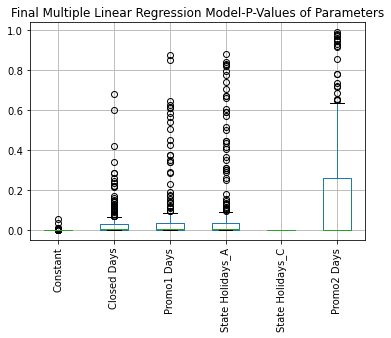

In [182]:
model_final10_cust_list=pred_matrix_cust_10[pred_matrix_cust_10['Adjusted R squared']>=0.50]['Store'].tolist()
model_final10_cust_df=pred_matrix_cust_10[pred_matrix_cust_10['Store'].isin(model_final10_cust_list)]
model_final10_cust_df.boxplot(column=model_final10_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [183]:
modeldata_10_cust_y1=ten_y1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_10_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_10_cust_y2=ten_y2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_10_cust_y2.columns=['Store','Month of Sale','Customers']

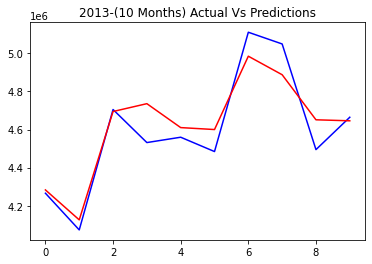

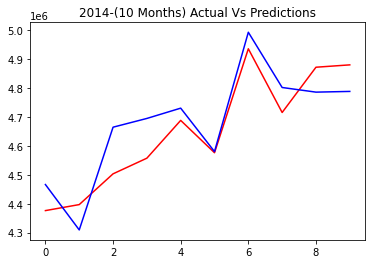

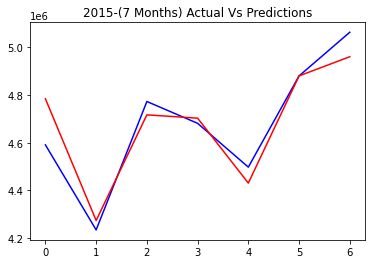

In [184]:
predict_2013_cust_10_df=[item for sublist in predict_2013_cust_10 for item in sublist]  
predict_2014_cust_10_df=[item for sublist in predict_2014_cust_10 for item in sublist]  
predict_2015_cust_10_df=[item for sublist in predict_2015_cust_10 for item in sublist]  
modeldata_10_cust_y1['Predictions-Final10 Cust Model']=predict_2013_cust_10_df
modeldata_10_cust_y2['Predictions-Final10 Cust Model']=predict_2014_cust_10_df
modeldata_11_cust_y3['Predictions-Final10 Cust Model']=predict_2015_cust_10_df
modeldata_10_cust_y1['Predictions-Final10 Cust Model']=modeldata_10_cust_y1['Predictions-Final10 Cust Model'].astype(int)
modeldata_10_cust_y2['Predictions-Final10 Cust Model']=modeldata_10_cust_y2['Predictions-Final10 Cust Model'].astype(int)
modeldata_11_cust_y3['Predictions-Final10 Cust Model']=modeldata_11_cust_y3['Predictions-Final10 Cust Model'].astype(int)
modeldata_10_cust_y1_mat_1=modeldata_10_cust_y1[modeldata_10_cust_y1['Store'].isin(model_final10_cust_list)]
modeldata_10_cust_y2_mat_1=modeldata_10_cust_y2[modeldata_10_cust_y2['Store'].isin(model_final10_cust_list)]
modeldata_11_cust_y3_mat_1=modeldata_11_cust_y3[modeldata_11_cust_y3['Store'].isin(model_final10_cust_list)]

sale_10_cust_y1_mat_1=pd.DataFrame(modeldata_10_cust_y1_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_10_cust_y1_mat_1=pd.DataFrame(modeldata_10_cust_y1_mat_1.groupby('Month of Sale')['Predictions-Final10 Cust Model'].sum()).reset_index()
sale_10_cust_y2_mat_1=pd.DataFrame(modeldata_10_cust_y2_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_10_cust_y2_mat_1=pd.DataFrame(modeldata_10_cust_y2_mat_1.groupby('Month of Sale')['Predictions-Final10 Cust Model'].sum()).reset_index()
sale_10_cust_y3_mat_1=pd.DataFrame(modeldata_11_cust_y3_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_10_cust_y3_mat_1=pd.DataFrame(modeldata_11_cust_y3_mat_1.groupby('Month of Sale')['Predictions-Final10 Cust Model'].sum()).reset_index()

plt.plot(sale_10_cust_y1_mat_1['Customers'],color='Blue')
plt.plot(pred_10_cust_y1_mat_1['Predictions-Final10 Cust Model'],color='Red')
plt.title('2013-(10 Months) Actual Vs Predictions')
plt.show('Actual 2013 Customer walk-ins Vs Predictions-Final10 Model(For 237 Stores)')


plt.plot(pred_10_cust_y2_mat_1['Predictions-Final10 Cust Model'],color='Red')
plt.plot(sale_10_cust_y2_mat_1['Customers'],color='Blue')
plt.title('2014-(10 Months) Actual Vs Predictions')
plt.show('Actual 2014 Customer walk-ins Vs Predictions-Final10 Model(For 237 Stores)')


plt.plot(sale_10_cust_y3_mat_1['Customers'],color='Blue')
plt.plot(pred_10_cust_y3_mat_1['Predictions-Final10 Cust Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Customer walk-ins Vs Predictions-Final10 Model(For 237 Stores)')


**Predictive Model: 9 months Data from 2013 and 2014, 7 Months data from 2015**
<a id='MLR_9'></a>

**Model for Sales**

In [185]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
nine=[1,2,3,4,5,6,7,8,9]
nine_y1=year1_data[year1_data['Month of Sale'].isin(nine)]
nine_y2=year2_data[year2_data['Month of Sale'].isin(nine)]
nine_y3=year3_data[year3_data['Month of Sale'].isin(nine)]
promo2days_9_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(nine)]
promo2days_9_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(nine)]
promo2days_9_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(nine)]
closed_days_9_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(nine)]
closed_days_9_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(nine)]
promo_days_9_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(nine)]
promo_days_9_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(nine)]
st_hol_a_9_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(nine)]
st_hol_a_9_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(nine)]
st_hol_b_9_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(nine)]
st_hol_b_9_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(nine)]
st_hol_c_9_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(nine)]
st_hol_c_9_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(nine)]
sch_hol_9_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(nine)]
sch_hol_9_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(nine)]
modeldata_9_y1=nine_y1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_9_y1.columns=['Store','Month of Sale','Sales']
modeldata_9_y2=nine_y2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_9_y2.columns=['Store','Month of Sale','Sales']
modeldata_9_y3=nine_y3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_9_y3.columns=['Store','Month of Sale','Sales']


In [186]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_9=[]
predict_2014_9=[]
predict_2015_9=[]

for s in store_list:
    store_sales_9_2013=nine_y1[nine_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_9_2013.columns=['Month of Sale','Sales']
    closed_days_9_2013=closed_days_9_y1[closed_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2013=promo_days_9_y1[promo_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2013=st_hol_a_9_y1[st_hol_a_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_9_2013=st_hol_b_9_y1[st_hol_b_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_9_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_9_2013=st_hol_c_9_y1[st_hol_c_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_9_2013=sch_hol_9_y1[sch_hol_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_9_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_9_2013=promo2days_9_y1[promo2days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_9_2013['Total No. of Closed Days']=closed_days_9_2013['No. of Closed Days']
    store_sales_9_2013['Total No. of Promo1 Days']=promo_days_9_2013['No. of Promo1 Days']
    store_sales_9_2013['Total No. of State Holidays-A']=state_hol_a_9_2013['No. of State Holidays-A']
    store_sales_9_2013['Total No. of State Holidays-B']=state_hol_b_9_2013['No. of State Holidays-B']
    store_sales_9_2013['Total No. of State Holidays-C']=state_hol_c_9_2013['No. of State Holidays-C']
    store_sales_9_2013['Total No. of School Holidays']=sch_hol_9_2013['No. of School Holidays']
    store_sales_9_2013['Total No. of Promo2 Days']=promo2_days_9_2013['No. of Promo2 Days']
    store_sales_9_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_9_2013['Total No. of Closed Days']=store_sales_9_2013['Total No. of Closed Days'].fillna(0)
    store_sales_9_2013['Total No. of Promo1 Days']=store_sales_9_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_9_2013['Total No. of State Holidays-A']=store_sales_9_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_9_2013['Total No. of State Holidays-B']=store_sales_9_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_9_2013['Total No. of State Holidays-C']=store_sales_9_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_9_2013['Total No. of School Holidays']=store_sales_9_2013['Total No. of School Holidays'].fillna(0)
    store_sales_9_2013['Total No. of Promo2 Days']=store_sales_9_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_9_2014=nine_y2[nine_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_9_2014.columns=['Month of Sale','Sales']
    closed_days_9_2014=closed_days_9_y2[closed_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2014=promo_days_9_y2[promo_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2014=st_hol_a_9_y2[st_hol_a_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_9_2014=st_hol_b_9_y2[st_hol_b_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_9_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_9_2014=st_hol_c_9_y2[st_hol_c_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_9_2014=sch_hol_9_y2[sch_hol_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_9_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_9_2014=promo2days_9_y2[promo2days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_9_2014['Total No. of Closed Days']=closed_days_9_2014['No. of Closed Days']
    store_sales_9_2014['Total No. of Promo1 Days']=promo_days_9_2014['No. of Promo1 Days']
    store_sales_9_2014['Total No. of State Holidays-A']=state_hol_a_9_2014['No. of State Holidays-A']
    store_sales_9_2014['Total No. of State Holidays-B']=state_hol_b_9_2014['No. of State Holidays-B']
    store_sales_9_2014['Total No. of State Holidays-C']=state_hol_c_9_2014['No. of State Holidays-C']
    store_sales_9_2014['Total No. of School Holidays']=sch_hol_9_2014['No. of School Holidays']
    store_sales_9_2014['Total No. of Promo2 Days']=promo2_days_9_2014['No. of Promo2 Days']
    store_sales_9_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_9_2014['Total No. of Closed Days']=store_sales_9_2014['Total No. of Closed Days'].fillna(0)
    store_sales_9_2014['Total No. of Promo1 Days']=store_sales_9_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_9_2014['Total No. of State Holidays-A']=store_sales_9_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_9_2014['Total No. of State Holidays-B']=store_sales_9_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_9_2014['Total No. of State Holidays-C']=store_sales_9_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_9_2014['Total No. of School Holidays']=store_sales_9_2014['Total No. of School Holidays'].fillna(0)
    store_sales_9_2014['Total No. of Promo2 Days']=store_sales_9_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_9_2013.columns[2:]
    dep_var_9_2013=store_sales_9_2013['Sales']
    ind_var1_9_2013=store_sales_9_2013[var_col_2013]
    ind_var2_9_2013=sm.add_constant(ind_var1_9_2013)
    var_col_2014=store_sales_9_2014.columns[2:]
    dep_var_9_2014=store_sales_9_2014['Sales']
    ind_var1_9_2014=store_sales_9_2014[var_col_2014]
    ind_var2_9_2014=sm.add_constant(ind_var1_9_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_9_2013.append([store_sales_9_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final9=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final9.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final9.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_32=pd.DataFrame(model_final9.predict(ind_var2_9_2013))
    pred_32.columns=['Pred']
    pred_33=pd.DataFrame(model_final9.predict(ind_var2_9_2014))
    pred_33.columns=['Pred']
    pred_34=pd.DataFrame(model_final9.predict(ind_var2_2015))
    pred_34.columns=['Pred']
    predict_2013_9.append(pred_32['Pred'].tolist())
    predict_2014_9.append(pred_33['Pred'].tolist())
    predict_2015_9.append(pred_34['Pred'].tolist())

pred_matrix_9=pd.DataFrame(store_list)
pred_matrix_9.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_9['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_9['Constant']=Const['Constant']
pred_matrix_9['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_9['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_9['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_9['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_9['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_9['School Holidays']=Sch['School Holidays']
pred_matrix_9['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_9[pred_matrix_9['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_9[pred_matrix_9['Adjusted R squared']>=0.50]['Store'].tolist()))

76
234


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

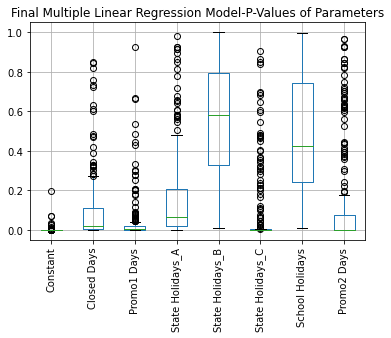

In [187]:
model_final9_list=pred_matrix_9[pred_matrix_9['Adjusted R squared']>=0.50]['Store'].tolist()
model_final9_df=pred_matrix_9[pred_matrix_9['Store'].isin(model_final9_list)]
model_final9_df.boxplot(column=model_final9_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [188]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_9=[]
predict_2014_9=[]
predict_2015_9=[]

for s in store_list:
    store_sales_9_2013=nine_y1[nine_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_9_2013.columns=['Month of Sale','Sales']
    closed_days_9_2013=closed_days_9_y1[closed_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2013=promo_days_9_y1[promo_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2013=st_hol_a_9_y1[st_hol_a_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_9_2013=st_hol_c_9_y1[st_hol_c_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_9_2013=promo2days_9_y1[promo2days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_9_2013['Total No. of Closed Days']=closed_days_9_2013['No. of Closed Days']
    store_sales_9_2013['Total No. of Promo1 Days']=promo_days_9_2013['No. of Promo1 Days']
    store_sales_9_2013['Total No. of State Holidays-A']=state_hol_a_9_2013['No. of State Holidays-A']
    store_sales_9_2013['Total No. of State Holidays-C']=state_hol_c_9_2013['No. of State Holidays-C']
    store_sales_9_2013['Total No. of Promo2 Days']=promo2_days_9_2013['No. of Promo2 Days']
    store_sales_9_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_9_2013['Total No. of Closed Days']=store_sales_9_2013['Total No. of Closed Days'].fillna(0)
    store_sales_9_2013['Total No. of Promo1 Days']=store_sales_9_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_9_2013['Total No. of State Holidays-A']=store_sales_9_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_9_2013['Total No. of State Holidays-C']=store_sales_9_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_9_2013['Total No. of Promo2 Days']=store_sales_9_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_9_2014=nine_y2[nine_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_9_2014.columns=['Month of Sale','Sales']
    closed_days_9_2014=closed_days_9_y2[closed_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2014=promo_days_9_y2[promo_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2014=st_hol_a_9_y2[st_hol_a_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_9_2014=st_hol_c_9_y2[st_hol_c_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_9_2014=promo2days_9_y2[promo2days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_9_2014['Total No. of Closed Days']=closed_days_9_2014['No. of Closed Days']
    store_sales_9_2014['Total No. of Promo1 Days']=promo_days_9_2014['No. of Promo1 Days']
    store_sales_9_2014['Total No. of State Holidays-A']=state_hol_a_9_2014['No. of State Holidays-A']
    store_sales_9_2014['Total No. of State Holidays-C']=state_hol_c_9_2014['No. of State Holidays-C']
    store_sales_9_2014['Total No. of Promo2 Days']=promo2_days_9_2014['No. of Promo2 Days']
    store_sales_9_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_9_2014['Total No. of Closed Days']=store_sales_9_2014['Total No. of Closed Days'].fillna(0)
    store_sales_9_2014['Total No. of Promo1 Days']=store_sales_9_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_9_2014['Total No. of State Holidays-A']=store_sales_9_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_9_2014['Total No. of State Holidays-C']=store_sales_9_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_9_2014['Total No. of Promo2 Days']=store_sales_9_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_9_2013.columns[2:]
    dep_var_9_2013=store_sales_9_2013['Sales']
    ind_var1_9_2013=store_sales_9_2013[var_col_2013]
    ind_var2_9_2013=sm.add_constant(ind_var1_9_2013)
    var_col_2014=store_sales_9_2014.columns[2:]
    dep_var_9_2014=store_sales_9_2014['Sales']
    ind_var1_9_2014=store_sales_9_2014[var_col_2014]
    ind_var2_9_2014=sm.add_constant(ind_var1_9_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_9_2013.append([store_sales_9_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final9=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final9.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final9.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_32=pd.DataFrame(model_final9.predict(ind_var2_9_2013))
    pred_32.columns=['Pred']
    pred_33=pd.DataFrame(model_final9.predict(ind_var2_9_2014))
    pred_33.columns=['Pred']
    pred_34=pd.DataFrame(model_final9.predict(ind_var2_2015))
    pred_34.columns=['Pred']
    predict_2013_9.append(pred_32['Pred'].tolist())
    predict_2014_9.append(pred_33['Pred'].tolist())
    predict_2015_9.append(pred_34['Pred'].tolist())

pred_matrix_9=pd.DataFrame(store_list)
pred_matrix_9.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_9['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_9['Constant']=Const['Constant']
pred_matrix_9['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_9['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_9['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_9['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_9['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_9[pred_matrix_9['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_9[pred_matrix_9['Adjusted R squared']>=0.50]['Store'].tolist()))

46
258


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

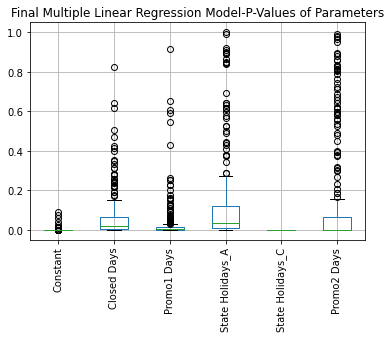

In [189]:
model_final9_list=pred_matrix_9[pred_matrix_9['Adjusted R squared']>=0.50]['Store'].tolist()
model_final9_df=pred_matrix_9[pred_matrix_9['Store'].isin(model_final9_list)]
model_final9_df.boxplot(column=model_final9_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


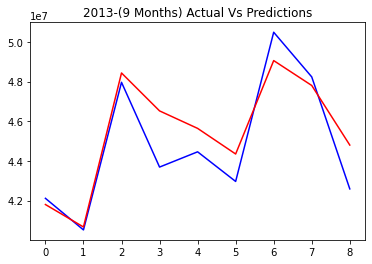

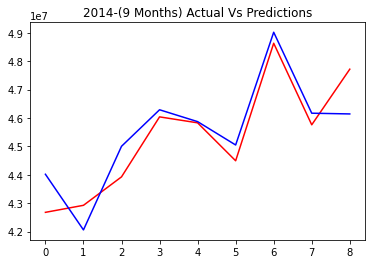

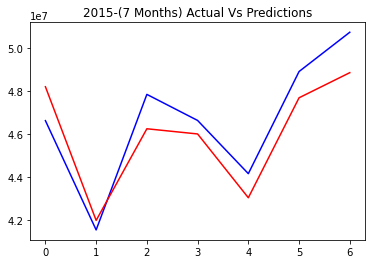

In [190]:
predict_2013_9_df=[item for sublist in predict_2013_9 for item in sublist]  
predict_2014_9_df=[item for sublist in predict_2014_9 for item in sublist]  
predict_2015_9_df=[item for sublist in predict_2015_9 for item in sublist]  
modeldata_9_y1['Predictions-Final9 Model']=predict_2013_9_df
modeldata_9_y2['Predictions-Final9 Model']=predict_2014_9_df
modeldata_9_y3['Predictions-Final9 Model']=predict_2015_9_df
modeldata_9_y1['Predictions-Final9 Model']=modeldata_9_y1['Predictions-Final9 Model'].astype(int)
modeldata_9_y2['Predictions-Final9 Model']=modeldata_9_y2['Predictions-Final9 Model'].astype(int)
modeldata_9_y3['Predictions-Final9 Model']=modeldata_9_y3['Predictions-Final9 Model'].astype(int)
modeldata_9_y1_mat_1=modeldata_9_y1[modeldata_9_y1['Store'].isin(model_final9_list)]
modeldata_9_y2_mat_1=modeldata_9_y2[modeldata_9_y2['Store'].isin(model_final9_list)]
modeldata_9_y3_mat_1=modeldata_9_y3[modeldata_9_y3['Store'].isin(model_final9_list)]

sale_9_y1_mat_1=pd.DataFrame(modeldata_9_y1_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_9_y1_mat_1=pd.DataFrame(modeldata_9_y1_mat_1.groupby('Month of Sale')['Predictions-Final9 Model'].sum()).reset_index()
sale_9_y2_mat_1=pd.DataFrame(modeldata_9_y2_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_9_y2_mat_1=pd.DataFrame(modeldata_9_y2_mat_1.groupby('Month of Sale')['Predictions-Final9 Model'].sum()).reset_index()
sale_9_y3_mat_1=pd.DataFrame(modeldata_9_y3_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_9_y3_mat_1=pd.DataFrame(modeldata_9_y3_mat_1.groupby('Month of Sale')['Predictions-Final9 Model'].sum()).reset_index()

plt.plot(sale_9_y1_mat_1['Sales'],color='Blue')
plt.plot(pred_9_y1_mat_1['Predictions-Final9 Model'],color='Red')
plt.title('2013-(9 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final9 Model(For 258 Stores)')


plt.plot(pred_9_y2_mat_1['Predictions-Final9 Model'],color='Red')
plt.plot(sale_9_y2_mat_1['Sales'],color='Blue')
plt.title('2014-(9 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final9 Model(For 258 Stores)')


plt.plot(sale_9_y3_mat_1['Sales'],color='Blue')
plt.plot(pred_9_y3_mat_1['Predictions-Final9 Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final9 Model(For 258 Stores)')


**Model for Customer walkins**

In [191]:
modeldata_9_cust_y1=nine_y1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_9_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_9_cust_y2=nine_y2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_9_cust_y2.columns=['Store','Month of Sale','Customers']
modeldata_9_cust_y3=nine_y3.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_9_cust_y3.columns=['Store','Month of Sale','Customers']


In [192]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_cust_9=[]
predict_2014_cust_9=[]
predict_2015_cust_9=[]

for s in store_list:
    store_cust_9_2013=nine_y1[nine_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_9_2013.columns=['Month of Sale','Customers']
    closed_days_9_2013=closed_days_9_y1[closed_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2013=promo_days_9_y1[promo_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2013=st_hol_a_9_y1[st_hol_a_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_9_2013=st_hol_b_9_y1[st_hol_b_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_9_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_9_2013=st_hol_c_9_y1[st_hol_c_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_9_2013=sch_hol_9_y1[sch_hol_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_9_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_9_2013=promo2days_9_y1[promo2days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_9_2013['Total No. of Closed Days']=closed_days_9_2013['No. of Closed Days']
    store_cust_9_2013['Total No. of Promo1 Days']=promo_days_9_2013['No. of Promo1 Days']
    store_cust_9_2013['Total No. of State Holidays-A']=state_hol_a_9_2013['No. of State Holidays-A']
    store_cust_9_2013['Total No. of State Holidays-B']=state_hol_b_9_2013['No. of State Holidays-B']
    store_cust_9_2013['Total No. of State Holidays-C']=state_hol_c_9_2013['No. of State Holidays-C']
    store_cust_9_2013['Total No. of School Holidays']=sch_hol_9_2013['No. of School Holidays']
    store_cust_9_2013['Total No. of Promo2 Days']=promo2_days_9_2013['No. of Promo2 Days']
    store_cust_9_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_9_2013['Total No. of Closed Days']=store_cust_9_2013['Total No. of Closed Days'].fillna(0)
    store_cust_9_2013['Total No. of Promo1 Days']=store_cust_9_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_9_2013['Total No. of State Holidays-A']=store_cust_9_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_9_2013['Total No. of State Holidays-B']=store_cust_9_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_9_2013['Total No. of State Holidays-C']=store_cust_9_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_9_2013['Total No. of School Holidays']=store_cust_9_2013['Total No. of School Holidays'].fillna(0)
    store_cust_9_2013['Total No. of Promo2 Days']=store_cust_9_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_9_2014=nine_y2[nine_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_9_2014.columns=['Month of Sale','Customers']
    closed_days_9_2014=closed_days_9_y2[closed_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2014=promo_days_9_y2[promo_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2014=st_hol_a_9_y2[st_hol_a_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_9_2014=st_hol_b_9_y2[st_hol_b_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_9_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_9_2014=st_hol_c_9_y2[st_hol_c_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_9_2014=sch_hol_9_y2[sch_hol_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_9_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_9_2014=promo2days_9_y2[promo2days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_9_2014['Total No. of Closed Days']=closed_days_9_2014['No. of Closed Days']
    store_cust_9_2014['Total No. of Promo1 Days']=promo_days_9_2014['No. of Promo1 Days']
    store_cust_9_2014['Total No. of State Holidays-A']=state_hol_a_9_2014['No. of State Holidays-A']
    store_cust_9_2014['Total No. of State Holidays-B']=state_hol_b_9_2014['No. of State Holidays-B']
    store_cust_9_2014['Total No. of State Holidays-C']=state_hol_c_9_2014['No. of State Holidays-C']
    store_cust_9_2014['Total No. of School Holidays']=sch_hol_9_2014['No. of School Holidays']
    store_cust_9_2014['Total No. of Promo2 Days']=promo2_days_9_2014['No. of Promo2 Days']
    store_cust_9_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_9_2014['Total No. of Closed Days']=store_cust_9_2014['Total No. of Closed Days'].fillna(0)
    store_cust_9_2014['Total No. of Promo1 Days']=store_cust_9_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_9_2014['Total No. of State Holidays-A']=store_cust_9_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_9_2014['Total No. of State Holidays-B']=store_cust_9_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_9_2014['Total No. of State Holidays-C']=store_cust_9_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_9_2014['Total No. of School Holidays']=store_cust_9_2014['Total No. of School Holidays'].fillna(0)
    store_cust_9_2014['Total No. of Promo2 Days']=store_cust_9_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_9_2013.columns[2:]
    dep_var_9_2013=store_cust_9_2013['Customers']
    ind_var1_9_2013=store_cust_9_2013[var_col_2013]
    ind_var2_9_2013=sm.add_constant(ind_var1_9_2013)
    var_col_2014=store_cust_9_2014.columns[2:]
    dep_var_9_2014=store_cust_9_2014['Customers']
    ind_var1_9_2014=store_cust_9_2014[var_col_2014]
    ind_var2_9_2014=sm.add_constant(ind_var1_9_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_9_2013.append([store_cust_9_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final9_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final9_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final9_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_10=pd.DataFrame(model_final9_cust.predict(ind_var2_9_2013))
    pred_cust_10.columns=['Pred']
    pred_cust_11=pd.DataFrame(model_final9_cust.predict(ind_var2_9_2014))
    pred_cust_11.columns=['Pred']
    pred_cust_12=pd.DataFrame(model_final9_cust.predict(ind_var2_2015))
    pred_cust_12.columns=['Pred']
    predict_2013_cust_9.append(pred_cust_10['Pred'].tolist())
    predict_2014_cust_9.append(pred_cust_11['Pred'].tolist())
    predict_2015_cust_9.append(pred_cust_12['Pred'].tolist())

pred_matrix_cust_9=pd.DataFrame(store_list)
pred_matrix_cust_9.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_9['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_9['Constant']=Const['Constant']
pred_matrix_cust_9['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_9['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_9['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_9['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_cust_9['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_9['School Holidays']=Sch['School Holidays']
pred_matrix_cust_9['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']>=0.50]['Store'].tolist()))

89
263


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

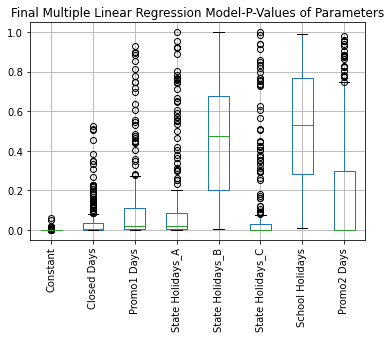

In [193]:
model_final9_cust_list=pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']>=0.50]['Store'].tolist()
model_final9_cust_df=pred_matrix_cust_9[pred_matrix_cust_9['Store'].isin(model_final9_cust_list)]
model_final9_cust_df.boxplot(column=model_final9_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [194]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_C=[]
Promo2=[]
adj_r=[]
predict_2013_cust_9=[]
predict_2014_cust_9=[]
predict_2015_cust_9=[]

for s in store_list:
    store_cust_9_2013=nine_y1[nine_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_9_2013.columns=['Month of Sale','Customers']
    closed_days_9_2013=closed_days_9_y1[closed_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2013=promo_days_9_y1[promo_days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2013=st_hol_a_9_y1[st_hol_a_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_9_2013=st_hol_c_9_y1[st_hol_c_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_9_2013=promo2days_9_y1[promo2days_9_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_9_2013['Total No. of Closed Days']=closed_days_9_2013['No. of Closed Days']
    store_cust_9_2013['Total No. of Promo1 Days']=promo_days_9_2013['No. of Promo1 Days']
    store_cust_9_2013['Total No. of State Holidays-A']=state_hol_a_9_2013['No. of State Holidays-A']
    store_cust_9_2013['Total No. of State Holidays-C']=state_hol_c_9_2013['No. of State Holidays-C']
    store_cust_9_2013['Total No. of Promo2 Days']=promo2_days_9_2013['No. of Promo2 Days']
    store_cust_9_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_9_2013['Total No. of Closed Days']=store_cust_9_2013['Total No. of Closed Days'].fillna(0)
    store_cust_9_2013['Total No. of Promo1 Days']=store_cust_9_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_9_2013['Total No. of State Holidays-A']=store_cust_9_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_9_2013['Total No. of State Holidays-C']=store_cust_9_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_9_2013['Total No. of Promo2 Days']=store_cust_9_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_9_2014=nine_y2[nine_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_9_2014.columns=['Month of Sale','Customers']
    closed_days_9_2014=closed_days_9_y2[closed_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_9_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_9_2014=promo_days_9_y2[promo_days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_9_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_9_2014=st_hol_a_9_y2[st_hol_a_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_9_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_9_2014=st_hol_c_9_y2[st_hol_c_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_9_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_9_2014=promo2days_9_y2[promo2days_9_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_9_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_9_2014['Total No. of Closed Days']=closed_days_9_2014['No. of Closed Days']
    store_cust_9_2014['Total No. of Promo1 Days']=promo_days_9_2014['No. of Promo1 Days']
    store_cust_9_2014['Total No. of State Holidays-A']=state_hol_a_9_2014['No. of State Holidays-A']
    store_cust_9_2014['Total No. of State Holidays-C']=state_hol_c_9_2014['No. of State Holidays-C']
    store_cust_9_2014['Total No. of Promo2 Days']=promo2_days_9_2014['No. of Promo2 Days']
    store_cust_9_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_9_2014['Total No. of Closed Days']=store_cust_9_2014['Total No. of Closed Days'].fillna(0)
    store_cust_9_2014['Total No. of Promo1 Days']=store_cust_9_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_9_2014['Total No. of State Holidays-A']=store_cust_9_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_9_2014['Total No. of State Holidays-C']=store_cust_9_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_9_2014['Total No. of Promo2 Days']=store_cust_9_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_9_2013.columns[2:]
    dep_var_9_2013=store_cust_9_2013['Customers']
    ind_var1_9_2013=store_cust_9_2013[var_col_2013]
    ind_var2_9_2013=sm.add_constant(ind_var1_9_2013)
    var_col_2014=store_cust_9_2014.columns[2:]
    dep_var_9_2014=store_cust_9_2014['Customers']
    ind_var1_9_2014=store_cust_9_2014[var_col_2014]
    ind_var2_9_2014=sm.add_constant(ind_var1_9_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_9_2013.append([store_cust_9_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final9_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final9_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final9_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_10=pd.DataFrame(model_final9_cust.predict(ind_var2_9_2013))
    pred_cust_10.columns=['Pred']
    pred_cust_11=pd.DataFrame(model_final9_cust.predict(ind_var2_9_2014))
    pred_cust_11.columns=['Pred']
    pred_cust_12=pd.DataFrame(model_final9_cust.predict(ind_var2_2015))
    pred_cust_12.columns=['Pred']
    predict_2013_cust_9.append(pred_cust_10['Pred'].tolist())
    predict_2014_cust_9.append(pred_cust_11['Pred'].tolist())
    predict_2015_cust_9.append(pred_cust_12['Pred'].tolist())

pred_matrix_cust_9=pd.DataFrame(store_list)
pred_matrix_cust_9.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust_9['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust_9['Constant']=Const['Constant']
pred_matrix_cust_9['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust_9['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust_9['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust_9['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust_9['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']>=0.50]['Store'].tolist()))

55
289


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

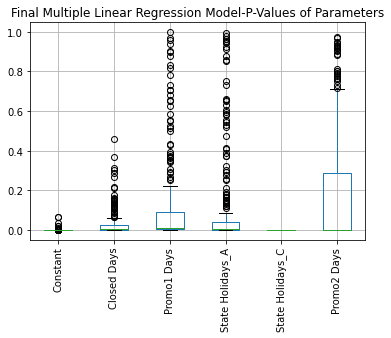

In [195]:
model_final9_cust_list=pred_matrix_cust_9[pred_matrix_cust_9['Adjusted R squared']>=0.50]['Store'].tolist()
model_final9_cust_df=pred_matrix_cust_9[pred_matrix_cust_9['Store'].isin(model_final9_cust_list)]
model_final9_cust_df.boxplot(column=model_final9_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')

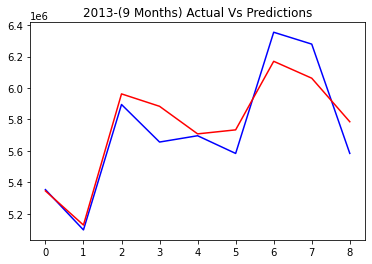

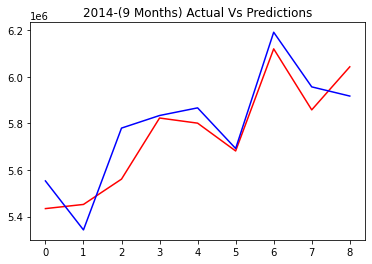

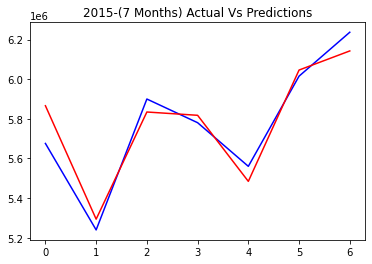

In [196]:
predict_2013_cust_9_df=[item for sublist in predict_2013_cust_9 for item in sublist]  
predict_2014_cust_9_df=[item for sublist in predict_2014_cust_9 for item in sublist]  
predict_2015_cust_9_df=[item for sublist in predict_2015_cust_9 for item in sublist]  
modeldata_9_cust_y1['Predictions-Final9 Cust Model']=predict_2013_cust_9_df
modeldata_9_cust_y2['Predictions-Final9 Cust Model']=predict_2014_cust_9_df
modeldata_9_cust_y3['Predictions-Final9 Cust Model']=predict_2015_cust_9_df
modeldata_9_cust_y1['Predictions-Final9 Cust Model']=modeldata_9_cust_y1['Predictions-Final9 Cust Model'].astype(int)
modeldata_9_cust_y2['Predictions-Final9 Cust Model']=modeldata_9_cust_y2['Predictions-Final9 Cust Model'].astype(int)
modeldata_9_cust_y3['Predictions-Final9 Cust Model']=modeldata_9_cust_y3['Predictions-Final9 Cust Model'].astype(int)
modeldata_9_cust_y1_mat_1=modeldata_9_cust_y1[modeldata_9_cust_y1['Store'].isin(model_final9_cust_list)]
modeldata_9_cust_y2_mat_1=modeldata_9_cust_y2[modeldata_9_cust_y2['Store'].isin(model_final9_cust_list)]
modeldata_9_cust_y3_mat_1=modeldata_9_cust_y3[modeldata_9_cust_y3['Store'].isin(model_final9_cust_list)]

sale_9_cust_y1_mat_1=pd.DataFrame(modeldata_9_cust_y1_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_9_cust_y1_mat_1=pd.DataFrame(modeldata_9_cust_y1_mat_1.groupby('Month of Sale')['Predictions-Final9 Cust Model'].sum()).reset_index()
sale_9_cust_y2_mat_1=pd.DataFrame(modeldata_9_cust_y2_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_9_cust_y2_mat_1=pd.DataFrame(modeldata_9_cust_y2_mat_1.groupby('Month of Sale')['Predictions-Final9 Cust Model'].sum()).reset_index()
sale_9_cust_y3_mat_1=pd.DataFrame(modeldata_9_cust_y3_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_9_cust_y3_mat_1=pd.DataFrame(modeldata_9_cust_y3_mat_1.groupby('Month of Sale')['Predictions-Final9 Cust Model'].sum()).reset_index()

plt.plot(sale_9_cust_y1_mat_1['Customers'],color='Blue')
plt.plot(pred_9_cust_y1_mat_1['Predictions-Final9 Cust Model'],color='Red')
plt.title('2013-(9 Months) Actual Vs Predictions')
plt.show('Actual 2013 Customer Walk-ins Vs Predictions-Final9 Model(For 289 Stores)')


plt.plot(pred_9_cust_y2_mat_1['Predictions-Final9 Cust Model'],color='Red')
plt.plot(sale_9_cust_y2_mat_1['Customers'],color='Blue')
plt.title('2014-(9 Months) Actual Vs Predictions')
plt.show('Actual 2014 Customer Walk-ins Vs Predictions-Final9 Model(For 289 Stores)')


plt.plot(sale_9_cust_y3_mat_1['Customers'],color='Blue')
plt.plot(pred_9_cust_y3_mat_1['Predictions-Final9 Cust Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Customer Walk-ins Vs Predictions-Final9 Model(For 289 Stores)')


**Predictive Model: 8 months Data from 2013 and 2014, 7 Months data from 2015**
<a id='MLR_8'></a>

**Model for Sales**

In [197]:
eight=[1,2,3,4,5,6,7,8]

In [198]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()
eight_y1=year1_data[year1_data['Month of Sale'].isin(eight)]
eight_y2=year2_data[year2_data['Month of Sale'].isin(eight)]
eight_y3=year3_data[year3_data['Month of Sale'].isin(eight)]
promo2days_8_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(eight)]
promo2days_8_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(eight)]
promo2days_8_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(eight)]
closed_days_8_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(eight)]
closed_days_8_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(eight)]
promo_days_8_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(eight)]
promo_days_8_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(eight)]
st_hol_a_8_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(eight)]
st_hol_a_8_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(eight)]
st_hol_b_8_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(eight)]
st_hol_b_8_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(eight)]
st_hol_c_8_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(eight)]
st_hol_c_8_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(eight)]
sch_hol_8_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(eight)]
sch_hol_8_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(eight)]
modeldata_8_y1=eight_y1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_8_y1.columns=['Store','Month of Sale','Sales']
modeldata_8_y2=eight_y2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_8_y2.columns=['Store','Month of Sale','Sales']
modeldata_8_y3=eight_y3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_8_y3.columns=['Store','Month of Sale','Sales']


In [199]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_8=[]
predict_2014_8=[]
predict_2015_8=[]

for s in store_list:
    store_sales_8_2013=eight_y1[eight_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_8_2013.columns=['Month of Sale','Sales']
    closed_days_8_2013=closed_days_8_y1[closed_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2013=promo_days_8_y1[promo_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2013=st_hol_a_8_y1[st_hol_a_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_8_2013=st_hol_b_8_y1[st_hol_b_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_8_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_8_2013=st_hol_c_8_y1[st_hol_c_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_8_2013=sch_hol_8_y1[sch_hol_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_8_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_8_2013=promo2days_8_y1[promo2days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_8_2013['Total No. of Closed Days']=closed_days_8_2013['No. of Closed Days']
    store_sales_8_2013['Total No. of Promo1 Days']=promo_days_8_2013['No. of Promo1 Days']
    store_sales_8_2013['Total No. of State Holidays-A']=state_hol_a_8_2013['No. of State Holidays-A']
    store_sales_8_2013['Total No. of State Holidays-B']=state_hol_b_8_2013['No. of State Holidays-B']
    store_sales_8_2013['Total No. of State Holidays-C']=state_hol_c_8_2013['No. of State Holidays-C']
    store_sales_8_2013['Total No. of School Holidays']=sch_hol_8_2013['No. of School Holidays']
    store_sales_8_2013['Total No. of Promo2 Days']=promo2_days_8_2013['No. of Promo2 Days']
    store_sales_8_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_8_2013['Total No. of Closed Days']=store_sales_8_2013['Total No. of Closed Days'].fillna(0)
    store_sales_8_2013['Total No. of Promo1 Days']=store_sales_8_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_8_2013['Total No. of State Holidays-A']=store_sales_8_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_8_2013['Total No. of State Holidays-B']=store_sales_8_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_8_2013['Total No. of State Holidays-C']=store_sales_8_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_8_2013['Total No. of School Holidays']=store_sales_8_2013['Total No. of School Holidays'].fillna(0)
    store_sales_8_2013['Total No. of Promo2 Days']=store_sales_8_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_8_2014=eight_y2[eight_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_8_2014.columns=['Month of Sale','Sales']
    closed_days_8_2014=closed_days_8_y2[closed_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2014=promo_days_8_y2[promo_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2014=st_hol_a_8_y2[st_hol_a_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_8_2014=st_hol_b_8_y2[st_hol_b_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_8_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_8_2014=st_hol_c_8_y2[st_hol_c_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_8_2014=sch_hol_8_y2[sch_hol_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_8_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_8_2014=promo2days_8_y2[promo2days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_8_2014['Total No. of Closed Days']=closed_days_8_2014['No. of Closed Days']
    store_sales_8_2014['Total No. of Promo1 Days']=promo_days_8_2014['No. of Promo1 Days']
    store_sales_8_2014['Total No. of State Holidays-A']=state_hol_a_8_2014['No. of State Holidays-A']
    store_sales_8_2014['Total No. of State Holidays-B']=state_hol_b_8_2014['No. of State Holidays-B']
    store_sales_8_2014['Total No. of State Holidays-C']=state_hol_c_8_2014['No. of State Holidays-C']
    store_sales_8_2014['Total No. of School Holidays']=sch_hol_8_2014['No. of School Holidays']
    store_sales_8_2014['Total No. of Promo2 Days']=promo2_days_8_2014['No. of Promo2 Days']
    store_sales_8_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_8_2014['Total No. of Closed Days']=store_sales_8_2014['Total No. of Closed Days'].fillna(0)
    store_sales_8_2014['Total No. of Promo1 Days']=store_sales_8_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_8_2014['Total No. of State Holidays-A']=store_sales_8_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_8_2014['Total No. of State Holidays-B']=store_sales_8_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_8_2014['Total No. of State Holidays-C']=store_sales_8_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_8_2014['Total No. of School Holidays']=store_sales_8_2014['Total No. of School Holidays'].fillna(0)
    store_sales_8_2014['Total No. of Promo2 Days']=store_sales_8_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_8_2013.columns[2:]
    dep_var_8_2013=store_sales_8_2013['Sales']
    ind_var1_8_2013=store_sales_8_2013[var_col_2013]
    ind_var2_8_2013=sm.add_constant(ind_var1_8_2013)
    var_col_2014=store_sales_8_2014.columns[2:]
    dep_var_8_2014=store_sales_8_2014['Sales']
    ind_var1_8_2014=store_sales_8_2014[var_col_2014]
    ind_var2_8_2014=sm.add_constant(ind_var1_8_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_8_2013.append([store_sales_8_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final8=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final8.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final8.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_29=pd.DataFrame(model_final8.predict(ind_var2_8_2013))
    pred_29.columns=['Pred']
    pred_30=pd.DataFrame(model_final8.predict(ind_var2_8_2014))
    pred_30.columns=['Pred']
    pred_31=pd.DataFrame(model_final8.predict(ind_var2_2015))
    pred_31.columns=['Pred']
    predict_2013_8.append(pred_29['Pred'].tolist())
    predict_2014_8.append(pred_30['Pred'].tolist())
    predict_2015_8.append(pred_31['Pred'].tolist())

pred_matrix_8=pd.DataFrame(store_list)
pred_matrix_8.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_8['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_8['Constant']=Const['Constant']
pred_matrix_8['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_8['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_8['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_8['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_8['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_8['School Holidays']=Sch['School Holidays']
pred_matrix_8['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_8[pred_matrix_8['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_8[pred_matrix_8['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

91
292


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

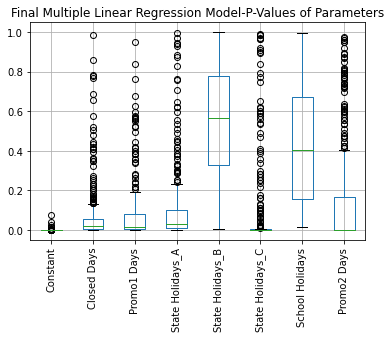

In [200]:
model_final8_list=pred_matrix_8[pred_matrix_8['Adjusted R squared']>=0.50]['Store'].tolist()
model_final8_df=pred_matrix_8[pred_matrix_8['Store'].isin(model_final8_list)]
model_final8_df.boxplot(column=model_final8_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [201]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_8=[]
predict_2014_8=[]
predict_2015_8=[]

for s in store_list:
    store_sales_8_2013=eight_y1[eight_y1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_8_2013.columns=['Month of Sale','Sales']
    closed_days_8_2013=closed_days_8_y1[closed_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2013=promo_days_8_y1[promo_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2013=st_hol_a_8_y1[st_hol_a_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_8_2013=st_hol_c_8_y1[st_hol_c_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_8_2013=promo2days_8_y1[promo2days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_8_2013['Total No. of Closed Days']=closed_days_8_2013['No. of Closed Days']
    store_sales_8_2013['Total No. of Promo1 Days']=promo_days_8_2013['No. of Promo1 Days']
    store_sales_8_2013['Total No. of State Holidays-A']=state_hol_a_8_2013['No. of State Holidays-A']
    store_sales_8_2013['Total No. of State Holidays-C']=state_hol_c_8_2013['No. of State Holidays-C']
    store_sales_8_2013['Total No. of Promo2 Days']=promo2_days_8_2013['No. of Promo2 Days']
    store_sales_8_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_8_2013['Total No. of Closed Days']=store_sales_8_2013['Total No. of Closed Days'].fillna(0)
    store_sales_8_2013['Total No. of Promo1 Days']=store_sales_8_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_8_2013['Total No. of State Holidays-A']=store_sales_8_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_8_2013['Total No. of State Holidays-C']=store_sales_8_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_8_2013['Total No. of Promo2 Days']=store_sales_8_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_8_2014=eight_y2[eight_y2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_8_2014.columns=['Month of Sale','Sales']
    closed_days_8_2014=closed_days_8_y2[closed_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2014=promo_days_8_y2[promo_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2014=st_hol_a_8_y2[st_hol_a_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_8_2014=st_hol_c_8_y2[st_hol_c_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_8_2014=promo2days_8_y2[promo2days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_8_2014['Total No. of Closed Days']=closed_days_8_2014['No. of Closed Days']
    store_sales_8_2014['Total No. of Promo1 Days']=promo_days_8_2014['No. of Promo1 Days']
    store_sales_8_2014['Total No. of State Holidays-A']=state_hol_a_8_2014['No. of State Holidays-A']
    store_sales_8_2014['Total No. of State Holidays-C']=state_hol_c_8_2014['No. of State Holidays-C']
    store_sales_8_2014['Total No. of Promo2 Days']=promo2_days_8_2014['No. of Promo2 Days']
    store_sales_8_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_8_2014['Total No. of Closed Days']=store_sales_8_2014['Total No. of Closed Days'].fillna(0)
    store_sales_8_2014['Total No. of Promo1 Days']=store_sales_8_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_8_2014['Total No. of State Holidays-A']=store_sales_8_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_8_2014['Total No. of State Holidays-C']=store_sales_8_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_8_2014['Total No. of Promo2 Days']=store_sales_8_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_8_2013.columns[2:]
    dep_var_8_2013=store_sales_8_2013['Sales']
    ind_var1_8_2013=store_sales_8_2013[var_col_2013]
    ind_var2_8_2013=sm.add_constant(ind_var1_8_2013)
    var_col_2014=store_sales_8_2014.columns[2:]
    dep_var_8_2014=store_sales_8_2014['Sales']
    ind_var1_8_2014=store_sales_8_2014[var_col_2014]
    ind_var2_8_2014=sm.add_constant(ind_var1_8_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_8_2013.append([store_sales_8_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final8=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final8.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final8.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_29=pd.DataFrame(model_final8.predict(ind_var2_8_2013))
    pred_29.columns=['Pred']
    pred_30=pd.DataFrame(model_final8.predict(ind_var2_8_2014))
    pred_30.columns=['Pred']
    pred_31=pd.DataFrame(model_final8.predict(ind_var2_2015))
    pred_31.columns=['Pred']
    predict_2013_8.append(pred_29['Pred'].tolist())
    predict_2014_8.append(pred_30['Pred'].tolist())
    predict_2015_8.append(pred_31['Pred'].tolist())

pred_matrix_8=pd.DataFrame(store_list)
pred_matrix_8.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_8['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_8['Constant']=Const['Constant']
pred_matrix_8['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_8['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_8['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_8['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_8['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_8[pred_matrix_8['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_8[pred_matrix_8['Adjusted R squared']>=0.50]['Store'].tolist()))

60
309


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

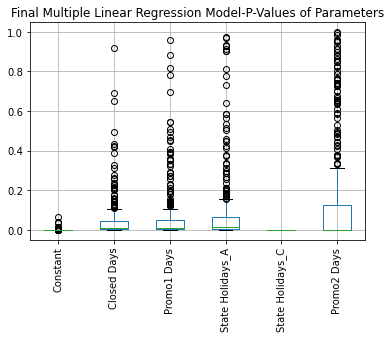

In [202]:
model_final8_list=pred_matrix_8[pred_matrix_8['Adjusted R squared']>=0.50]['Store'].tolist()
model_final8_df=pred_matrix_8[pred_matrix_8['Store'].isin(model_final8_list)]
model_final8_df.boxplot(column=model_final8_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


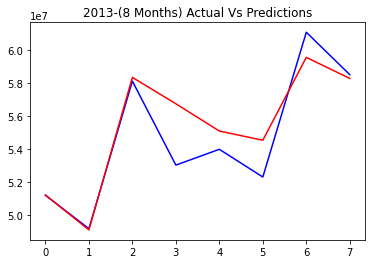

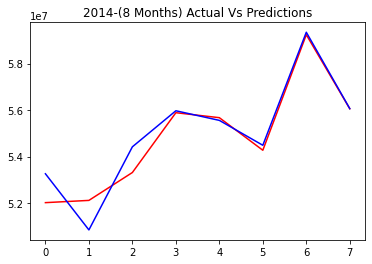

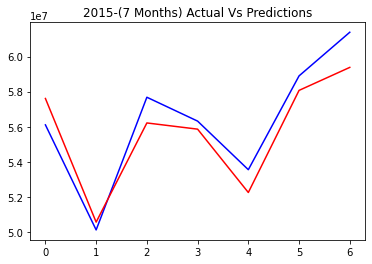

In [203]:
predict_2013_8_df=[item for sublist in predict_2013_8 for item in sublist]  
predict_2014_8_df=[item for sublist in predict_2014_8 for item in sublist]  
predict_2015_8_df=[item for sublist in predict_2015_8 for item in sublist]  
modeldata_8_y1['Predictions-Final8 Model']=predict_2013_8_df
modeldata_8_y2['Predictions-Final8 Model']=predict_2014_8_df
modeldata_8_y3['Predictions-Final8 Model']=predict_2015_8_df
modeldata_8_y1['Predictions-Final8 Model']=modeldata_8_y1['Predictions-Final8 Model'].astype(int)
modeldata_8_y2['Predictions-Final8 Model']=modeldata_8_y2['Predictions-Final8 Model'].astype(int)
modeldata_8_y3['Predictions-Final8 Model']=modeldata_8_y3['Predictions-Final8 Model'].astype(int)
modeldata_8_y1_mat_1=modeldata_8_y1[modeldata_8_y1['Store'].isin(model_final8_list)]
modeldata_8_y2_mat_1=modeldata_8_y2[modeldata_8_y2['Store'].isin(model_final8_list)]
modeldata_8_y3_mat_1=modeldata_8_y3[modeldata_8_y3['Store'].isin(model_final8_list)]

sale_8_y1_mat_1=pd.DataFrame(modeldata_8_y1_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_8_y1_mat_1=pd.DataFrame(modeldata_8_y1_mat_1.groupby('Month of Sale')['Predictions-Final8 Model'].sum()).reset_index()
sale_8_y2_mat_1=pd.DataFrame(modeldata_8_y2_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_8_y2_mat_1=pd.DataFrame(modeldata_8_y2_mat_1.groupby('Month of Sale')['Predictions-Final8 Model'].sum()).reset_index()
sale_8_y3_mat_1=pd.DataFrame(modeldata_8_y3_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_8_y3_mat_1=pd.DataFrame(modeldata_8_y3_mat_1.groupby('Month of Sale')['Predictions-Final8 Model'].sum()).reset_index()

plt.plot(sale_8_y1_mat_1['Sales'],color='Blue')
plt.plot(pred_8_y1_mat_1['Predictions-Final8 Model'],color='Red')
plt.title('2013-(8 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final8 Model(For 309 Stores)')


plt.plot(pred_8_y2_mat_1['Predictions-Final8 Model'],color='Red')
plt.plot(sale_8_y2_mat_1['Sales'],color='Blue')
plt.title('2014-(8 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final8 Model(For 309 Stores)')


plt.plot(sale_8_y3_mat_1['Sales'],color='Blue')
plt.plot(pred_8_y3_mat_1['Predictions-Final8 Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final8 Model(For 309 Stores)')








**Model for Customer walkins**

In [204]:
modeldata_8_cust_y1=eight_y1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_8_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_8_cust_y2=eight_y2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_8_cust_y2.columns=['Store','Month of Sale','Customers']
modeldata_8_cust_y3=eight_y3.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_8_cust_y3.columns=['Store','Month of Sale','Customers']


In [205]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_8_cust=[]
predict_2014_8_cust=[]
predict_2015_8_cust=[]

for s in store_list:
    store_cust_8_2013=eight_y1[eight_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_8_2013.columns=['Month of Sale','Customers']
    closed_days_8_2013=closed_days_8_y1[closed_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2013=promo_days_8_y1[promo_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2013=st_hol_a_8_y1[st_hol_a_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_8_2013=st_hol_b_8_y1[st_hol_b_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_8_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_8_2013=st_hol_c_8_y1[st_hol_c_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_8_2013=sch_hol_8_y1[sch_hol_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_8_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_8_2013=promo2days_8_y1[promo2days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_8_2013['Total No. of Closed Days']=closed_days_8_2013['No. of Closed Days']
    store_cust_8_2013['Total No. of Promo1 Days']=promo_days_8_2013['No. of Promo1 Days']
    store_cust_8_2013['Total No. of State Holidays-A']=state_hol_a_8_2013['No. of State Holidays-A']
    store_cust_8_2013['Total No. of State Holidays-B']=state_hol_b_8_2013['No. of State Holidays-B']
    store_cust_8_2013['Total No. of State Holidays-C']=state_hol_c_8_2013['No. of State Holidays-C']
    store_cust_8_2013['Total No. of School Holidays']=sch_hol_8_2013['No. of School Holidays']
    store_cust_8_2013['Total No. of Promo2 Days']=promo2_days_8_2013['No. of Promo2 Days']
    store_cust_8_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_8_2013['Total No. of Closed Days']=store_cust_8_2013['Total No. of Closed Days'].fillna(0)
    store_cust_8_2013['Total No. of Promo1 Days']=store_cust_8_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_8_2013['Total No. of State Holidays-A']=store_cust_8_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_8_2013['Total No. of State Holidays-B']=store_cust_8_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_8_2013['Total No. of State Holidays-C']=store_cust_8_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_8_2013['Total No. of School Holidays']=store_cust_8_2013['Total No. of School Holidays'].fillna(0)
    store_cust_8_2013['Total No. of Promo2 Days']=store_cust_8_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_8_2014=eight_y2[eight_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_8_2014.columns=['Month of Sale','Customers']
    closed_days_8_2014=closed_days_8_y2[closed_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2014=promo_days_8_y2[promo_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2014=st_hol_a_8_y2[st_hol_a_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_8_2014=st_hol_b_8_y2[st_hol_b_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_8_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_8_2014=st_hol_c_8_y2[st_hol_c_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_8_2014=sch_hol_8_y2[sch_hol_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_8_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_8_2014=promo2days_8_y2[promo2days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_8_2014['Total No. of Closed Days']=closed_days_8_2014['No. of Closed Days']
    store_cust_8_2014['Total No. of Promo1 Days']=promo_days_8_2014['No. of Promo1 Days']
    store_cust_8_2014['Total No. of State Holidays-A']=state_hol_a_8_2014['No. of State Holidays-A']
    store_cust_8_2014['Total No. of State Holidays-B']=state_hol_b_8_2014['No. of State Holidays-B']
    store_cust_8_2014['Total No. of State Holidays-C']=state_hol_c_8_2014['No. of State Holidays-C']
    store_cust_8_2014['Total No. of School Holidays']=sch_hol_8_2014['No. of School Holidays']
    store_cust_8_2014['Total No. of Promo2 Days']=promo2_days_8_2014['No. of Promo2 Days']
    store_cust_8_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_8_2014['Total No. of Closed Days']=store_cust_8_2014['Total No. of Closed Days'].fillna(0)
    store_cust_8_2014['Total No. of Promo1 Days']=store_cust_8_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_8_2014['Total No. of State Holidays-A']=store_cust_8_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_8_2014['Total No. of State Holidays-B']=store_cust_8_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_8_2014['Total No. of State Holidays-C']=store_cust_8_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_8_2014['Total No. of School Holidays']=store_cust_8_2014['Total No. of School Holidays'].fillna(0)
    store_cust_8_2014['Total No. of Promo2 Days']=store_cust_8_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_8_2013.columns[2:]
    dep_var_8_2013=store_cust_8_2013['Customers']
    ind_var1_8_2013=store_cust_8_2013[var_col_2013]
    ind_var2_8_2013=sm.add_constant(ind_var1_8_2013)
    var_col_2014=store_cust_8_2014.columns[2:]
    dep_var_8_2014=store_cust_8_2014['Customers']
    ind_var1_8_2014=store_cust_8_2014[var_col_2014]
    ind_var2_8_2014=sm.add_constant(ind_var1_8_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_8_2013.append([store_cust_8_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final8_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final8_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final8_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_13=pd.DataFrame(model_final8_cust.predict(ind_var2_8_2013))
    pred_cust_13.columns=['Pred']
    pred_cust_14=pd.DataFrame(model_final8_cust.predict(ind_var2_8_2014))
    pred_cust_14.columns=['Pred']
    pred_cust_15=pd.DataFrame(model_final8_cust.predict(ind_var2_2015))
    pred_cust_15.columns=['Pred']
    predict_2013_8_cust.append(pred_cust_13['Pred'].tolist())
    predict_2014_8_cust.append(pred_cust_14['Pred'].tolist())
    predict_2015_8_cust.append(pred_cust_15['Pred'].tolist())

pred_matrix_8_cust=pd.DataFrame(store_list)
pred_matrix_8_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_8_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_8_cust['Constant']=Const['Constant']
pred_matrix_8_cust['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_8_cust['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_8_cust['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_8_cust['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_8_cust['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_8_cust['School Holidays']=Sch['School Holidays']
pred_matrix_8_cust['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

104
271


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

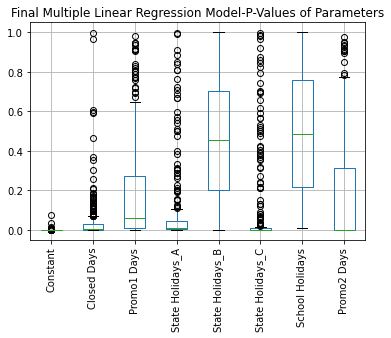

In [206]:
model_final11_cust_list=pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']>=0.50]['Store'].tolist()
model_final11_cust_df=pred_matrix_8_cust[pred_matrix_8_cust['Store'].isin(model_final11_cust_list)]
model_final11_cust_df.boxplot(column=model_final11_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [207]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_8_cust=[]
predict_2014_8_cust=[]
predict_2015_8_cust=[]

for s in store_list:
    store_cust_8_2013=eight_y1[eight_y1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_8_2013.columns=['Month of Sale','Customers']
    closed_days_8_2013=closed_days_8_y1[closed_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2013=promo_days_8_y1[promo_days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2013=st_hol_a_8_y1[st_hol_a_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_8_2013=st_hol_c_8_y1[st_hol_c_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_8_2013=promo2days_8_y1[promo2days_8_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_8_2013['Total No. of Closed Days']=closed_days_8_2013['No. of Closed Days']
    store_cust_8_2013['Total No. of Promo1 Days']=promo_days_8_2013['No. of Promo1 Days']
    store_cust_8_2013['Total No. of State Holidays-A']=state_hol_a_8_2013['No. of State Holidays-A']
    store_cust_8_2013['Total No. of State Holidays-C']=state_hol_c_8_2013['No. of State Holidays-C']
    store_cust_8_2013['Total No. of Promo2 Days']=promo2_days_8_2013['No. of Promo2 Days']
    store_cust_8_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_8_2013['Total No. of Closed Days']=store_cust_8_2013['Total No. of Closed Days'].fillna(0)
    store_cust_8_2013['Total No. of Promo1 Days']=store_cust_8_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_8_2013['Total No. of State Holidays-A']=store_cust_8_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_8_2013['Total No. of State Holidays-C']=store_cust_8_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_8_2013['Total No. of Promo2 Days']=store_cust_8_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_8_2014=eight_y2[eight_y2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_8_2014.columns=['Month of Sale','Customers']
    closed_days_8_2014=closed_days_8_y2[closed_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_8_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_8_2014=promo_days_8_y2[promo_days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_8_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_8_2014=st_hol_a_8_y2[st_hol_a_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_8_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_8_2014=st_hol_c_8_y2[st_hol_c_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_8_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_8_2014=promo2days_8_y2[promo2days_8_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_8_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_8_2014['Total No. of Closed Days']=closed_days_8_2014['No. of Closed Days']
    store_cust_8_2014['Total No. of Promo1 Days']=promo_days_8_2014['No. of Promo1 Days']
    store_cust_8_2014['Total No. of State Holidays-A']=state_hol_a_8_2014['No. of State Holidays-A']
    store_cust_8_2014['Total No. of State Holidays-C']=state_hol_c_8_2014['No. of State Holidays-C']
    store_cust_8_2014['Total No. of Promo2 Days']=promo2_days_8_2014['No. of Promo2 Days']
    store_cust_8_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_8_2014['Total No. of Closed Days']=store_cust_8_2014['Total No. of Closed Days'].fillna(0)
    store_cust_8_2014['Total No. of Promo1 Days']=store_cust_8_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_8_2014['Total No. of State Holidays-A']=store_cust_8_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_8_2014['Total No. of State Holidays-C']=store_cust_8_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_8_2014['Total No. of Promo2 Days']=store_cust_8_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_8_2013.columns[2:]
    dep_var_8_2013=store_cust_8_2013['Customers']
    ind_var1_8_2013=store_cust_8_2013[var_col_2013]
    ind_var2_8_2013=sm.add_constant(ind_var1_8_2013)
    var_col_2014=store_cust_8_2014.columns[2:]
    dep_var_8_2014=store_cust_8_2014['Customers']
    ind_var1_8_2014=store_cust_8_2014[var_col_2014]
    ind_var2_8_2014=sm.add_constant(ind_var1_8_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_8_2013.append([store_cust_8_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final8_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final8_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final8_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_13=pd.DataFrame(model_final8_cust.predict(ind_var2_8_2013))
    pred_cust_13.columns=['Pred']
    pred_cust_14=pd.DataFrame(model_final8_cust.predict(ind_var2_8_2014))
    pred_cust_14.columns=['Pred']
    pred_cust_15=pd.DataFrame(model_final8_cust.predict(ind_var2_2015))
    pred_cust_15.columns=['Pred']
    predict_2013_8_cust.append(pred_cust_13['Pred'].tolist())
    predict_2014_8_cust.append(pred_cust_14['Pred'].tolist())
    predict_2015_8_cust.append(pred_cust_15['Pred'].tolist())

pred_matrix_8_cust=pd.DataFrame(store_list)
pred_matrix_8_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_8_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_8_cust['Constant']=Const['Constant']
pred_matrix_8_cust['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_8_cust['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_8_cust['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_8_cust['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_8_cust['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']>=0.50]['Store'].tolist()))


67
306


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

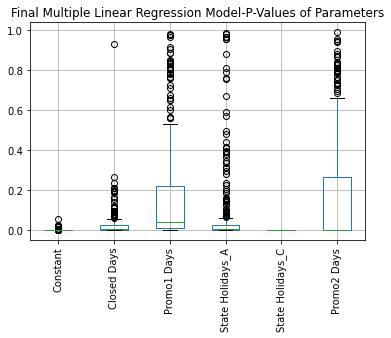

In [208]:
model_final8_cust_list=pred_matrix_8_cust[pred_matrix_8_cust['Adjusted R squared']>=0.50]['Store'].tolist()
model_final8_cust_df=pred_matrix_8_cust[pred_matrix_8_cust['Store'].isin(model_final8_cust_list)]
model_final8_cust_df.boxplot(column=model_final8_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


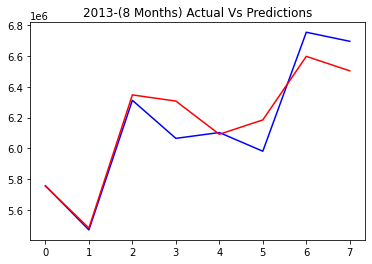

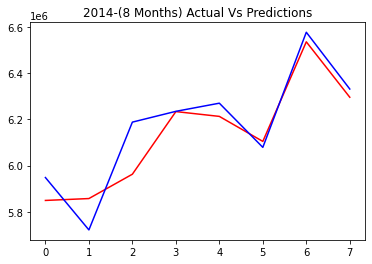

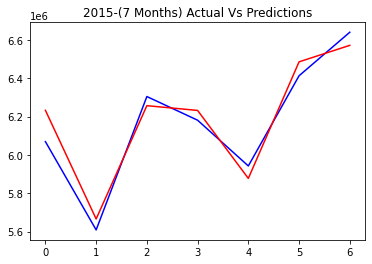

In [209]:
predict_2013_8_cust_df=[item for sublist in predict_2013_8_cust for item in sublist]  
predict_2014_8_cust_df=[item for sublist in predict_2014_8_cust for item in sublist]  
predict_2015_8_cust_df=[item for sublist in predict_2015_8_cust for item in sublist]  
modeldata_8_cust_y1['Predictions-Final8 Cust Model']=predict_2013_8_cust_df
modeldata_8_cust_y2['Predictions-Final8 Cust Model']=predict_2014_8_cust_df
modeldata_8_cust_y3['Predictions-Final8 Cust Model']=predict_2015_8_cust_df
modeldata_8_cust_y1['Predictions-Final8 Cust Model']=modeldata_8_cust_y1['Predictions-Final8 Cust Model'].astype(int)
modeldata_8_cust_y2['Predictions-Final8 Cust Model']=modeldata_8_cust_y2['Predictions-Final8 Cust Model'].astype(int)
modeldata_8_cust_y3['Predictions-Final8 Cust Model']=modeldata_8_cust_y3['Predictions-Final8 Cust Model'].astype(int)
modeldata_8_cust_y1_mat_1=modeldata_8_cust_y1[modeldata_8_cust_y1['Store'].isin(model_final8_cust_list)]
modeldata_8_cust_y2_mat_1=modeldata_8_cust_y2[modeldata_8_cust_y2['Store'].isin(model_final8_cust_list)]
modeldata_8_cust_y3_mat_1=modeldata_8_cust_y3[modeldata_8_cust_y3['Store'].isin(model_final8_cust_list)]

sale_8_cust_y1_mat_1=pd.DataFrame(modeldata_8_cust_y1_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_8_cust_y1_mat_1=pd.DataFrame(modeldata_8_cust_y1_mat_1.groupby('Month of Sale')['Predictions-Final8 Cust Model'].sum()).reset_index()
sale_8_cust_y2_mat_1=pd.DataFrame(modeldata_8_cust_y2_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_8_cust_y2_mat_1=pd.DataFrame(modeldata_8_cust_y2_mat_1.groupby('Month of Sale')['Predictions-Final8 Cust Model'].sum()).reset_index()
sale_8_cust_y3_mat_1=pd.DataFrame(modeldata_8_cust_y3_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_8_cust_y3_mat_1=pd.DataFrame(modeldata_8_cust_y3_mat_1.groupby('Month of Sale')['Predictions-Final8 Cust Model'].sum()).reset_index()

plt.plot(sale_8_cust_y1_mat_1['Customers'],color='Blue')
plt.plot(pred_8_cust_y1_mat_1['Predictions-Final8 Cust Model'],color='Red')
plt.title('2013-(8 Months) Actual Vs Predictions')
plt.show('Actual 2013 Customer walk-ins Vs Predictions-Final8 Model(For 306 Stores)')


plt.plot(pred_8_cust_y2_mat_1['Predictions-Final8 Cust Model'],color='Red')
plt.plot(sale_8_cust_y2_mat_1['Customers'],color='Blue')
plt.title('2014-(8 Months) Actual Vs Predictions')
plt.show('Actual 2014 Customer walk-ins Vs Predictions-Final8 Model(For 306 Stores)')


plt.plot(sale_8_cust_y3_mat_1['Customers'],color='Blue')
plt.plot(pred_8_cust_y3_mat_1['Predictions-Final8 Cust Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Customer walk-ins Vs Predictions-Final8 Model(For 306 Stores)')


**Predictive Model: 7 months Data from 2013 ,2014 and 2015**
<a id='MLR_7'></a>

**Model for Sales**

In [210]:
store_list=main_data.drop_duplicates(subset=['Store'])['Store'].tolist()

In [211]:
complete_month=[1,2,3,4,5,6,7]

In [212]:
seven_year1=year1_data[year1_data['Month of Sale'].isin(complete_month)]
seven_year2=year2_data[year2_data['Month of Sale'].isin(complete_month)]
seven_year3=year3_data[year3_data['Month of Sale'].isin(complete_month)]


In [213]:
promo2days_7_y1=promo2days_y1[promo2days_y1['Month of Sale'].isin(complete_month)]
promo2days_7_y2=promo2days_y2[promo2days_y2['Month of Sale'].isin(complete_month)]
promo2days_7_y3=promo2days_y3[promo2days_y3['Month of Sale'].isin(complete_month)]
closed_days_7_y1=closed_days_y1[closed_days_y1['Month of Sale'].isin(complete_month)]
closed_days_7_y2=closed_days_y2[closed_days_y2['Month of Sale'].isin(complete_month)]
promo_days_7_y1=promo_days_y1[promo_days_y1['Month of Sale'].isin(complete_month)]
promo_days_7_y2=promo_days_y2[promo_days_y2['Month of Sale'].isin(complete_month)]
st_hol_a_7_y1=st_hol_a_y1[st_hol_a_y1['Month of Sale'].isin(complete_month)]
st_hol_a_7_y2=st_hol_a_y2[st_hol_a_y2['Month of Sale'].isin(complete_month)]
st_hol_b_7_y1=st_hol_b_y1[st_hol_b_y1['Month of Sale'].isin(complete_month)]
st_hol_b_7_y2=st_hol_b_y2[st_hol_b_y2['Month of Sale'].isin(complete_month)]
st_hol_c_7_y1=st_hol_c_y1[st_hol_c_y1['Month of Sale'].isin(complete_month)]
st_hol_c_7_y2=st_hol_c_y2[st_hol_c_y2['Month of Sale'].isin(complete_month)]
sch_hol_7_y1=sch_hol_y1[sch_hol_y1['Month of Sale'].isin(complete_month)]
sch_hol_7_y2=sch_hol_y2[sch_hol_y2['Month of Sale'].isin(complete_month)]


modeldata_7_y1=seven_year1.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_7_y1.columns=['Store','Month of Sale','Sales']
modeldata_7_y2=seven_year2.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_7_y2.columns=['Store','Month of Sale','Sales']
modeldata_7_y3=seven_year3.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modeldata_7_y3.columns=['Store','Month of Sale','Sales']







In [214]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_final=[]
predict_2014_final=[]
predict_2015_final=[]

for s in store_list:
    store_sales_7_2013=seven_year1[seven_year1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_7_2013.columns=['Month of Sale','Sales']
    closed_days_7_2013=closed_days_7_y1[closed_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2013=promo_days_7_y1[promo_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2013=st_hol_a_7_y1[st_hol_a_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_7_2013=st_hol_b_7_y1[st_hol_b_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_7_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_7_2013=st_hol_c_7_y1[st_hol_c_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_7_2013=sch_hol_7_y1[sch_hol_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_7_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_7_2013=promo2days_7_y1[promo2days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_7_2013['Total No. of Closed Days']=closed_days_7_2013['No. of Closed Days']
    store_sales_7_2013['Total No. of Promo1 Days']=promo_days_7_2013['No. of Promo1 Days']
    store_sales_7_2013['Total No. of State Holidays-A']=state_hol_a_7_2013['No. of State Holidays-A']
    store_sales_7_2013['Total No. of State Holidays-B']=state_hol_b_7_2013['No. of State Holidays-B']
    store_sales_7_2013['Total No. of State Holidays-C']=state_hol_c_7_2013['No. of State Holidays-C']
    store_sales_7_2013['Total No. of School Holidays']=sch_hol_7_2013['No. of School Holidays']
    store_sales_7_2013['Total No. of Promo2 Days']=promo2_days_7_2013['No. of Promo2 Days']
    store_sales_7_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_7_2013['Total No. of Closed Days']=store_sales_7_2013['Total No. of Closed Days'].fillna(0)
    store_sales_7_2013['Total No. of Promo1 Days']=store_sales_7_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_7_2013['Total No. of State Holidays-A']=store_sales_7_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_7_2013['Total No. of State Holidays-B']=store_sales_7_2013['Total No. of State Holidays-B'].fillna(0)
    store_sales_7_2013['Total No. of State Holidays-C']=store_sales_7_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_7_2013['Total No. of School Holidays']=store_sales_7_2013['Total No. of School Holidays'].fillna(0)
    store_sales_7_2013['Total No. of Promo2 Days']=store_sales_7_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_7_2014=seven_year2[seven_year2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_7_2014.columns=['Month of Sale','Sales']
    closed_days_7_2014=closed_days_7_y2[closed_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2014=promo_days_7_y2[promo_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2014=st_hol_a_7_y2[st_hol_a_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_7_2014=st_hol_b_7_y2[st_hol_b_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_7_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_7_2014=st_hol_c_7_y2[st_hol_c_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_7_2014=sch_hol_7_y2[sch_hol_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_7_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_7_2014=promo2days_7_y2[promo2days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_7_2014['Total No. of Closed Days']=closed_days_7_2014['No. of Closed Days']
    store_sales_7_2014['Total No. of Promo1 Days']=promo_days_7_2014['No. of Promo1 Days']
    store_sales_7_2014['Total No. of State Holidays-A']=state_hol_a_7_2014['No. of State Holidays-A']
    store_sales_7_2014['Total No. of State Holidays-B']=state_hol_b_7_2014['No. of State Holidays-B']
    store_sales_7_2014['Total No. of State Holidays-C']=state_hol_c_7_2014['No. of State Holidays-C']
    store_sales_7_2014['Total No. of School Holidays']=sch_hol_7_2014['No. of School Holidays']
    store_sales_7_2014['Total No. of Promo2 Days']=promo2_days_7_2014['No. of Promo2 Days']
    store_sales_7_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_7_2014['Total No. of Closed Days']=store_sales_7_2014['Total No. of Closed Days'].fillna(0)
    store_sales_7_2014['Total No. of Promo1 Days']=store_sales_7_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_7_2014['Total No. of State Holidays-A']=store_sales_7_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_7_2014['Total No. of State Holidays-B']=store_sales_7_2014['Total No. of State Holidays-B'].fillna(0)
    store_sales_7_2014['Total No. of State Holidays-C']=store_sales_7_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_7_2014['Total No. of School Holidays']=store_sales_7_2014['Total No. of School Holidays'].fillna(0)
    store_sales_7_2014['Total No. of Promo2 Days']=store_sales_7_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-B']=store_sales_2015['Total No. of State Holidays-B'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of School Holidays']=store_sales_2015['Total No. of School Holidays'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_7_2013.columns[2:]
    dep_var_7_2013=store_sales_7_2013['Sales']
    ind_var1_7_2013=store_sales_7_2013[var_col_2013]
    ind_var2_7_2013=sm.add_constant(ind_var1_7_2013)
    var_col_2014=store_sales_7_2014.columns[2:]
    dep_var_7_2014=store_sales_7_2014['Sales']
    ind_var1_7_2014=store_sales_7_2014[var_col_2014]
    ind_var2_7_2014=sm.add_constant(ind_var1_7_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_7_2013.append([store_sales_7_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_20=pd.DataFrame(model_final.predict(ind_var2_7_2013))
    pred_20.columns=['Pred']
    pred_21=pd.DataFrame(model_final.predict(ind_var2_7_2014))
    pred_21.columns=['Pred']
    pred_22=pd.DataFrame(model_final.predict(ind_var2_2015))
    pred_22.columns=['Pred']
    predict_2013_final.append(pred_20['Pred'].tolist())
    predict_2014_final.append(pred_21['Pred'].tolist())
    predict_2015_final.append(pred_22['Pred'].tolist())

pred_matrix=pd.DataFrame(store_list)
pred_matrix.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix['Constant']=Const['Constant']
pred_matrix['Closed Days']=Closed_Days['Closed Days']    
pred_matrix['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix['State Holidays_A']=State_A['State Holidays_A']
pred_matrix['State Holidays_B']=State_B['State Holidays_B']
pred_matrix['State Holidays_C']=State_C['State Holidays_C']
pred_matrix['School Holidays']=Sch['School Holidays']
pred_matrix['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix[pred_matrix['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix[pred_matrix['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

98
335


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

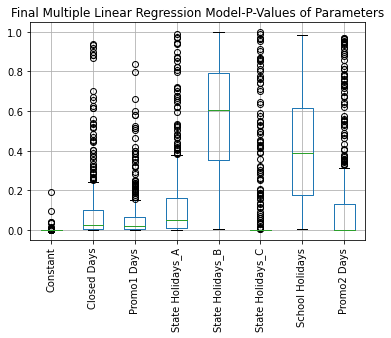

In [215]:
model_final_list=pred_matrix[pred_matrix['Adjusted R squared']>=0.50]['Store'].tolist()
model_final_df=pred_matrix[pred_matrix['Store'].isin(model_final_list)]
model_final_df.boxplot(column=model_final_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [216]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_C=[]
Promo2=[]
adj_r=[]
predict_2013_final1=[]
predict_2014_final1=[]
predict_2015_final1=[]

for s in store_list:
    store_sales_7_2013=seven_year1[seven_year1['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_7_2013.columns=['Month of Sale','Sales']
    closed_days_7_2013=closed_days_7_y1[closed_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2013=promo_days_7_y1[promo_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2013=st_hol_a_7_y1[st_hol_a_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_7_2013=st_hol_c_7_y1[st_hol_c_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_7_2013=promo2days_7_y1[promo2days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_7_2013['Total No. of Closed Days']=closed_days_7_2013['No. of Closed Days']
    store_sales_7_2013['Total No. of Promo1 Days']=promo_days_7_2013['No. of Promo1 Days']
    store_sales_7_2013['Total No. of State Holidays-A']=state_hol_a_7_2013['No. of State Holidays-A']
    store_sales_7_2013['Total No. of State Holidays-C']=state_hol_c_7_2013['No. of State Holidays-C']
    store_sales_7_2013['Total No. of Promo2 Days']=promo2_days_7_2013['No. of Promo2 Days']
    store_sales_7_2013.replace([np.inf, -np.inf], np.nan)
    store_sales_7_2013['Total No. of Closed Days']=store_sales_7_2013['Total No. of Closed Days'].fillna(0)
    store_sales_7_2013['Total No. of Promo1 Days']=store_sales_7_2013['Total No. of Promo1 Days'].fillna(0)
    store_sales_7_2013['Total No. of State Holidays-A']=store_sales_7_2013['Total No. of State Holidays-A'].fillna(0)
    store_sales_7_2013['Total No. of State Holidays-C']=store_sales_7_2013['Total No. of State Holidays-C'].fillna(0)
    store_sales_7_2013['Total No. of Promo2 Days']=store_sales_7_2013['Total No. of Promo2 Days'].fillna(0)
    store_sales_7_2014=seven_year2[seven_year2['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_7_2014.columns=['Month of Sale','Sales']
    closed_days_7_2014=closed_days_7_y2[closed_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2014=promo_days_7_y2[promo_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2014=st_hol_a_7_y2[st_hol_a_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_7_2014=st_hol_c_7_y2[st_hol_c_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_7_2014=promo2days_7_y2[promo2days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_7_2014['Total No. of Closed Days']=closed_days_7_2014['No. of Closed Days']
    store_sales_7_2014['Total No. of Promo1 Days']=promo_days_7_2014['No. of Promo1 Days']
    store_sales_7_2014['Total No. of State Holidays-A']=state_hol_a_7_2014['No. of State Holidays-A']
    store_sales_7_2014['Total No. of State Holidays-C']=state_hol_c_7_2014['No. of State Holidays-C']
    store_sales_7_2014['Total No. of Promo2 Days']=promo2_days_7_2014['No. of Promo2 Days']
    store_sales_7_2014.replace([np.inf, -np.inf], np.nan)
    store_sales_7_2014['Total No. of Closed Days']=store_sales_7_2014['Total No. of Closed Days'].fillna(0)
    store_sales_7_2014['Total No. of Promo1 Days']=store_sales_7_2014['Total No. of Promo1 Days'].fillna(0)
    store_sales_7_2014['Total No. of State Holidays-A']=store_sales_7_2014['Total No. of State Holidays-A'].fillna(0)
    store_sales_7_2014['Total No. of State Holidays-C']=store_sales_7_2014['Total No. of State Holidays-C'].fillna(0)
    store_sales_7_2014['Total No. of Promo2 Days']=store_sales_7_2014['Total No. of Promo2 Days'].fillna(0)
    store_sales_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_sales_2015.columns=['Month of Sale','Sales']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_sales_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_sales_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_sales_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_sales_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_sales_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_sales_2015.replace([np.inf, -np.inf], np.nan)
    store_sales_2015['Total No. of Closed Days']=store_sales_2015['Total No. of Closed Days'].fillna(0)
    store_sales_2015['Total No. of Promo1 Days']=store_sales_2015['Total No. of Promo1 Days'].fillna(0)
    store_sales_2015['Total No. of State Holidays-A']=store_sales_2015['Total No. of State Holidays-A'].fillna(0)
    store_sales_2015['Total No. of State Holidays-C']=store_sales_2015['Total No. of State Holidays-C'].fillna(0)
    store_sales_2015['Total No. of Promo2 Days']=store_sales_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_sales_7_2013.columns[2:]
    dep_var_7_2013=store_sales_7_2013['Sales']
    ind_var1_7_2013=store_sales_7_2013[var_col_2013]
    ind_var2_7_2013=sm.add_constant(ind_var1_7_2013)
    var_col_2014=store_sales_7_2014.columns[2:]
    dep_var_7_2014=store_sales_7_2014['Sales']
    ind_var1_7_2014=store_sales_7_2014[var_col_2014]
    ind_var2_7_2014=sm.add_constant(ind_var1_7_2014)  
    var_col_2015=store_sales_2015.columns[2:]
    dep_var_2015=store_sales_2015['Sales']
    ind_var1_2015=store_sales_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_sales_7_2013.append([store_sales_7_2014,store_sales_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Sales']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_23=pd.DataFrame(model_final.predict(ind_var2_7_2013))
    pred_23.columns=['Pred']
    pred_24=pd.DataFrame(model_final.predict(ind_var2_7_2014))
    pred_24.columns=['Pred']
    pred_25=pd.DataFrame(model_final.predict(ind_var2_2015))
    pred_25.columns=['Pred']
    predict_2013_final1.append(pred_23['Pred'].tolist())
    predict_2014_final1.append(pred_24['Pred'].tolist())
    predict_2015_final1.append(pred_25['Pred'].tolist())

pred1_matrix=pd.DataFrame(store_list)
pred1_matrix.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred1_matrix['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred1_matrix['Constant']=Const['Constant']
pred1_matrix['Closed Days']=Closed_Days['Closed Days']    
pred1_matrix['Promo1 Days']=Promo1_Days['Promo1_Days']
pred1_matrix['State Holidays_A']=State_A['State Holidays_A']
pred1_matrix['State Holidays_C']=State_C['State Holidays_C']
pred1_matrix['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred1_matrix[pred1_matrix['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred1_matrix[pred1_matrix['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

61
350


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

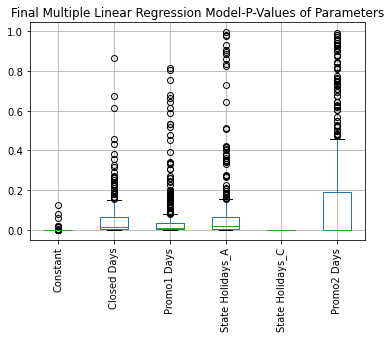

In [217]:
model_final1_list=pred1_matrix[pred1_matrix['Adjusted R squared']>=0.50]['Store'].tolist()
model_final1_df=pred1_matrix[pred1_matrix['Store'].isin(model_final1_list)]
model_final1_df.boxplot(column=model_final1_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


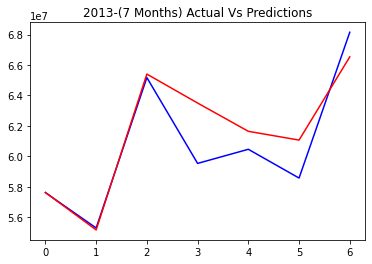

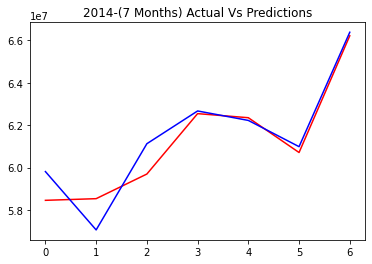

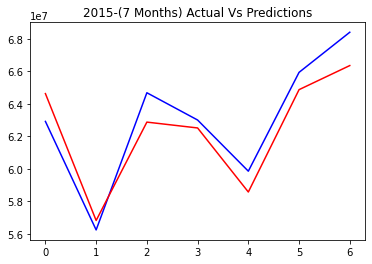

In [218]:
predict_2013_final1_df=[item for sublist in predict_2013_final1 for item in sublist]  
predict_2014_final1_df=[item for sublist in predict_2014_final1 for item in sublist]  
predict_2015_final1_df=[item for sublist in predict_2015_final1 for item in sublist]  
modeldata_7_y1['Predictions-Final1 Model']=predict_2013_final1_df
modeldata_7_y2['Predictions-Final1 Model']=predict_2014_final1_df
modeldata_7_y3['Predictions-Final1 Model']=predict_2015_final1_df
modeldata_7_y1['Predictions-Final1 Model']=modeldata_7_y1['Predictions-Final1 Model'].astype(int)
modeldata_7_y2['Predictions-Final1 Model']=modeldata_7_y2['Predictions-Final1 Model'].astype(int)
modeldata_7_y3['Predictions-Final1 Model']=modeldata_7_y3['Predictions-Final1 Model'].astype(int)
modeldata_7_y1_mat_1=modeldata_7_y1[modeldata_7_y1['Store'].isin(model_final1_list)]
modeldata_7_y2_mat_1=modeldata_7_y2[modeldata_7_y2['Store'].isin(model_final1_list)]
modeldata_7_y3_mat_1=modeldata_7_y3[modeldata_7_y3['Store'].isin(model_final1_list)]

sale_7_y1_mat_1=pd.DataFrame(modeldata_7_y1_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_7_y1_mat_1=pd.DataFrame(modeldata_7_y1_mat_1.groupby('Month of Sale')['Predictions-Final1 Model'].sum()).reset_index()
sale_7_y2_mat_1=pd.DataFrame(modeldata_7_y2_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_7_y2_mat_1=pd.DataFrame(modeldata_7_y2_mat_1.groupby('Month of Sale')['Predictions-Final1 Model'].sum()).reset_index()
sale_7_y3_mat_1=pd.DataFrame(modeldata_7_y3_mat_1.groupby('Month of Sale')['Sales'].sum()).reset_index()
pred_7_y3_mat_1=pd.DataFrame(modeldata_7_y3_mat_1.groupby('Month of Sale')['Predictions-Final1 Model'].sum()).reset_index()

plt.plot(sale_7_y1_mat_1['Sales'],color='Blue')
plt.plot(pred_7_y1_mat_1['Predictions-Final1 Model'],color='Red')
plt.title('2013-(7 Months) Actual Vs Predictions')
plt.show('Actual 2013 Sales Vs Predictions-Final1 Model(For 350 Stores)')


plt.plot(pred_7_y2_mat_1['Predictions-Final1 Model'],color='Red')
plt.plot(sale_7_y2_mat_1['Sales'],color='Blue')
plt.title('2014-(7 Months) Actual Vs Predictions')
plt.show('Actual 2014 Sales Vs Predictions-Final1 Model(For 350 Stores)')


plt.plot(sale_7_y3_mat_1['Sales'],color='Blue')
plt.plot(pred_7_y3_mat_1['Predictions-Final1 Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Sales Vs Predictions-Final1 Model(For 350 Stores)')


**Model for Customer walkins**

In [219]:
modeldata_7_cust_y1=seven_year1.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_7_cust_y1.columns=['Store','Month of Sale','Customers']
modeldata_7_cust_y2=seven_year2.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_7_cust_y2.columns=['Store','Month of Sale','Customers']
modeldata_7_cust_y3=seven_year3.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modeldata_7_cust_y3.columns=['Store','Month of Sale','Customers']


In [220]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_B=[]
State_C=[]
Sch=[]
Promo2=[]
adj_r=[]
predict_2013_final_cust=[]
predict_2014_final_cust=[]
predict_2015_final_cust=[]

for s in store_list:
    store_cust_7_2013=seven_year1[seven_year1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_7_2013.columns=['Month of Sale','Customers']
    closed_days_7_2013=closed_days_7_y1[closed_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2013=promo_days_7_y1[promo_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2013=st_hol_a_7_y1[st_hol_a_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_7_2013=st_hol_b_7_y1[st_hol_b_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_7_2013.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_7_2013=st_hol_c_7_y1[st_hol_c_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2013.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_7_2013=sch_hol_7_y1[sch_hol_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_7_2013.columns=['Month of Sale','No. of School Holidays']
    promo2_days_7_2013=promo2days_7_y1[promo2days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_7_2013['Total No. of Closed Days']=closed_days_7_2013['No. of Closed Days']
    store_cust_7_2013['Total No. of Promo1 Days']=promo_days_7_2013['No. of Promo1 Days']
    store_cust_7_2013['Total No. of State Holidays-A']=state_hol_a_7_2013['No. of State Holidays-A']
    store_cust_7_2013['Total No. of State Holidays-B']=state_hol_b_7_2013['No. of State Holidays-B']
    store_cust_7_2013['Total No. of State Holidays-C']=state_hol_c_7_2013['No. of State Holidays-C']
    store_cust_7_2013['Total No. of School Holidays']=sch_hol_7_2013['No. of School Holidays']
    store_cust_7_2013['Total No. of Promo2 Days']=promo2_days_7_2013['No. of Promo2 Days']
    store_cust_7_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_7_2013['Total No. of Closed Days']=store_cust_7_2013['Total No. of Closed Days'].fillna(0)
    store_cust_7_2013['Total No. of Promo1 Days']=store_cust_7_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_7_2013['Total No. of State Holidays-A']=store_cust_7_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_7_2013['Total No. of State Holidays-B']=store_cust_7_2013['Total No. of State Holidays-B'].fillna(0)
    store_cust_7_2013['Total No. of State Holidays-C']=store_cust_7_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_7_2013['Total No. of School Holidays']=store_cust_7_2013['Total No. of School Holidays'].fillna(0)
    store_cust_7_2013['Total No. of Promo2 Days']=store_cust_7_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_7_2014=seven_year2[seven_year2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_7_2014.columns=['Month of Sale','Customers']
    closed_days_7_2014=closed_days_7_y2[closed_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2014=promo_days_7_y2[promo_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2014=st_hol_a_7_y2[st_hol_a_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_7_2014=st_hol_b_7_y2[st_hol_b_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_7_2014.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_7_2014=st_hol_c_7_y2[st_hol_c_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2014.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_7_2014=sch_hol_7_y2[sch_hol_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_7_2014.columns=['Month of Sale','No. of School Holidays']
    promo2_days_7_2014=promo2days_7_y2[promo2days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_7_2014['Total No. of Closed Days']=closed_days_7_2014['No. of Closed Days']
    store_cust_7_2014['Total No. of Promo1 Days']=promo_days_7_2014['No. of Promo1 Days']
    store_cust_7_2014['Total No. of State Holidays-A']=state_hol_a_7_2014['No. of State Holidays-A']
    store_cust_7_2014['Total No. of State Holidays-B']=state_hol_b_7_2014['No. of State Holidays-B']
    store_cust_7_2014['Total No. of State Holidays-C']=state_hol_c_7_2014['No. of State Holidays-C']
    store_cust_7_2014['Total No. of School Holidays']=sch_hol_7_2014['No. of School Holidays']
    store_cust_7_2014['Total No. of Promo2 Days']=promo2_days_7_2014['No. of Promo2 Days']
    store_cust_7_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_7_2014['Total No. of Closed Days']=store_cust_7_2014['Total No. of Closed Days'].fillna(0)
    store_cust_7_2014['Total No. of Promo1 Days']=store_cust_7_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_7_2014['Total No. of State Holidays-A']=store_cust_7_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_7_2014['Total No. of State Holidays-B']=store_cust_7_2014['Total No. of State Holidays-B'].fillna(0)
    store_cust_7_2014['Total No. of State Holidays-C']=store_cust_7_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_7_2014['Total No. of School Holidays']=store_cust_7_2014['Total No. of School Holidays'].fillna(0)
    store_cust_7_2014['Total No. of Promo2 Days']=store_cust_7_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_b_2015=st_hol_b_y3[st_hol_b_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_b_2015.columns=['Month of Sale','No. of State Holidays-B']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    sch_hol_2015=sch_hol_y3[sch_hol_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    sch_hol_2015.columns=['Month of Sale','No. of School Holidays']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-B']=state_hol_b_2015['No. of State Holidays-B']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of School Holidays']=sch_hol_2015['No. of School Holidays']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-B']=store_cust_2015['Total No. of State Holidays-B'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of School Holidays']=store_cust_2015['Total No. of School Holidays'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_7_2013.columns[2:]
    dep_var_7_2013=store_cust_7_2013['Customers']
    ind_var1_7_2013=store_cust_7_2013[var_col_2013]
    ind_var2_7_2013=sm.add_constant(ind_var1_7_2013)
    var_col_2014=store_cust_7_2014.columns[2:]
    dep_var_7_2014=store_cust_7_2014['Customers']
    ind_var1_7_2014=store_cust_7_2014[var_col_2014]
    ind_var2_7_2014=sm.add_constant(ind_var1_7_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_7_2013.append([store_cust_7_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-B']=final['Total No. of State Holidays-B'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of School Holidays']=final['Total No. of School Holidays'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_B.append(y[y['Parameter']=='Total No. of State Holidays-B']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Sch.append(y[y['Parameter']=='Total No. of School Holidays']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_16=pd.DataFrame(model_final_cust.predict(ind_var2_7_2013))
    pred_cust_16.columns=['Pred']
    pred_cust_17=pd.DataFrame(model_final_cust.predict(ind_var2_7_2014))
    pred_cust_17.columns=['Pred']
    pred_cust_18=pd.DataFrame(model_final_cust.predict(ind_var2_2015))
    pred_cust_18.columns=['Pred']
    predict_2013_final_cust.append(pred_cust_16['Pred'].tolist())
    predict_2014_final_cust.append(pred_cust_17['Pred'].tolist())
    predict_2015_final_cust.append(pred_cust_18['Pred'].tolist())

pred_matrix_cust=pd.DataFrame(store_list)
pred_matrix_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_B=pd.DataFrame(State_B).reset_index()
State_B.columns=['Index','State Holidays_B']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Sch=pd.DataFrame(Sch).reset_index()
Sch.columns=['Index','School Holidays']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust['Constant']=Const['Constant']
pred_matrix_cust['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust['State Holidays_B']=State_B['State Holidays_B']
pred_matrix_cust['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust['School Holidays']=Sch['School Holidays']
pred_matrix_cust['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

115
322


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

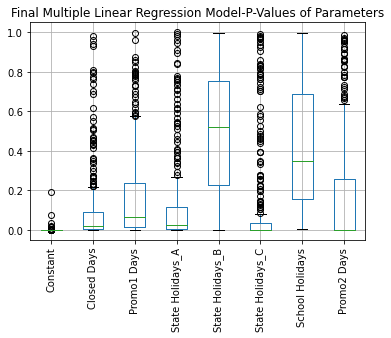

In [221]:
model_final_cust_list=pred_matrix_cust[pred_matrix_cust['Adjusted R squared']>=0.50]['Store'].tolist()
model_final_cust_df=pred_matrix_cust[pred_matrix_cust['Store'].isin(model_final_cust_list)]
model_final_cust_df.boxplot(column=model_final_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


In [222]:
Const=[]
Closed_Days=[]
Promo1_Days=[]
State_A=[]
State_C=[]
Promo2=[]
adj_r=[]
predict_2013_final_cust=[]
predict_2014_final_cust=[]
predict_2015_final_cust=[]

for s in store_list:
    store_cust_7_2013=seven_year1[seven_year1['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_7_2013.columns=['Month of Sale','Customers']
    closed_days_7_2013=closed_days_7_y1[closed_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2013.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2013=promo_days_7_y1[promo_days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2013.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2013=st_hol_a_7_y1[st_hol_a_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2013.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_7_2013=st_hol_c_7_y1[st_hol_c_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2013.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_7_2013=promo2days_7_y1[promo2days_7_y1['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2013.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_7_2013['Total No. of Closed Days']=closed_days_7_2013['No. of Closed Days']
    store_cust_7_2013['Total No. of Promo1 Days']=promo_days_7_2013['No. of Promo1 Days']
    store_cust_7_2013['Total No. of State Holidays-A']=state_hol_a_7_2013['No. of State Holidays-A']
    store_cust_7_2013['Total No. of State Holidays-C']=state_hol_c_7_2013['No. of State Holidays-C']
    store_cust_7_2013['Total No. of Promo2 Days']=promo2_days_7_2013['No. of Promo2 Days']
    store_cust_7_2013.replace([np.inf, -np.inf], np.nan)
    store_cust_7_2013['Total No. of Closed Days']=store_cust_7_2013['Total No. of Closed Days'].fillna(0)
    store_cust_7_2013['Total No. of Promo1 Days']=store_cust_7_2013['Total No. of Promo1 Days'].fillna(0)
    store_cust_7_2013['Total No. of State Holidays-A']=store_cust_7_2013['Total No. of State Holidays-A'].fillna(0)
    store_cust_7_2013['Total No. of State Holidays-C']=store_cust_7_2013['Total No. of State Holidays-C'].fillna(0)
    store_cust_7_2013['Total No. of Promo2 Days']=store_cust_7_2013['Total No. of Promo2 Days'].fillna(0)
    store_cust_7_2014=seven_year2[seven_year2['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_7_2014.columns=['Month of Sale','Customers']
    closed_days_7_2014=closed_days_7_y2[closed_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_7_2014.columns=['Month of Sale','No. of Closed Days']
    promo_days_7_2014=promo_days_7_y2[promo_days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_7_2014.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_7_2014=st_hol_a_7_y2[st_hol_a_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_7_2014.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_7_2014=st_hol_c_7_y2[st_hol_c_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_7_2014.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_7_2014=promo2days_7_y2[promo2days_7_y2['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_7_2014.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_7_2014['Total No. of Closed Days']=closed_days_7_2014['No. of Closed Days']
    store_cust_7_2014['Total No. of Promo1 Days']=promo_days_7_2014['No. of Promo1 Days']
    store_cust_7_2014['Total No. of State Holidays-A']=state_hol_a_7_2014['No. of State Holidays-A']
    store_cust_7_2014['Total No. of State Holidays-C']=state_hol_c_7_2014['No. of State Holidays-C']
    store_cust_7_2014['Total No. of Promo2 Days']=promo2_days_7_2014['No. of Promo2 Days']
    store_cust_7_2014.replace([np.inf, -np.inf], np.nan)
    store_cust_7_2014['Total No. of Closed Days']=store_cust_7_2014['Total No. of Closed Days'].fillna(0)
    store_cust_7_2014['Total No. of Promo1 Days']=store_cust_7_2014['Total No. of Promo1 Days'].fillna(0)
    store_cust_7_2014['Total No. of State Holidays-A']=store_cust_7_2014['Total No. of State Holidays-A'].fillna(0)
    store_cust_7_2014['Total No. of State Holidays-C']=store_cust_7_2014['Total No. of State Holidays-C'].fillna(0)
    store_cust_7_2014['Total No. of Promo2 Days']=store_cust_7_2014['Total No. of Promo2 Days'].fillna(0)
    store_cust_2015=year3_data[year3_data['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_cust_2015.columns=['Month of Sale','Customers']
    closed_days_2015=closed_days_y3[closed_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    closed_days_2015.columns=['Month of Sale','No. of Closed Days']
    promo_days_2015=promo_days_y3[promo_days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo_days_2015.columns=['Month of Sale','No. of Promo1 Days']
    state_hol_a_2015=st_hol_a_y3[st_hol_a_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_a_2015.columns=['Month of Sale','No. of State Holidays-A']
    state_hol_c_2015=st_hol_c_y3[st_hol_c_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    state_hol_c_2015.columns=['Month of Sale','No. of State Holidays-C']
    promo2_days_2015=promo2days_y3[promo2days_y3['Store']==s].groupby('Month of Sale')['Date'].agg(['sum']).reset_index() 
    promo2_days_2015.columns=['Month of Sale','No. of Promo2 Days']
    store_cust_2015['Total No. of Closed Days']=closed_days_2015['No. of Closed Days']
    store_cust_2015['Total No. of Promo1 Days']=promo_days_2015['No. of Promo1 Days']
    store_cust_2015['Total No. of State Holidays-A']=state_hol_a_2015['No. of State Holidays-A']
    store_cust_2015['Total No. of State Holidays-C']=state_hol_c_2015['No. of State Holidays-C']
    store_cust_2015['Total No. of Promo2 Days']=promo2_days_2015['No. of Promo2 Days']                                
    store_cust_2015.replace([np.inf, -np.inf], np.nan)
    store_cust_2015['Total No. of Closed Days']=store_cust_2015['Total No. of Closed Days'].fillna(0)
    store_cust_2015['Total No. of Promo1 Days']=store_cust_2015['Total No. of Promo1 Days'].fillna(0)
    store_cust_2015['Total No. of State Holidays-A']=store_cust_2015['Total No. of State Holidays-A'].fillna(0)
    store_cust_2015['Total No. of State Holidays-C']=store_cust_2015['Total No. of State Holidays-C'].fillna(0)
    store_cust_2015['Total No. of Promo2 Days']=store_cust_2015['Total No. of Promo2 Days'].fillna(0)
    var_col_2013=store_cust_7_2013.columns[2:]
    dep_var_7_2013=store_cust_7_2013['Customers']
    ind_var1_7_2013=store_cust_7_2013[var_col_2013]
    ind_var2_7_2013=sm.add_constant(ind_var1_7_2013)
    var_col_2014=store_cust_7_2014.columns[2:]
    dep_var_7_2014=store_cust_7_2014['Customers']
    ind_var1_7_2014=store_cust_7_2014[var_col_2014]
    ind_var2_7_2014=sm.add_constant(ind_var1_7_2014)  
    var_col_2015=store_cust_2015.columns[2:]
    dep_var_2015=store_cust_2015['Customers']
    ind_var1_2015=store_cust_2015[var_col_2015]
    ind_var2_2015=sm.add_constant(ind_var1_2015)
    final=store_cust_7_2013.append([store_cust_7_2014,store_cust_2015])
    final.replace([np.inf, -np.inf], np.nan)
    final['Total No. of Closed Days']=final['Total No. of Closed Days'].fillna(0)
    final['Total No. of Promo1 Days']=final['Total No. of Promo1 Days'].fillna(0)
    final['Total No. of State Holidays-A']=final['Total No. of State Holidays-A'].fillna(0)
    final['Total No. of State Holidays-C']=final['Total No. of State Holidays-C'].fillna(0)
    final['Total No. of Promo2 Days']=final['Total No. of Promo2 Days'].fillna(0)
    var_col=final.columns[2:]
    dep_var_final=final['Customers']
    ind_var1_final=final[var_col]
    ind_var2_final=sm.add_constant(ind_var1_final)
    model_final_cust=sm.OLS(dep_var_final,ind_var2_final).fit()
    x=model_final_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_final_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Closed_Days.append(y[y['Parameter']=='Total No. of Closed Days']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    State_A.append(y[y['Parameter']=='Total No. of State Holidays-A']['P-Value'].sum())
    State_C.append(y[y['Parameter']=='Total No. of State Holidays-C']['P-Value'].sum())
    Promo2.append(y[y['Parameter']=='Total No. of Promo2 Days']['P-Value'].sum())
    pred_cust_16=pd.DataFrame(model_final_cust.predict(ind_var2_7_2013))
    pred_cust_16.columns=['Pred']
    pred_cust_17=pd.DataFrame(model_final_cust.predict(ind_var2_7_2014))
    pred_cust_17.columns=['Pred']
    pred_cust_18=pd.DataFrame(model_final_cust.predict(ind_var2_2015))
    pred_cust_18.columns=['Pred']
    predict_2013_final_cust.append(pred_cust_16['Pred'].tolist())
    predict_2014_final_cust.append(pred_cust_17['Pred'].tolist())
    predict_2015_final_cust.append(pred_cust_18['Pred'].tolist())

pred_matrix_cust=pd.DataFrame(store_list)
pred_matrix_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_matrix_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Closed_Days=pd.DataFrame(Closed_Days).reset_index()
Closed_Days.columns=['Index','Closed Days']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
State_A=pd.DataFrame(State_A).reset_index()
State_A.columns=['Index','State Holidays_A']
State_C=pd.DataFrame(State_C).reset_index()
State_C.columns=['Index','State Holidays_C']
Promo2=pd.DataFrame(Promo2).reset_index()
Promo2.columns=['Index','Promo2 Days']
pred_matrix_cust['Constant']=Const['Constant']
pred_matrix_cust['Closed Days']=Closed_Days['Closed Days']    
pred_matrix_cust['Promo1 Days']=Promo1_Days['Promo1_Days']
pred_matrix_cust['State Holidays_A']=State_A['State Holidays_A']
pred_matrix_cust['State Holidays_C']=State_C['State Holidays_C']
pred_matrix_cust['Promo2 Days']=Promo2['Promo2 Days']

print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_matrix_cust[pred_matrix_cust['Adjusted R squared']>=0.50]['Store'].tolist()))


    
    
    
    

83
333


Text(0.5, 1.0, 'Final Multiple Linear Regression Model-P-Values of Parameters')

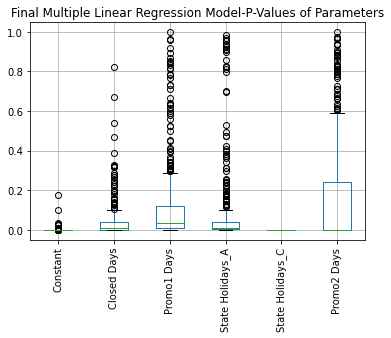

In [223]:
model_final_cust_list=pred_matrix_cust[pred_matrix_cust['Adjusted R squared']>=0.50]['Store'].tolist()
model_final_cust_df=pred_matrix_cust[pred_matrix_cust['Store'].isin(model_final_cust_list)]
model_final_cust_df.boxplot(column=model_final_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Multiple Linear Regression Model-P-Values of Parameters')


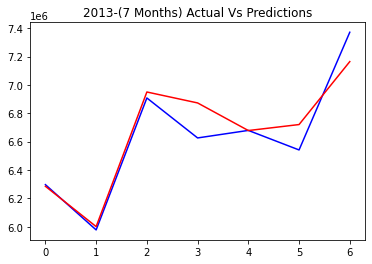

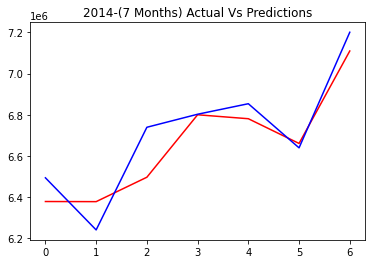

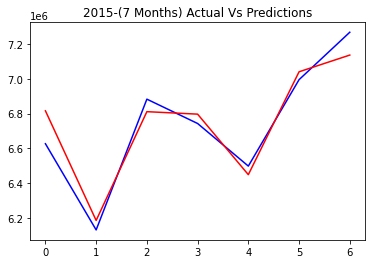

In [224]:
predict_2013_final_cust_df=[item for sublist in predict_2013_final_cust for item in sublist]  
predict_2014_final_cust_df=[item for sublist in predict_2014_final_cust for item in sublist]  
predict_2015_final_cust_df=[item for sublist in predict_2015_final_cust for item in sublist]  
modeldata_7_cust_y1['Predictions-Final Cust Model']=predict_2013_final_cust_df
modeldata_7_cust_y2['Predictions-Final Cust Model']=predict_2014_final_cust_df
modeldata_7_cust_y3['Predictions-Final Cust Model']=predict_2015_final_cust_df
modeldata_7_cust_y1['Predictions-Final Cust Model']=modeldata_7_cust_y1['Predictions-Final Cust Model'].astype(int)
modeldata_7_cust_y2['Predictions-Final Cust Model']=modeldata_7_cust_y2['Predictions-Final Cust Model'].astype(int)
modeldata_7_cust_y3['Predictions-Final Cust Model']=modeldata_7_cust_y3['Predictions-Final Cust Model'].astype(int)
modeldata_7_cust_y1_mat_1=modeldata_7_cust_y1[modeldata_7_cust_y1['Store'].isin(model_final_cust_list)]
modeldata_7_cust_y2_mat_1=modeldata_7_cust_y2[modeldata_7_cust_y2['Store'].isin(model_final_cust_list)]
modeldata_7_cust_y3_mat_1=modeldata_7_cust_y3[modeldata_7_cust_y3['Store'].isin(model_final_cust_list)]

sale_7_cust_y1_mat_1=pd.DataFrame(modeldata_7_cust_y1_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_7_cust_y1_mat_1=pd.DataFrame(modeldata_7_cust_y1_mat_1.groupby('Month of Sale')['Predictions-Final Cust Model'].sum()).reset_index()
sale_7_cust_y2_mat_1=pd.DataFrame(modeldata_7_cust_y2_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_7_cust_y2_mat_1=pd.DataFrame(modeldata_7_cust_y2_mat_1.groupby('Month of Sale')['Predictions-Final Cust Model'].sum()).reset_index()
sale_7_cust_y3_mat_1=pd.DataFrame(modeldata_7_cust_y3_mat_1.groupby('Month of Sale')['Customers'].sum()).reset_index()
pred_7_cust_y3_mat_1=pd.DataFrame(modeldata_7_cust_y3_mat_1.groupby('Month of Sale')['Predictions-Final Cust Model'].sum()).reset_index()

plt.plot(sale_7_cust_y1_mat_1['Customers'],color='Blue')
plt.plot(pred_7_cust_y1_mat_1['Predictions-Final Cust Model'],color='Red')
plt.title('2013-(7 Months) Actual Vs Predictions')
plt.show('Actual 2013 Customer walk-ins Vs Predictions-Final Model(For 333 Stores)')


plt.plot(pred_7_cust_y2_mat_1['Predictions-Final Cust Model'],color='Red')
plt.plot(sale_7_cust_y2_mat_1['Customers'],color='Blue')
plt.title('2014-(7 Months) Actual Vs Predictions')
plt.show('Actual 2014 Customer walk-ins Vs Predictions-Final Model(For 333 Stores)')


plt.plot(sale_7_cust_y3_mat_1['Customers'],color='Blue')
plt.plot(pred_7_cust_y3_mat_1['Predictions-Final Cust Model'],color='Red')
plt.title('2015-(7 Months) Actual Vs Predictions')
plt.show('Actual 2015 Customer walk-ins Vs Predictions-Final Model(For 333 Stores)')


**Linear Regression model to predict Monthly sales on Promo days using the No. of Promo days in a month**
<a id='Linreg_promo'></a>

In [225]:
promodf_2013=promo_df[promo_df['Year of Sale']==2013]
promodf_2014=promo_df[promo_df['Year of Sale']==2014]
promodf_2015=promo_df[promo_df['Year of Sale']==2015]
store_list=store_data.drop_duplicates(subset=['Store'])['Store'].tolist()


In [226]:
Const=[]
Promo1_Days=[]
adj_r=[]
predict_2013_promo=[]
predict_2014_promo=[]
predict_2015_promo=[]

for s in store_list:
    store_promo_2013=promodf_2013[promodf_2013['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_promo_2013.columns=['Month of Sale','Sales']
    promo1_2013=promodf_2013[promodf_2013['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2013.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2013['Total No. of Promo1 Days']=promo1_2013['No. of Promo1 Days']
    store_promo_2013.replace([np.inf, -np.inf], np.nan)
    store_promo_2013['Total No. of Promo1 Days']=store_promo_2013['Total No. of Promo1 Days'].fillna(0)
    store_promo_2014=promodf_2014[promodf_2014['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_promo_2014.columns=['Month of Sale','Sales']
    promo1_2014=promodf_2014[promodf_2014['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2014.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2014['Total No. of Promo1 Days']=promo1_2014['No. of Promo1 Days']
    store_promo_2014.replace([np.inf, -np.inf], np.nan)
    store_promo_2014['Total No. of Promo1 Days']=store_promo_2014['Total No. of Promo1 Days'].fillna(0)
    store_promo_2015=promodf_2015[promodf_2015['Store']==s].groupby('Month of Sale')['Sales'].agg(['sum']).reset_index()
    store_promo_2015.columns=['Month of Sale','Sales']
    promo1_2015=promodf_2015[promodf_2015['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2015.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2015['Total No. of Promo1 Days']=promo1_2015['No. of Promo1 Days']
    store_promo_2015.replace([np.inf, -np.inf], np.nan)
    store_promo_2015['Total No. of Promo1 Days']=store_promo_2015['Total No. of Promo1 Days'].fillna(0)
    var_col_p_2013=store_promo_2013.columns[2:]
    dep_var_p_2013=store_promo_2013['Sales']
    ind_var1_p_2013=store_promo_2013[var_col_p_2013]
    ind_var2_p_2013=sm.add_constant(ind_var1_p_2013)
    var_col_p_2014=store_promo_2014.columns[2:]
    dep_var_p_2014=store_promo_2014['Sales']
    ind_var1_p_2014=store_promo_2014[var_col_p_2014]
    ind_var2_p_2014=sm.add_constant(ind_var1_p_2014)
    var_col_p_2015=store_promo_2015.columns[2:]
    dep_var_p_2015=store_promo_2015['Sales']
    ind_var1_p_2015=store_promo_2015[var_col_p_2015]
    ind_var2_p_2015=sm.add_constant(ind_var1_p_2015)
    finalpromo=store_promo_2013.append([store_promo_2014,store_promo_2015])
    finalpromo.replace([np.inf, -np.inf], np.nan)
    finalpromo['Total No. of Promo1 Days']=finalpromo['Total No. of Promo1 Days'].fillna(0)
    var_col_promo=finalpromo.columns[2:]
    dep_var_finalpromo=finalpromo['Sales']
    ind_var1_finalpromo=finalpromo[var_col_promo]
    ind_var2_finalpromo=sm.add_constant(ind_var1_finalpromo)
    model_finalpromo=sm.OLS(dep_var_finalpromo,ind_var2_finalpromo).fit()
    x=model_finalpromo.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_finalpromo.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    pred_promo_13=pd.DataFrame(model_finalpromo.predict(ind_var2_p_2013))
    pred_promo_13.columns=['Pred']
    pred_promo_14=pd.DataFrame(model_finalpromo.predict(ind_var2_p_2014))
    pred_promo_14.columns=['Pred']
    pred_promo_15=pd.DataFrame(model_finalpromo.predict(ind_var2_p_2015))
    pred_promo_15.columns=['Pred']
    predict_2013_promo.append(pred_promo_13['Pred'].tolist())
    predict_2014_promo.append(pred_promo_14['Pred'].tolist())
    predict_2015_promo.append(pred_promo_15['Pred'].tolist())

pred_promo=pd.DataFrame(store_list)
pred_promo.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_promo['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
pred_promo['Constant']=Const['Constant']
pred_promo['Promo1 Days']=Promo1_Days['Promo1_Days']

print(len(pred_promo[pred_promo['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_promo[pred_promo['Adjusted R squared']>=0.50]['Store'].tolist()))

1
673


Text(0.5, 1.0, 'Final Linear Reg Model to predict sales on Promo1 Days-P-Values of Parameters')

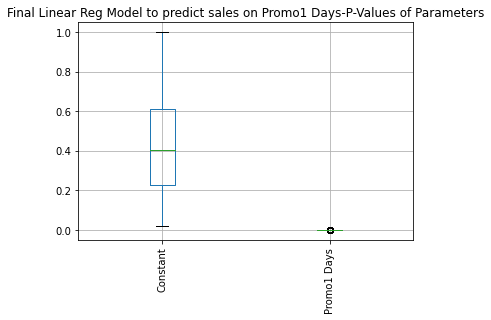

In [227]:
model_finalpromo_list=pred_promo[pred_promo['Adjusted R squared']>=0.50]['Store'].tolist()
model_finalpromo_df=pred_promo[pred_promo['Store'].isin(model_finalpromo_list)]
model_finalpromo_df.boxplot(column=model_finalpromo_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Linear Reg Model to predict sales on Promo1 Days-P-Values of Parameters')

In [228]:
modelpromo_y1=promodf_2013.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modelpromo_y2=promodf_2014.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()
modelpromo_y3=promodf_2015.groupby(['Store','Month of Sale'])['Sales'].agg(['sum']).reset_index()


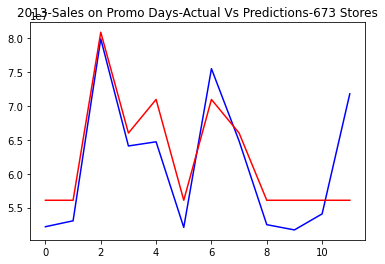

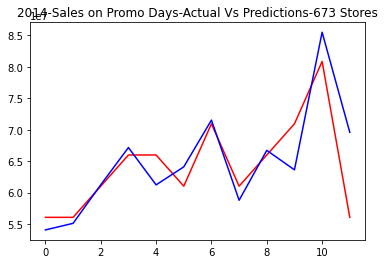

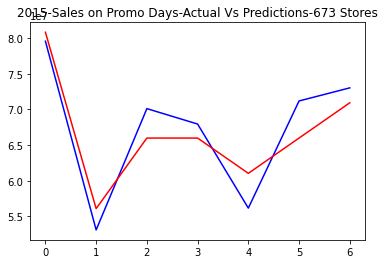

In [229]:
predict_2013_promo_df=[item for sublist in predict_2013_promo for item in sublist]  
predict_2014_promo_df=[item for sublist in predict_2014_promo for item in sublist]  
predict_2015_promo_df=[item for sublist in predict_2015_promo for item in sublist]  
modelpromo_y1['Predictions-Promo1 Model']=predict_2013_promo_df
modelpromo_y2['Predictions-Promo1 Model']=predict_2014_promo_df
modelpromo_y3['Predictions-Promo1 Model']=predict_2015_promo_df
modelpromo_y1['Predictions-Promo1 Model']=modelpromo_y1['Predictions-Promo1 Model'].astype(int)
modelpromo_y2['Predictions-Promo1 Model']=modelpromo_y2['Predictions-Promo1 Model'].astype(int)
modelpromo_y3['Predictions-Promo1 Model']=modelpromo_y3['Predictions-Promo1 Model'].astype(int)
modelpromo_y1_mat_1=modelpromo_y1[modelpromo_y1['Store'].isin(model_finalpromo_list)]
modelpromo_y2_mat_1=modelpromo_y2[modelpromo_y2['Store'].isin(model_finalpromo_list)]
modelpromo_y3_mat_1=modelpromo_y3[modelpromo_y3['Store'].isin(model_finalpromo_list)]

sale_y1_mat_1_promo=pd.DataFrame(modelpromo_y1_mat_1.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y1_mat_1_promo=pd.DataFrame(modelpromo_y1_mat_1.groupby('Month of Sale')['Predictions-Promo1 Model'].sum()).reset_index()
sale_y2_mat_1_promo=pd.DataFrame(modelpromo_y2_mat_1.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y2_mat_1_promo=pd.DataFrame(modelpromo_y2_mat_1.groupby('Month of Sale')['Predictions-Promo1 Model'].sum()).reset_index()
sale_y3_mat_1_promo=pd.DataFrame(modelpromo_y3_mat_1.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y3_mat_1_promo=pd.DataFrame(modelpromo_y3_mat_1.groupby('Month of Sale')['Predictions-Promo1 Model'].sum()).reset_index()

plt.plot(sale_y1_mat_1_promo['sum'],color='Blue')
plt.plot(pred_y1_mat_1_promo['Predictions-Promo1 Model'],color='Red')
plt.title('2013-Sales on Promo Days-Actual Vs Predictions-673 Stores')
plt.show()


plt.plot(pred_y2_mat_1_promo['Predictions-Promo1 Model'],color='Red')
plt.plot(sale_y2_mat_1_promo['sum'],color='Blue')
plt.title('2014-Sales on Promo Days-Actual Vs Predictions-673 Stores')
plt.show()


plt.plot(sale_y3_mat_1_promo['sum'],color='Blue')
plt.plot(pred_y3_mat_1_promo['Predictions-Promo1 Model'],color='Red')
plt.title('2015-Sales on Promo Days-Actual Vs Predictions-673 Stores')
plt.show()


**Linear Regression model to predict Monthly Customer walkins on Promo days using the No. of Promo days in a month**
<a id='Linreg_promo_cust'></a>

In [230]:
Const=[]
Promo1_Days=[]
adj_r=[]
predict_2013_promo_cust=[]
predict_2014_promo_cust=[]
predict_2015_promo_cust=[]

for s in store_list:
    store_promo_2013_cust=promodf_2013[promodf_2013['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_promo_2013_cust.columns=['Month of Sale','Customers']
    promo1_2013=promodf_2013[promodf_2013['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2013.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2013_cust['Total No. of Promo1 Days']=promo1_2013['No. of Promo1 Days']
    store_promo_2013_cust.replace([np.inf, -np.inf], np.nan)
    store_promo_2013_cust['Total No. of Promo1 Days']=store_promo_2013_cust['Total No. of Promo1 Days'].fillna(0)
    store_promo_2014_cust=promodf_2014[promodf_2014['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_promo_2014_cust.columns=['Month of Sale','Customers']
    promo1_2014=promodf_2014[promodf_2014['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2014.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2014_cust['Total No. of Promo1 Days']=promo1_2014['No. of Promo1 Days']
    store_promo_2014_cust.replace([np.inf, -np.inf], np.nan)
    store_promo_2014_cust['Total No. of Promo1 Days']=store_promo_2014_cust['Total No. of Promo1 Days'].fillna(0)
    store_promo_2015_cust=promodf_2015[promodf_2015['Store']==s].groupby('Month of Sale')['Customers'].agg(['sum']).reset_index()
    store_promo_2015_cust.columns=['Month of Sale','Customers']
    promo1_2015=promodf_2015[promodf_2015['Store']==s].groupby('Month of Sale')['Date'].agg(['count']).reset_index()
    promo1_2015.columns=['Month of Sale','No. of Promo1 Days']
    store_promo_2015_cust['Total No. of Promo1 Days']=promo1_2015['No. of Promo1 Days']
    store_promo_2015_cust.replace([np.inf, -np.inf], np.nan)
    store_promo_2015_cust['Total No. of Promo1 Days']=store_promo_2015_cust['Total No. of Promo1 Days'].fillna(0)
    var_col_p_2013=store_promo_2013_cust.columns[2:]
    dep_var_p_2013=store_promo_2013_cust['Customers']
    ind_var1_p_2013=store_promo_2013_cust[var_col_p_2013]
    ind_var2_p_2013=sm.add_constant(ind_var1_p_2013)
    var_col_p_2014=store_promo_2014_cust.columns[2:]
    dep_var_p_2014=store_promo_2014_cust['Customers']
    ind_var1_p_2014=store_promo_2014_cust[var_col_p_2014]
    ind_var2_p_2014=sm.add_constant(ind_var1_p_2014)
    var_col_p_2015=store_promo_2015_cust.columns[2:]
    dep_var_p_2015=store_promo_2015_cust['Customers']
    ind_var1_p_2015=store_promo_2015_cust[var_col_p_2015]
    ind_var2_p_2015=sm.add_constant(ind_var1_p_2015)
    finalpromo_cust=store_promo_2013_cust.append([store_promo_2014_cust,store_promo_2015_cust])
    finalpromo_cust.replace([np.inf, -np.inf], np.nan)
    finalpromo_cust['Total No. of Promo1 Days']=finalpromo_cust['Total No. of Promo1 Days'].fillna(0)
    var_col_promo=finalpromo_cust.columns[2:]
    dep_var_finalpromo=finalpromo_cust['Customers']
    ind_var1_finalpromo=finalpromo_cust[var_col_promo]
    ind_var2_finalpromo=sm.add_constant(ind_var1_finalpromo)
    model_finalpromo_cust=sm.OLS(dep_var_finalpromo,ind_var2_finalpromo).fit()
    x=model_finalpromo_cust.rsquared_adj
    adj_r.append(x)
    y=pd.DataFrame(model_finalpromo_cust.pvalues).reset_index()
    y.columns=['Parameter','P-Value']
    Const.append(y[y['Parameter']=='const']['P-Value'].sum())
    Promo1_Days.append(y[y['Parameter']=='Total No. of Promo1 Days']['P-Value'].sum())
    pred_promo_16=pd.DataFrame(model_finalpromo_cust.predict(ind_var2_p_2013))
    pred_promo_16.columns=['Pred']
    pred_promo_17=pd.DataFrame(model_finalpromo_cust.predict(ind_var2_p_2014))
    pred_promo_17.columns=['Pred']
    pred_promo_18=pd.DataFrame(model_finalpromo_cust.predict(ind_var2_p_2015))
    pred_promo_18.columns=['Pred']
    predict_2013_promo_cust.append(pred_promo_16['Pred'].tolist())
    predict_2014_promo_cust.append(pred_promo_17['Pred'].tolist())
    predict_2015_promo_cust.append(pred_promo_18['Pred'].tolist())

pred_promo_cust=pd.DataFrame(store_list)
pred_promo_cust.columns=['Store']
final_adj_r=pd.DataFrame(adj_r)
final_adj_r.columns=['Adjusted R squared']
pred_promo_cust['Adjusted R squared']=final_adj_r['Adjusted R squared']
Const=pd.DataFrame(Const).reset_index()
Const.columns=['Index','Constant']
Promo1_Days=pd.DataFrame(Promo1_Days).reset_index()
Promo1_Days.columns=['Index','Promo1_Days']
pred_promo_cust['Constant']=Const['Constant']
pred_promo_cust['Promo1 Days']=Promo1_Days['Promo1_Days']

print(len(pred_promo_cust[pred_promo_cust['Adjusted R squared']<0]['Store'].tolist()))
print(len(pred_promo_cust[pred_promo_cust['Adjusted R squared']>=0.50]['Store'].tolist()))

0
828


Text(0.5, 1.0, 'Final Linear Reg Model to predict sales on Promo1 Days-P-Values of Parameters')

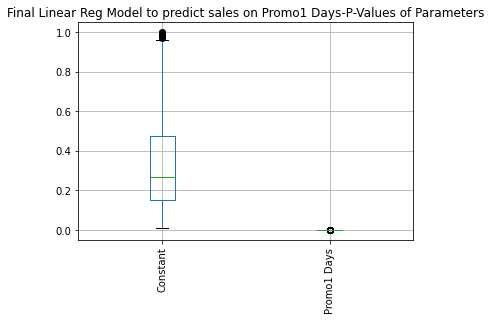

In [231]:
model_finalpromo_list_cust=pred_promo_cust[pred_promo_cust['Adjusted R squared']>=0.50]['Store'].tolist()
model_finalpromo_cust_df=pred_promo_cust[pred_promo_cust['Store'].isin(model_finalpromo_list_cust)]
model_finalpromo_cust_df.boxplot(column=model_finalpromo_cust_df.columns[2:].tolist())
plt.xticks(rotation=90)
plt.title('Final Linear Reg Model to predict sales on Promo1 Days-P-Values of Parameters')

In [232]:
modelpromo_y1_cust=promodf_2013.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modelpromo_y2_cust=promodf_2014.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()
modelpromo_y3_cust=promodf_2015.groupby(['Store','Month of Sale'])['Customers'].agg(['sum']).reset_index()


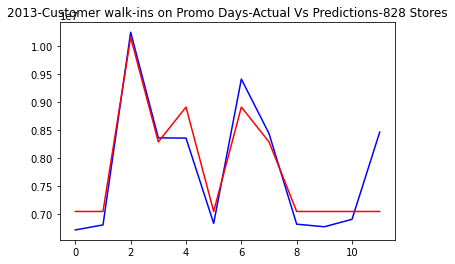

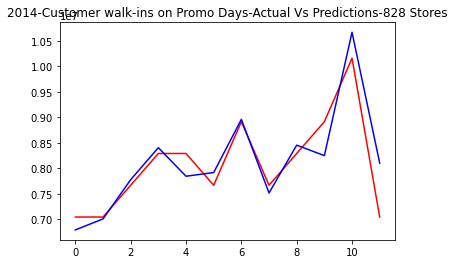

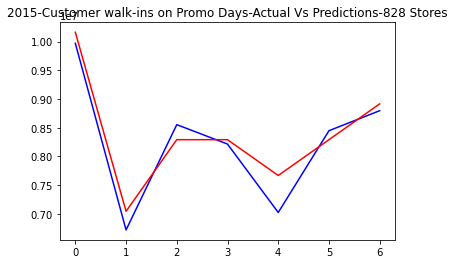

In [233]:
predict_2013_promo_df_cust=[item for sublist in predict_2013_promo_cust for item in sublist]  
predict_2014_promo_df_cust=[item for sublist in predict_2014_promo_cust for item in sublist]  
predict_2015_promo_df_cust=[item for sublist in predict_2015_promo_cust for item in sublist]  
modelpromo_y1_cust['Predictions-Promo1 Cust Model']=predict_2013_promo_df_cust
modelpromo_y2_cust['Predictions-Promo1 Cust Model']=predict_2014_promo_df_cust
modelpromo_y3_cust['Predictions-Promo1 Cust Model']=predict_2015_promo_df_cust
modelpromo_y1_cust['Predictions-Promo1 Cust Model']=modelpromo_y1_cust['Predictions-Promo1 Cust Model'].astype(int)
modelpromo_y2_cust['Predictions-Promo1 Cust Model']=modelpromo_y2_cust['Predictions-Promo1 Cust Model'].astype(int)
modelpromo_y3_cust['Predictions-Promo1 Cust Model']=modelpromo_y3_cust['Predictions-Promo1 Cust Model'].astype(int)
modelpromo_y1_mat_1_cust=modelpromo_y1_cust[modelpromo_y1_cust['Store'].isin(model_finalpromo_list_cust)]
modelpromo_y2_mat_1_cust=modelpromo_y2_cust[modelpromo_y2_cust['Store'].isin(model_finalpromo_list_cust)]
modelpromo_y3_mat_1_cust=modelpromo_y3_cust[modelpromo_y3_cust['Store'].isin(model_finalpromo_list_cust)]

sale_y1_mat_1_promo_cust=pd.DataFrame(modelpromo_y1_mat_1_cust.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y1_mat_1_promo_cust=pd.DataFrame(modelpromo_y1_mat_1_cust.groupby('Month of Sale')['Predictions-Promo1 Cust Model'].sum()).reset_index()
sale_y2_mat_1_promo_cust=pd.DataFrame(modelpromo_y2_mat_1_cust.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y2_mat_1_promo_cust=pd.DataFrame(modelpromo_y2_mat_1_cust.groupby('Month of Sale')['Predictions-Promo1 Cust Model'].sum()).reset_index()
sale_y3_mat_1_promo_cust=pd.DataFrame(modelpromo_y3_mat_1_cust.groupby('Month of Sale')['sum'].sum()).reset_index()
pred_y3_mat_1_promo_cust=pd.DataFrame(modelpromo_y3_mat_1_cust.groupby('Month of Sale')['Predictions-Promo1 Cust Model'].sum()).reset_index()

plt.plot(sale_y1_mat_1_promo_cust['sum'],color='Blue')
plt.plot(pred_y1_mat_1_promo_cust['Predictions-Promo1 Cust Model'],color='Red')
plt.title('2013-Customer walk-ins on Promo Days-Actual Vs Predictions-828 Stores')
plt.show()


plt.plot(pred_y2_mat_1_promo_cust['Predictions-Promo1 Cust Model'],color='Red')
plt.plot(sale_y2_mat_1_promo_cust['sum'],color='Blue')
plt.title('2014-Customer walk-ins on Promo Days-Actual Vs Predictions-828 Stores')
plt.show()


plt.plot(sale_y3_mat_1_promo_cust['sum'],color='Blue')
plt.plot(pred_y3_mat_1_promo_cust['Predictions-Promo1 Cust Model'],color='Red')
plt.title('2015-Customer walk-ins on Promo Days-Actual Vs Predictions-828 Stores')
plt.show()
